# 2.4. The Fourier transform

## Contents

* **[Introduction](#introduction)**
* **[2.4.1. Continuous signals](#241)**
    * [Fourier series](#fourier_series)
        * **Example**: [Rectangular wave](#example_rectangular_wave)
    * [Fourier series as complex exponentials](#fourier_series_complex_exponentials)
    * [Continuous Fourier transform](#cft)
        * **Example**: [Laplace and Fourier](#example_laplace_fourier)
    * [Fourier inversion](#fourier_inversion)
        * **Example**: [Frequency shift](#example_frequency_shift)
    * [Bode plots](#bode_plots)
        * **Example**: [First-order lowpass filter](#example_lowpass)
    * [The perfect lowpass filter](#perfect_lowpass)
    * [Phase delay](#phase_delay)
        * **Example**: [Lowpass filter phase delay](#example_lowpass_phase_delay)
    * [Amplitude modulation](#am)
    * [Group delay](#group_delay)
* **[2.4.2. Discrete signals](#242)**
    * [Sampling](#sampling)
    * [Sampling in the transform domain](#sampling_transform)
        * **Example**: [Pole-matched first-order lowpass filter](#example_pole_matching)
    * [Discrete-time Fourier transform](#dtft)
        * **Example**: [$z$ and Fourier](#example_z_fourier)
    * [Existence of the Fourier transform](#fourier_existence)
    * [Discreteness and periodicity](#discrete_periodic)
        * **Figure**: [The many shapes of the Fourier transform](#figure_fourier_shapes)
    * [Poisson summation](#poisson_summation)
        * **Example**: [Periodic summation](#example_periodic_summation)
    * [Nyquist-Shannon sampling theorem](#nyquist_shannon)
        * **Example**: [Line noise harmonics](#example_line_noise)
        * **Example**: [Anti-aliasing](#example_anti_aliasing)
    * [Discrete Fourier transform](#dft)
        * **Example**: [Zero-padding](#example_zero_padding)
* **[2.4.3. Unifying topics](#243)**
    * [Symmetry](#symmetry)
    * [Parseval's identity](#parseval)
    * [Duality](#duality)
    * [The uncertainty principle](#uncertainty)
        * **Example**: [Gaussian pairs](#example_gaussians)

<a id="introduction"></a>
***

## Introduction

The human cochlea sits ensconced in the temporal bone, the origin point of the nervous system's interaction with sound. And yet, already, before even the first neuron has become involved, the structure of the cochlea itself has determined the entire architecture of the representation of sound in the brain. At the center of the action is the basilar membrane—its narrow, thick end toward the outside of the cochlea well-attuned to the high frequencies of hi-hats and sibilance; and its wide, thin end toward the *apex* of the cochlea's $2 \frac{3}{4}$ spirals resonating with the sound of "thuds", the kick of a bass drum, the $\ldots$.

The subjective experience of sound itself gives us some clues to this. We can tell the difference between a soprano and a baritone, sure; but we can also tell the difference between a saxophone and a clarinet playing the exact same melody. We can tell the difference between a major and a minor chord, between the musical writing of [John Williams](https://comb.io/hBCrcA) and [Danny Elfman](https://comb.io/d34BL2) We can tell the subtle difference in intonation that indicates a different word (in tonal languages), a different meaning, or even a different emotion.

$\ldots$

(Transform of signal vs. transform of system; frequency *content* = frequency *response*; $\ldots$)

<a id="241"></a>
***
## 2.4.1. Continuous signals

$\ldots$

<a id="fourier_series"></a>
***

### Fourier series

Up until this point, we have been working with a new way of *representing* signals—namely, the $z$ and Laplace transforms. As we saw from our first motivating remarks about these transforms, this perspective comes from the inteeraction of these signals with *complex exponentials*—$z^n$ in the discrete case, and $\mathrm{e}^{-st}$ in the continuous case. These functions were a natural choice, as they arise from the *eigenfunction* property of LTI systems. However, it turns out that a *subset* of these functions—the **sinusoids**—provide us with a tremendous amount of information, and can be used to develop another representation of systems—the *Fourier transform*.

To motivate this discussion, consider a continuous signal $x(t)$. In particular, we'll pick an $x$ that is **periodic**, meaning that there is some positive value $T$ (the *period*) such that

$$ x(t + T) = x(t) $$

for all inputs $t$. (That is, $x$ repeats one stretch of duration $T$ over and over again infinitely in each direction.)

Now, astronomers have been approximating observations as superposed sinusoids [for a long time](https://en.wikipedia.org/wiki/Deferent_and_epicycle). However, iin the mid-1700s and early 1800s, this problem began to take on new importance in the fields of wave mechanics and heat transfer. In particular, in these areas, mathematicians had determined two critical facts: one, that a definite, known solution existed for sinusoidal inputs; and two, that the nature of the problems (defined by a [linear differential operator](https://www.math24.net/differential-operators/)) meant that a "superposition" (*i.e.*, linear combination) of two initial conditions led to a superposed output; that is,

$$ c_1\,x_1 + c_2\,x_2 \Rightarrow c_1\,y_1 + c_2\,y_2 $$

The critical jump, originally made by [Daniel Bernoulli](https://ccrma.stanford.edu/~jos/sasp/Daniel_Bernoulli_s_Modal_Decomposition.html), came in the supposition that a "general" solution to the problem could be made by representing the initial conditions of the problem as an *infinite sum* of the known sinusoidal solutions. The suggestion—later restated by Joseph Fourier—was that an arbitrary (periodic) signal could be "decomposed" into scaled sinusoidal components,

$$ x(t) = \frac{a_0}{2} + \sum_{k=1}^\infty \left( a_k\,\cos\left(2\,\pi\frac{k}{T}\,t \right) + b_k\,\sin\left(2\,\pi\frac{k}{T}\,t \right) \right) $$

Notice here that the $k/T$ terms serve the role of "frequency" within the sinusoidal terms, and correspond to oscillations at multiples of the "fundamental" frequency $1/T$. The magic of this formalism is that—barring some [mathematical considerations](https://en.wikipedia.org/wiki/Dominated_convergence_theorem#Bounded_convergence_theorem), which took over 100 years from the time of Fourier to develop—we may actually *solve it* to find the coefficients! For example, if we were to multiply both sides by the $k_0$th cosine term, $\cos\left(2\pi\,\frac{k}{T}\,t\right)$, and then integrate over one period ($[0, T)$) of our signal, we would find that

$$
\begin{eqnarray*}
    \int_0^T x(t)\,\cos\left(2\,\pi\frac{k_0}{T}\,t\right)\mathrm{d}t & = & \int_0^T \left[ \frac{a_0}{2}\cos\left(2\,\pi\frac{k_0}{T}\,t\right) + \ldots \right. \\
     & \ldots & \left. \sum_{k=1}^\infty \left( a_k\,\cos\left(2\,\pi\,\frac{k}{T}\,t \right)\cos\left(2\,\pi\,\frac{k_0}{T}\,t\right) + b_k\,\sin\left(2\,\pi\,\frac{k}{T}\,t \right)\cos\left(2\,\pi\,\frac{k_0}{T}\,t\right) \right) \right]\mathrm{d}t \\
     & = & \int_0^T \frac{a_0}{2}\cos\left(2\pi\,\frac{k_0}{T}\,t\right)\,\mathrm{d}t + \ldots \\
     & \ldots & \sum_{k=1}^\infty \int_0^T a_k \cos\left(2\pi\,\frac{k}{T}\,t\right) \cos\left(2\pi\,\frac{k_0}{T}\,t\right)\,\mathrm{d}t + \ldots \\
     & \ldots & \sum_{k=1}^\infty \int_0^T a_k \sin\left(2\pi\,\frac{k}{T}\,t\right) \cos\left(2\pi\,\frac{k_0}{T}\,t\right)\,\mathrm{d}t
\end{eqnarray*}
$$

We can simplify this dramatically by noting a few facts. Letting $k$ and $m$ be integers, we note that:

$$
\begin{eqnarray*}
    \int_0^T \cos\left(2\pi\,\frac{k}{T}\,t\right)\,\mathrm{d}t & = & 0\quad\forall k \in \mathbb{Z} \\
    \int_0^T \cos\left(2\pi\,\frac{k}{T}\,t\right)\cos\left(2\pi\,\frac{m}{T}\,t\right)\,\mathrm{d}t & = & \left\{
\begin{array}{ll}
      0 & k \neq m \\
      \frac{T}{2} & k = m \\
\end{array} 
\right. \\
    \int_0^T \sin\left(2\pi\,\frac{k}{T}\,t\right)\cos\left(2\pi\,\frac{m}{T}\,t\right)\,\mathrm{d}t & = & 0 \quad \forall k,m
\end{eqnarray*}
$$

(These results follow from the [orthogonality](https://en.wikipedia.org/wiki/Orthogonal_functions) of the functions $1$, $\cos(kx)$, and $\sin(kx)$ for differing values of $k$.)

With this information, we can immediately simplify the equation above, because only one term survives—the $k_0$ term of the $\cos$-$\cos$ sum! This gives us

$$
\begin{eqnarray*}
    \int_0^T x(t)\,\cos\left(2\pi\,\frac{k_0}{T}\,t\right)\mathrm{d}t & = & \int_0^T a_{k_0} \cos\left(2\pi\,\frac{k_0}{T}\,t\right) \cos\left(2\pi\,\frac{k_0}{T}\,t\right)\,\mathrm{d}t \\
     & = & \frac{T}{2}\,a_{k_0}
\end{eqnarray*}
$$

(Note that we could go through a nearly identical process, by multiplying with $\sin(k_0\pi t/T)$ instead, to obtain a formula for $b_{k_0}$!)

The point here isn't so much about the formalism of what's going on behind the scenes with the integrals we showed above; rather, we see from this construction that we have two sets of interconnected formulas:

**Analysis**. These formulas, as we've seen above, can be used to *determine* the sinusoidal components at different frequencies that are present within a given signal $x(t)$:

$$
\begin{eqnarray*}
    a_k & = & \frac{2}{T}\,\int_0^T x(t)\,\cos\left(2\pi\,\frac{k}{T}\,t\right)\mathrm{d}t \\
    b_k & = & \frac{2}{T}\,\int_0^T x(t)\,\sin\left(2\pi\,\frac{k}{T}\,t\right)\mathrm{d}t \\
\end{eqnarray*}
$$

In particular, we note that by plugging in $k = 0$ to the above formulas, we get the zero-order coefficients as

$$
\begin{eqnarray*}
    a_0 & = & \frac{2}{T}\,\int_0^T x(t)\,\mathrm{d}t \\
    b_0 & = & 0 \\
\end{eqnarray*}
$$

(Note that, although we have chosen the interval $[0, T)$ to do our analysis on, any interval of length $T$ has the *same* information; in particular, since the sine and cosine terms used for the analysis equations are all $T$-periodic, the integrated quantities are all invariant to translation. It follows that we may perform our analysis calculations over *any* interval of length $T$ and arrive at the same result!)

**Synthesis**. This formula (also known as a **Fourier series**) is used to *build up* a function $x(t)$ based on these sinusoidal components $(a_k)$ and $(b_k)$:

$$ x(t) = \frac{a_0}{2} + \sum_{k=1}^\infty \left( a_k\,\cos\left(2\pi\,\frac{k}{T}\,t \right) + b_k\,\sin\left(2\pi\,\frac{k}{T}\,t \right) \right) $$

The interchangeability between these two raises a very intriguing point: what exactly *is* the "data" of this periodic signal $x(t)$? On the one hand, our impression from the beginning of the last section was that $x$ attaches a data point living on $\mathbb{R}$ to each point of the "ambient space" or domain $\mathbb{R}$, where $t$ "lives". In this case, we consider $x$ as having one data point for every single point in its domain, $\mathbb{R}$—however many points there are in $\mathbb{R}$, that's how many datapoints $x$ contains.

In the case we're interested in now, where $x$ is periodic, we know that all of $x$ is determined by only one stretch of input of length $T$—say, $[0, T)$—so perhaps it makes sense to say that our periodic $x$ has "less" data in a sense than an aperiodic signal. However, in fact, as sets, $\mathbb{R}$ and $[0, T)$ have [the same number of points](https://math.stackexchange.com/questions/300815/show-that-open-segment-a-b-close-segment-a-b-have-the-same-cardinality), despite being vastly different in "size". For our discussion, it suffices to say that both sets are "continuous" in the sense that we described for signals in the previous section: they are *not countable*.

Yet, at the same time that it seems like there is an *uncountable* amount of data defining $x$, we see from the Fourier series a very different picture: indeed, we are able to perfectly reconstruct our function (using the *synthesis* equation) from the sequences $(a_k)$ and $(b_k)$, which are both *countable*! Somehow, $x$ being periodic enables an *uncountably* infinite amount of data to be reconstructed from a *countably* infinite amount of data. How fascinating!

<a id="example_rectangular_wave"></a>
***

#### **Example**: Rectangular wave

Let's see an example of *analyzing* a given waveform, and then *synthesizing* that waveform using a finite number of coefficients.

Consider the following rectangular signal $x(t)$ with a period of $T = 2$. The dotted lines enclose one period of the waveform:

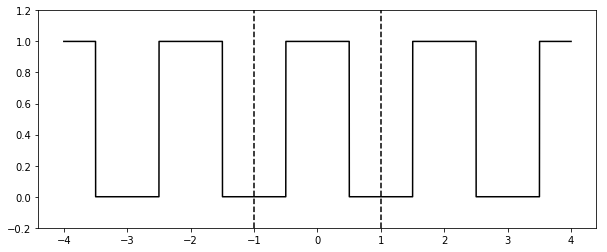

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

T = 2.0
t_all = np.arange( -2.0 * T, 2.0 * T, 0.001 )

x = np.zeros( t_all.shape )
for i in range( x.shape[0] ):
    cur_index = np.abs( (t_all[i] / T) - np.round( t_all[i] / T ) )
    if cur_index < 1./4.:
        x[i] = 1.

plt.figure( figsize = (10, 4) )
plt.plot( t_all, x, 'k-' )
yl = np.array( [-0.2, 1.2] )
plt.plot( -(T/2.) * np.array([ 1, 1]), yl, 'k--' )
plt.plot( (T/2.) * np.array([ 1, 1]), yl, 'k--' )
plt.ylim( yl )
plt.show()

(Note that this is an **even** function, meaning that $x(t) = x(-t)$; this is an important distinction to make here, as *cosine* is an even function, while *sine* is an odd function. We would expect, since our desired signal is purely even, that we should only use cosines—or $a_k$ coefficients—in describing $x$.)

We see that, within the highlighted period, the waveform is $1$ from $-T/4$ to $T/4$, and is $0$ elsewhere. This enables us to do the calculations for the Fourier coefficients directly from the formulas. (Note that here we choose to integrate over $[-T/2, T/2)$, for convenience.) Again, the focus here isn't so much on the *calculation* of particular Fourier coefficients *per se*, but to take a look at the coefficients in a real example.

$$
\begin{eqnarray*}
    a_0 & = & \frac{2}{T} \int_{-T/2}^{T/2} x(t)\,\mathrm{d}t = \frac{2}{T} \int_{-T/4}^{T/4} 1\,\mathrm{d}t = \frac{2}{T}\cdot\frac{T}{2} = \boxed{1} \\
    a_k & = & \frac{2}{T} \int_{-T/2}^{T/2} x(t)\,\cos\left(2\pi\,\frac{k}{T}\,t\right)\,\mathrm{d}t \\
     & = & \frac{2}{T} \int_{-T/4}^{T/4} \cos\left(2\pi\,\frac{k}{T}\,t\right)\,\mathrm{d}t \\
     & = & \frac{2}{T}\,\frac{T}{\pi\,k}\,\sin\left(\frac{\pi\,k}{2}\right) = \boxed{\frac{2}{\pi\,k}\,\sin\left(\frac{\pi\,k}{2}\right)} \\
    b_0 & = & \boxed{0} \\
    b_k & = & \frac{2}{T} \int_{-T/2}^{T/2} x(t)\,\sin\left(2\pi\,\frac{k}{T}\,t\right)\,\mathrm{d}t \\
     & = & \frac{2}{T} \int_{-T/4}^{T/4} \sin\left(2\pi\,\frac{k}{T}\,t\right)\,\mathrm{d}t = \boxed{0}
\end{eqnarray*}
$$

Let's take a look at what happens when we use a *finite number* of coefficients to approximate our original signal:

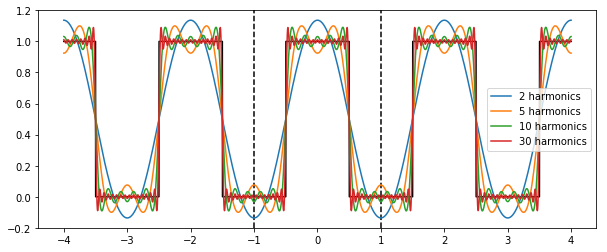

In [3]:
import numpy as np
import matplotlib.pyplot as plt

T = 2.0
t_all = np.arange( -2.0 * T, 2.0 * T, 0.001 )

x = np.zeros( t_all.shape )
for i in range( x.shape[0] ):
    cur_index = np.abs( (t_all[i] / T) - np.round( t_all[i] / T ) )
    if cur_index < 1./4.:
        x[i] = 1.

plt.figure( figsize = (10, 4) )
plt.plot( t_all, x, 'k-' )
yl = np.array( [-0.2, 1.2] )
plt.plot( -(T/2.) * np.array([ 1, 1]), yl, 'k--' )
plt.plot( (T/2.) * np.array([ 1, 1]), yl, 'k--' )

n_ks = np.array( [2, 5, 10, 30] )

for i_n, n_k in enumerate( n_ks ):
    x_fourier = np.zeros( t_all.shape )
    for k in range( n_k ):
        if k == 0:
            ak = 1.
            x_fourier = x_fourier + ak / 2.
        else:
            ak = (2. / (k * np.pi)) * np.sin( (k * np.pi) / 2. )
            x_fourier = x_fourier + ak * np.cos( (2. * k * np.pi * t_all) * (1. / T) )
    plt.plot( t_all, x_fourier, 'C{0}-'.format( i_n ), label = '{0} harmonics'.format( n_k ) )
    
plt.legend()
plt.ylim( yl )
plt.show()

It's interesting to note that the $a_k$ coefficients are actually *decreasing*; looking at the formula,

$$ a_k = \frac{2}{\pi\,k}\,\sin\left(\frac{\pi\,k}{2}\right) $$

we see that these coefficients fall off as $1/k$ (except for even $k$, where we note that $\sin(\pi\,k/2) = 0$.) Indeed, we can visualize this in the individual contributions of (nonzero) overtones:

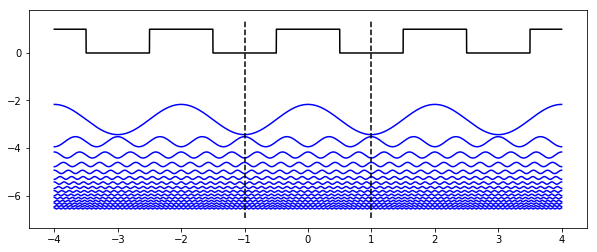

In [4]:
plt.figure( figsize = (10, 4) )
plt.plot( t_all, x, 'k-' )

T = 2.0
t_all = np.arange( -2.0 * T, 2.0 * T, 0.001 )

x = np.zeros( t_all.shape )
for i in range( x.shape[0] ):
    cur_index = np.abs( (t_all[i] / T) - np.round( t_all[i] / T ) )
    if cur_index < 1./4.:
        x[i] = 1.

n_k_disp = 30
cur_y_center = 0.
for k in range( 1, n_k_disp, 2 ):
    x_component = np.zeros( t_all.shape )
    if k == 0:
        ak = 1.
        x_component = ak / 2. * np.ones( t_all.shape )
    else:
        ak = (2. / (k * np.pi)) * np.sin( (k * np.pi) / 2. )
        x_component = ak * np.cos( (2. * k * np.pi * t_all) * (1. / T) )
    cur_y_center -= np.abs( ak ) * 4.4
    plt.plot( t_all, x_component + cur_y_center, 'b-'.format( i_n ) )

yl = plt.ylim()
plt.plot( -(T/2.) * np.array([ 1, 1]), yl, 'k--' )
plt.plot( (T/2.) * np.array([ 1, 1]), yl, 'k--' )
plt.show()

We can even show that the *approximation error* between $x(t)$ and our finite-coefficient reconstruction falls off with $k$:

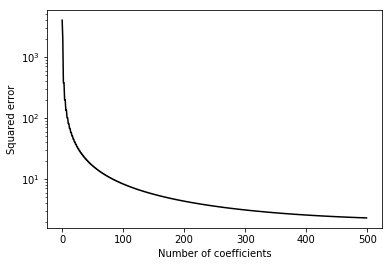

In [5]:
import numpy as np
import matplotlib.pyplot as plt

T = 2.0
t_all = np.arange( -2.0 * T, 2.0 * T, 0.001 )

x = np.zeros( t_all.shape )
for i in range( x.shape[0] ):
    cur_index = np.abs( (t_all[i] / T) - np.round( t_all[i] / T ) )
    if cur_index < 1./4.:
        x[i] = 1.
        
n_ks = np.arange( 500 )
n_k_error = np.zeros( n_ks.shape )

for i_n, n_k in enumerate( n_ks ):
    x_fourier = np.zeros( t_all.shape )
    for k in range( n_k ):
        if k == 0:
            ak = 1.
            x_fourier = x_fourier + ak / 2.
        else:
            ak = (2. / (k * np.pi)) * np.sin( (k * np.pi) / 2. )
            x_fourier = x_fourier + ak * np.cos( (2. * k * np.pi * t_all) * (1. / T) )
    cur_error = np.sum( np.power( x - x_fourier, 2. ) )
    n_k_error[i_n] = cur_error

plt.semilogy( n_ks, n_k_error, 'k-' )
plt.xlabel( 'Number of coefficients' )
plt.ylabel( 'Squared error' )
plt.show()

So we see a nice quantification of the fact that, as we add more coefficients to our finite approximation, we get closer and closer to our original signal $x$.

<a id="fourier_series_complex_exponentials"></a>
***

### Fourier series as complex exponentials

We've now seen two important pieces of the puzzle. First, we have seen that a continuous LTI system $T$ whose impulse response is $h$ has *complex exponentials as eigenfunctions*, with the eigenvalues given by the relevant *Laplace transform*:

$$ \mathcal{L}(h) = H(s) = \int_{-\infty}^\infty h(t)\,\mathrm{e}^{-st}\,\mathrm{d}t $$

We have also now seen that a *periodic* continuous signal $x$ can be *represented* as a *Fourier series*, with coefficients given by

$$
\begin{eqnarray*}
    a_k & = & \frac{2}{T}\,\int_0^T x(t)\,\cos\left(2\pi\,\frac{k}{T}\,t\right)\mathrm{d}t \\
    b_k & = & \frac{2}{T}\,\int_0^T x(t)\,\sin\left(2\pi\,\frac{k}{T}\,t\right)\mathrm{d}t \\
\end{eqnarray*}
$$

The Fourier series coefficients are sufficient to reconstitute the original signal—thus, it really is only a matter of our frame of reference that one or the other way of seeing the signal is "natural". The difference between the signal's original data on one period $[0, T)$ and the signal's Fourier series coefficient data $a_k$ and $b_k$ on the positive integers $k$ is the same as the difference between how you see the world and how you see the world with your head tilted $90^\circ$ to the right!

The question arises, then: is there a way to generalize the Fourier series to arbitrary, non-periodic signals?

To start off this train, let's take a slight detour to generalize our Fourier series one step further. Fundamentally, as we've seen throughout this section, sines and cosines are particular incarnations of another object—the complex exponential. It makes sense, then, that if we are able to decompose a periodic signal $x$ into sine and cosine terms, that we should also have a generalization decomposing $x$ into complex exponentials.

Suppose that we did have such a generalization. As we did above, let's think about what the *form* of such a decomposition would look like. Recall that, from Euler's identity, we can decompose sine and cosine into complex exponentials as

$$
\begin{eqnarray*}
    \cos(2\pi f t) & = & \frac{1}{2}\,\left(\mathrm{e}^{\mathrm{i} 2 \pi f t} + \mathrm{e}^{-\mathrm{i} 2 \pi f t}\right) \\
    \sin(2\pi f t) & = & \frac{1}{2}\,\left(\mathrm{e}^{\mathrm{i} 2 \pi f t} - \mathrm{e}^{\mathrm{-i} 2 \pi f t}\right)
\end{eqnarray*}
$$

The critical requirement is that we have components in both *positive and negative frequencies*; the presence of both components balances out the imaginary contributions of the exponentials, and results in a *purely real* result.

Using this, and recalling that $k/T$ served as our effective "frequency harmonics" above for our definition of the Fourier series, we might suppose that a reasonable decomposition (with coefficients denoted $X_k$) is

$$ x(t) \stackrel{?}{=} \sum_{k=-\infty}^\infty X_k\,\mathrm{e}^{\mathrm{i}\,2\pi\frac{k}{T}\,t} $$

As we did above, let's try to "solve" this equation for the individual coefficients $X_k$. To do this, we will follow after Fourier, by once again leveraging the [orthogonality](https://en.wikipedia.org/wiki/Orthogonal_functions) of complex exponentials. That is, we'll start by integrating both sides against the ([conjugate of] the) complex exponential for our desired term $k_0$:

$$
\begin{eqnarray*}
    \int_0^T x(t)\,\mathrm{e}^{-\mathrm{i}\,2\pi\frac{k_0}{T}\,t} & = & \int_0^T \sum_{k=-\infty}^\infty X_k\,\mathrm{e}^{\mathrm{i}\,2\pi\frac{k}{T}\,t}\,\mathrm{e}^{-\mathrm{i}\,2\pi\frac{k_0}{T}\,t}\,\mathrm{d}t \\
     & = & \sum_{k=-\infty}^\infty X_k\,\int_0^T \mathrm{e}^{\mathrm{i}2\pi\left(\frac{k-k_0}{T}\right)\,t}\,\mathrm{d}t
\end{eqnarray*}
$$

Here's where orthogonality comes in: notice the integral

$$ \int_0^T \mathrm{e}^{\mathrm{i}2\pi\left(\frac{k-k_0}{T}\right)\,t}\,\mathrm{d}t $$

The exponential in the integrand *winds around the unit circle* in the complex plane! Suppose that $k-k_0 = 1$; then, as $t$ runs from $0$ to $T$, this integral moves the "dial" of this exponential from its starting point at $1$ all the way around the circle once, back to its starting position; because of this, the integral is precisely $0$, as over the course of this movement, the "dial" has had no net displacement. This is true any time $k \neq k_0$, because any such values will always result in an integer number of complete turns around the unit circle, all of which will return an integral  of zero. (This is a special case of the [residue theorem](https://en.wikipedia.org/wiki/Residue_theorem).) The only exception to this is when $k = k_0$; this drives the exponent to $0$, which makes the integrand exactly $1$ for all $t$; in this case, the integral will be precisely $T$.

Using this, we can eliminate all of the terms except for $k_0$:

$$
\begin{eqnarray*}
    \int_0^T x(t)\,\mathrm{e}^{-\mathrm{i}\,2\pi\frac{k_0}{T}\,t} & = & X_{k_0}\,T \\
    \therefore X_{k_0} & = & \frac{1}{T}\,\int_0^T x(t)\,\mathrm{e}^{-\mathrm{i}\,2\pi\frac{k_0}{T}\,t}
\end{eqnarray*}
$$

So it appears that we *do* have a way to compute these coefficients!

<a id="cft"></a>
***

### Continuous Fourier transform

What a fascinating form these coefficients have, too! In fact, they seem almost identical to our form for the Laplace transform:

$$
\begin{eqnarray*}
    \mathcal{L}(x) = X(s) & = & \int_{-\infty}^\infty x(t)\,\mathrm{e}^{-st}\,\mathrm{d}t \\
    X_k & = & \frac{1}{T} \int_0^T x(t)\,\mathrm{e}^{-\mathrm{i}\,2\pi\frac{k}{T}\,t}\,\mathrm{d}t
\end{eqnarray*}
$$

Let's catalogue the differences we spot:

1. The Laplace transform as an integral in $t$ extends out to $\pm \infty$ in both directions; in contrast, our Fourier series coefficients are determined only on *one period* of the underlying signal. This makes sense, as in the Fourier series case, the signal is assumed to be *periodic*, so integrating over additional periods is redundant.
2. The Laplace transform is evaluated for arbitrary complex $s$; however, the Fourier coefficients are determined for the *purely sinusoidal* components $\mathrm{e}^{\mathrm{i}\,2\pi\frac{k}{T}\,t}$, where as we discussed above, the values $\frac{k}{T}$ take the role of "frequency harmonics" of the "fundamental frequency" $\frac{1}{T}$.

If we change the interval over which we compute the Fourier series coefficients to $[-T/2, T/2)$ and multiply both sides by $T$, we arrive at the symmetric integral

$$ X_k\,T = \int_{-\frac{T}{2}}^{\frac{T}{2}} x(t)\,\mathrm{e}^{-\mathrm{i}\,2\pi\frac{k}{T}\,t}\,\mathrm{d}t $$

Now, using the points above, we imagine the following construction: suppose that we let the period of our periodic signal $x$ grow and grow to infinity. As we let $T \to \infty$, two things happen: first, our bounds of integration begin to look like the $(-\infty, \infty)$ bounds in the Laplace transform; and second, the spacing between individual frequency harmonics $\frac{1}{T} \to 0$ becomes infinitessimally small, such that the individual frequencies being considered can be thought of as running on a *continuum* $f \in \mathbb{R}$, rather than distinct harmonics $\frac{k}{T}$. As long as $X_k\,T$ **converges**—meaning that the Fourier series coefficients $X_k$ *shrink* at about the same rate the period $T$ *grows*—this means that, after taking this limit, we arrive at a formula something like

$$ \lim_{T\to\infty} X_k\,T = \int_{-\infty}^\infty x(t)\,\mathrm{e}^{\mathrm{i}2\pi ft}\,\mathrm{d}t = \boxed{X(\mathrm{i}2\pi f)} $$

where we note the equivalence of the evaluated frequency $f \leftrightarrow \frac{k}{T}$ for particular values of $k$ and $T$. Notice that this is exactly the **Laplace transform evaluated at $\mathrm{i}2\pi ft$**!

Amazing! It turns out that we had a way to represent an arbitrary signal $x$ as a superposition of sinusoids right under our noses the whole time! It was hiding in the form of the Laplace transform **evaluated on the imaginary axis $s = \mathrm{i}2\pi ft$**. This new view—the Laplace transform of $x$ evaluated on the imaginary axis, corresponding to the coefficient for the sinusoidal component at frequency $f$—is denoted

$$ X(\mathrm{i}2\pi f) = \mathcal{F}(x) $$

and is called the **continuous Fourier transform** of $x$.

<a id="example_laplace_fourier"></a>
***

#### **Example**: Laplace and Fourier

Consider the damped sinusoid given by

$$ x(t) = \mathrm{e}^{-t}\,\cos(2\pi t)\, \theta(t) $$

We can plot this signal with respect to $t$ to get an idea of its behavior:

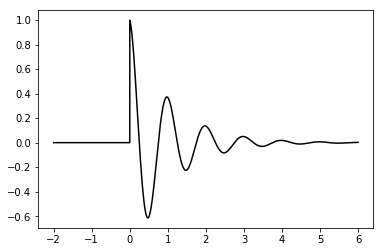

In [7]:
import numpy as np
import matplotlib.pyplot as plt

t_all = np.arange( -2., 6., 0.001 )

x = np.zeros( t_all.shape )
x[t_all >= 0.] = np.exp( -1. * t_all[t_all >= 0.] ) * np.cos( 2 * np.pi * t_all[t_all >= 0.] )

plt.plot( t_all, x, 'k-' )
plt.show()

We can evaluate the Laplace transform of this signal directly using the definition and a little arithmetic:

$$
\begin{eqnarray*}
    \mathcal{L}(x) = X(s) & = & \int_{-\infty}^\infty x(t)\,\mathrm{e}^{-st}\,\mathrm{d}t \\
     & = & \int_{-\infty}^\infty \mathrm{e}^{-t}\,\cos(2\pi t)\, \theta(t)\,\mathrm{e}^{-st}\,\mathrm{d}t \\
     & = & \int_0^\infty \left(\frac{\mathrm{e}^{\mathrm{i}2\pi t} + \mathrm{e}^{-\mathrm{i}2\pi t}}{2}\right)\,\mathrm{e}^{-st - t}\,\mathrm{d}t \\
     & = & \frac{1}{2} \int_0^\infty \mathrm{e}^{-[s - (-1 - \mathrm{i}2\pi)] t}\,\mathrm{d}t + \frac{1}{2} \int_0^\infty \mathrm{e}^{-[s - (-1 + \mathrm{i}2\pi)] t}\,\mathrm{d}t \\
     & = & \frac{1}{2} \frac{1}{s - (-1 - \mathrm{i}2\pi)} + \frac{1}{2} \frac{1}{s - (-1 + \mathrm{i}2\pi)} \quad (\ast) \\
     & = & \frac{s-(-1)}{[s - (- 1 - \mathrm{i}2\pi)]\,[s - (-1 + \mathrm{i}2\pi)]}
\end{eqnarray*}
$$

where for (\*) we can solve the integrals using [computer algebra](https://www.wolframalpha.com/input/?i=integrate+e%5E%28-%28s+-+%281+-+2+pi+i%29%29+*+t%29+dt+from+0+to+infinity). Take a second to note the ROC of the integrals before (\*): both integrals converge whenever $\mathrm{Re}(s) > -1$, as this causes the sign of the real part of the coefficient for $t$ in the exponential in the integrand to become *negative*, which drives toward convergence (exponential *decay*).

Now, let's visualize this Laplace transform in the $s$-plane:

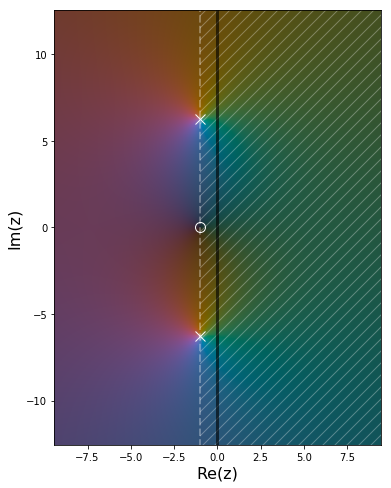

In [8]:
import cplot
import numpy
import numpy as np
from functools import reduce

z0 = np.array( [
    -1
] )
zp = np.array( [
    -1 - (2j * np.pi),
    -1 + (2j * np.pi)
] )

def H(s):
    num = reduce( lambda x, y: x * y, [s - x for x in z0], 1. )
    den = reduce( lambda x, y: x * y, [s - x for x in zp], 1. )
    return num / den

plt.figure( figsize = (8, 8) )

plt.xlabel( 'Re(z)', fontsize = 16 )
plt.ylabel( 'Im(z)', fontsize = 16 )

cplot.plot( H, -3*np.pi, 3*np.pi, -4*np.pi, +4*np.pi, 1000, 1000, alpha = 0.25 )

yl = plt.ylim()
plt.plot( np.array( [0, 0] ), yl, 'k-', linewidth = 3, alpha = 0.6 )

for cur_zero in z0:
    plt.plot( np.real( cur_zero ), np.imag( cur_zero ), 'wo',
              fillstyle = 'none',
              markersize = 10 )
for cur_pole in zp:
    plt.plot( np.real( cur_pole ), np.imag( cur_pole ), 'wx',
              fillstyle = 'none',
              markersize = 10 )

x_roc = np.array( [-1, -1, 4*np.pi, 4*np.pi] )
y_roc = np.array( [-5*np.pi, 5*np.pi, 5*np.pi, -5*np.pi] )

plt.plot( x_roc[:2], y_roc[:2], 'w--', linewidth = 2., alpha = 0.3 )
plt.fill( x_roc, y_roc,
          facecolor = 'none',
          edgecolor = 'w',
          alpha = 0.3,
          linewidth = 0.0,
          hatch = '//' )

plt.ylim( yl )
plt.xlim( -3*np.pi, 3*np.pi )
plt.show()

We see here (and from the rational form of the Laplace transform, above) that $X(s)$ has two poles—at $-1 \pm 2\pi$—and one zero—at $-1$. Notice also that the Laplace transform's ROC—$\mathrm{Re}(s) > -1$ includes the imaginary axis, $s = \mathrm{i}2\pi f$, where the Fourier transform lives. This is an important consideration: if the **ROC does not include the imaginary axis**, then this means that the **Fourier transform does not exist**, as the relevant integral does not converge.

In this case, we can determine the Fourier transform of $x$ by plugging in the imaginary axis, $\mathrm{i}2\pi f$, for $s$ in the Laplace transform:

$$ \mathcal{F}(x) = X(\mathrm{i}2\pi f) = \frac{\mathrm{i}2\pi f-(-1)}{[\mathrm{i}2\pi f - (- 1 - \mathrm{i}2\pi)]\,[\mathrm{i}2\pi f - (-1 + \mathrm{i}2\pi)]} $$

Although this is a little ugly, we can easily plug this into a computer and plot what this transform looks like, separated into its *real* and *imaginary* components (remember, the Laplace transform—and hence its restriction, the Fourier transform—takes values in $\mathbb{C}$!):

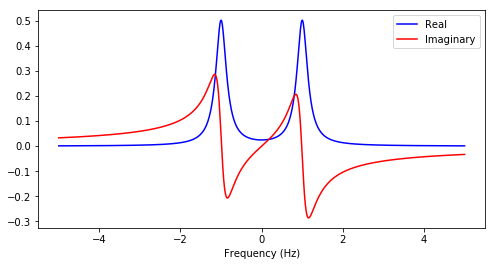

In [9]:
def H_fourier( f ):
    return H( 2j * np.pi * f )

f_plot = np.linspace( -5, 5, 1000 )

fourier_complex = np.array( [H_fourier(f) for f in f_plot] )
fourier_real = np.real( fourier_complex )
fourier_imag = np.imag( fourier_complex )

plt.figure( figsize = (8, 4))
plt.plot( f_plot, fourier_real, 'b-', label = 'Real' )
plt.plot( f_plot, fourier_imag, 'r-', label = 'Imaginary' )
plt.legend()
plt.xlabel( 'Frequency (Hz)' )
plt.show()

Note that the frequency axis here is different than the imaginary axis in the Laplace transform above; this is because of the scale factor of $2\pi$ in the transformation $s = \mathrm{i}2\pi f$, which converts from angular frequency in radians per second to temporal frequency in $\textrm{Hz}$. It is also interesting to note that the *real* part of the Fourier transform is **even** (symmetric about zero), while the *imaginary* part of the Fourier transform is **odd** (antisymmetric about zero); we will see later that there is a very good reason for this symmetry.

In practice, we generally are less interested in the *real* and *imaginary* components of the Fourier transform *per se*, and are more interested in another representation: the **polar coordinates** of the transform coefficients. Each complex number can be represented in two forms,

$$ z = x + \mathrm{i}y \Leftrightarrow z = |z|\mathrm{e}^{\mathrm{i}\angle z} $$

The left is the cartesian form, which we displayed above; on the right, however, we see that we can decompose a complex number into its **magnitude** $|z$ and it's **argument** (or *phase angle*) $\angle z$. Let's see what this representation looks like for the signal we're examining:

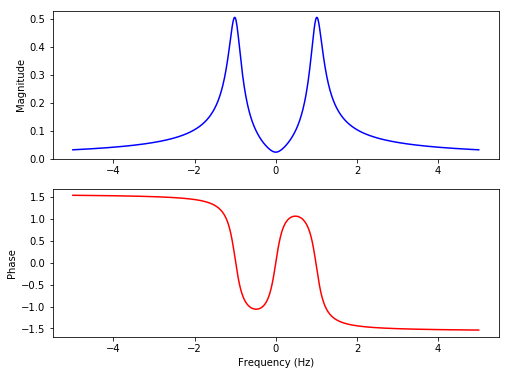

In [10]:
def H_fourier( f ):
    return H( 2j * np.pi * f )

f_plot = np.linspace( -5, 5, 1000 )

fourier_complex = np.array( [H_fourier(f) for f in f_plot] )
fourier_abs = np.abs( fourier_complex )
fourier_angle = np.angle( fourier_complex )

fig, axs = plt.subplots( 2, 1, figsize = (8, 6) )
axs[0].plot( f_plot, fourier_abs, 'b-', label = 'Real' )
axs[0].set_ylabel( 'Magnitude' )
axs[1].plot( f_plot, fourier_angle, 'r-', label = 'Imaginary' )
axs[1].set_ylabel( 'Phase' )
axs[1].set_xlabel( 'Frequency (Hz)' )
plt.show()

Let's see if what we're seeing makes sense. It looks like our signal has peaks in frequency content at $\pm 1\textrm{ Hz}$. Recall that our original signal had the form

$$ x(t) = \mathrm{e}^{-t}\,\cos(2\pi t)\, \theta(t) $$

Where is most of the spectral energy in this signal? Well, there's a big oscillatory component to this signal smack dab in the middle: $\cos(2\pi t)$, which just so happens to be an *oscillation at $1 \textrm{ Hz}$!* So it seems that this Fourier transform makes sense!

What can we glean from the phase plot, in red? Well, for one thing, it's all over the place! What does this mean? As we'll see later on, the angle part of the Fourier transform of a signal $h$ determines the *phase delay* of each frequency component of the output of $h$'s corresponding LTI system; that is, in addition to *scaling* sinusoidal inputs (as shown in the magnitude plot), LTI systems also *phase shift* sinusoidal inputs in time. When the angle component of a signal's Fourier transform is highly nonlinear—as it is in this case—it means that the corresponding LTI system messes with the phase offsets of each frequency differently, which in turn means that phase relationships of the original inputs are *no longer preserved*. The resulting effect on the output is known as **phase distortion**.

<a id="fourier_inversion"></a>
***

### Fourier inversion

Above, for Fourier series, we showed that our formulas could be broken up into two distinct groups: *analysis*, where we break apart the sinusoidal components of the underlying signal; and *synthesis*, where we reconstruct the original signal based on the components we extract. In the complex exponential case, these took the form of

$$
\begin{eqnarray*}
    \textrm{(Analysis)}\quad X_{k_0} & = & \frac{1}{T}\,\int_0^T x(t)\,\mathrm{e}^{-\mathrm{i}\,2\pi\frac{k_0}{T}\,t} \\
    \textrm{(Synthesis)}\quad x(t) & = & \sum_{k=-\infty}^\infty X_k\,\mathrm{e}^{\mathrm{i}2\pi\frac{k}{T}t}
\end{eqnarray*}
$$

The formula we deduced above for the continuous Fourier transform,

$$ X(\mathrm{i}2\pi f) = \int_{-\infty}^\infty x(t)\,\mathrm{e}^{-\mathrm{i}2\pi ft}\,\mathrm{d}t $$

is the *analysis* formula for this transform; however, under certain conditions, we can actually *invert* this transform, to recover the original function from its sinusoidal coefficients. In this case, we have that

$$ \boxed{x(t) = \int_{-\infty}^\infty X(\mathrm{i}2\pi f)\,\mathrm{e}^{\mathrm{i}2\pi ft}\,\mathrm{d}f} = \mathcal{F}^{-1}(X)$$

This is the *synthesis* equation, or the **inverse Fourier transform**. Note that here the integral is in $f$, and not in $t$; indeed, $t$ is the free variable of the left hand side of the equation! Here we are *adding up* the contributions of sinusoids at **each frequency $f$** to build up $x(t)$.

In cases where the inverse transform exists—which includes most "well-behaved" and "real-world" functions we're concerned with here—we see that neither the **time domain** perspective—that of the original signal $x(t)$—nor the **frequency domain** perspective—that of the transformed signal, $X(\mathrm{i}2\pi f)$—is privileged over the other. Rather, the two views of the function are like two different angles of viewing a diamond: each is telling you about the same diamond, but each view goes about it in a different way.

<a id="example_frequency_shift"></a>
***

#### **Example**: Frequency shift

Let's use the Fourier inversion formula to solve an important special case, where a Fourier transform's frequency has been *shifted* by some amount $f_0$. That is, suppose that we know

$$ x(t) \leftrightarrow X(\mathrm{i}2\pi f) $$

are a Fourier transform pair; what, then, is the *inverse* Fourier transform of $ X(\mathrm{i}2\pi(f + f_0))$?

Using the inverse Fourier transform, we note that

$$ \mathcal{F}^{-1}(X(\mathrm{i}2\pi(f + f_0))) = \int_{-\infty}^\infty X(\mathrm{i}2\pi(f + f_0))\,\mathrm{e}^{\mathrm{i}2\pi ft}\,\mathrm{d}f $$

We can make the change of variables $f' = f + f_0$ (which implies $f = f' - f_0$); this yields

$$
\begin{eqnarray*}
    \mathcal{F}^{-1}(X(\mathrm{i}2\pi(f + f_0))) & = & \int_{-\infty}^\infty X(\mathrm{i}2\pi(f'))\,\mathrm{e}^{\mathrm{i}2\pi (f' -f_0)t}\,\mathrm{d}f' \\
     & = & \mathrm{e}^{-\mathrm{i}2\pi f_0 t} \int_{-\infty}^\infty X(\mathrm{i}2\pi(f'))\,\mathrm{e}^{\mathrm{i}2\pi f't}\,\mathrm{d}f' \\
     & = & \boxed{\mathrm{e}^{-\mathrm{i}2\pi f_0 t}\,x(t)}
\end{eqnarray*}
$$

where in the last step we utilized the fact that the inverse Fourier transform of $X$ is $x$.

So we see that shifting in frequency is equivalent to **modulating** our signal $x(t)$ by a complex sinusoid $\mathrm{e}^{-\mathrm{i}2\pi f_0 t}$. In fact, if we were to shift the frequency of our signal in both directions, we would have

$$
\begin{eqnarray*}
    \frac{1}{2}\mathcal{F}^{-1}\left(X(\mathrm{i}2\pi(f + f_0)) + X(\mathrm{i}2\pi(f - f_0))\right) & = & \frac{1}{2}\left(\mathrm{e}^{-\mathrm{i}2\pi f_0 t}\,x(t) + \mathrm{e}^{\mathrm{i}2\pi f_0 t}\,x(t)\right) \\
     & = & x(t)\,\cos(2\pi f_0 t)
\end{eqnarray*}
$$

This is precisely a sinusoid with the  **amplitude modulated** by $x$! Let's see what this looks like with an example. Suppose that $x(t)$ is given by the decaying exponential $\mathrm{e}^{-a t}\theta(t)$, with real $a > 0$. The Laplace transform of this signal [is given by](https://www.wolframalpha.com/input/?i=laplace+transform+exp%28-at%29theta%28t%29)

$$ X(s) = \frac{1}{s + a} $$

with the region of convergence given by $\mathrm{Re}(s) > -a$. The Fourier transform of $x$, then, is just this function evaluated at $s = \mathrm{i}2\pi f$:

$$ \mathcal{F}(x) = X(\mathrm{i}2\pi f) = \frac{1}{\mathrm{i}2\pi f + a} $$

We can now use the formula above for an amplitude modulated cosine:

$$ \frac{1}{2}\mathcal{F}^{-1}\left(X(\mathrm{i}2\pi(f + f_0)) + X(\mathrm{i}2\pi(f - f_0))\right) = x(t)\,\cos(2\pi f_0 t) $$

to look at how the Fourier transform of this modulated signal is related to its time domain representation as we change $f_0$:

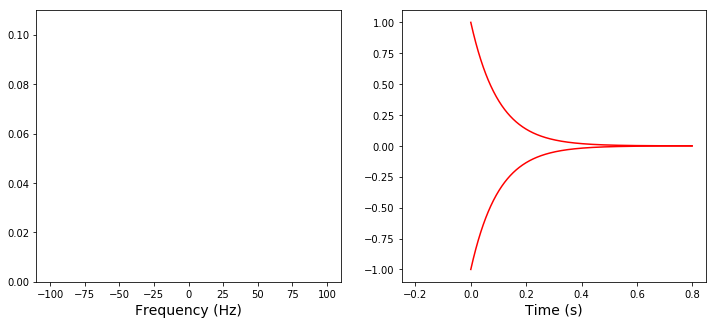

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

a = 10.
f0_all = np.linspace( 0., 40., 100 )
f0_all = np.r_[f0_all, np.flip( f0_all )]
f0 = f0_all[0]

def X(s):
    return 1. / (s + a)

f_all = np.linspace( -100, 100, 2000 )
X_plus = X( 1.j * 2 * np.pi * (f_all + f0) )
X_minus = X( 1.j * 2 * np.pi * (f_all - f0) )
X_total = (1./2) * (X_plus + X_minus)

t_all = np.arange( -0.2, 0.8, 0.001 )
x_all = np.zeros( t_all.shape )
x_all[t_all >= 0] = np.exp( -a * t_all[t_all >= 0] ) * np.cos( 2. * np.pi * f0 * t_all[t_all > 0] )
env_all = np.exp( -a * t_all[t_all >= 0] )

fig, axs = plt.subplots( 1, 2, figsize = (12, 5) )

line_f, = axs[0].plot( f_all, np.abs( X_total ), 'k-' )
axs[0].set_ylim( 0, 1.1 * (1 / a) )

axs[1].plot( t_all[t_all >= 0], env_all, 'r-' )
axs[1].plot( t_all[t_all >= 0], -env_all, 'r-' )
line_t, = axs[1].plot( t_all, x_all, 'k-' )
axs[1].set_ylim( -1.1, 1.1 )

axs[0].set_xlabel( 'Frequency (Hz)', fontsize = 14 )
axs[1].set_xlabel( 'Time (s)', fontsize = 14 )

def init():
    line_t.set_data( [], [] )
    line_f.set_data( [], [] )
    return line_t, line_f
    
n_frames = f0_all.shape[0]
    
def animate( i ):
    f0 = f0_all[i]
    
    X_plus = X( 1.j * 2 * np.pi * (f_all + f0) )
    X_minus = X( 1.j * 2 * np.pi * (f_all - f0) )
    X_total = (1./2) * (X_plus + X_minus)
    
    x_all = np.zeros( t_all.shape )
    x_all[t_all >= 0] = np.exp( -a * t_all[t_all >= 0] ) * np.cos( 2. * np.pi * f0 * t_all[t_all > 0] )
    
    line_t.set_data( t_all, x_all )
    line_f.set_data( f_all, np.abs( X_total ) )
    return line_t, line_f
    
anim = FuncAnimation( fig, animate, init_func = init,
                      frames = n_frames,
                      interval = 40,
                      blit = True )

In [15]:
from IPython.display import HTML
HTML( anim.to_html5_video() )

So we see that sinusoidal amplitude modulation at frequency $f_0$—with the envelope given by $x(t)$ in red—corresponds to splitting the original spectrum into *two copies*, shifted to have their centers at $\pm f_0$.

<a id="bode_plots"></a>
***

### Bode plots

Recall that there is a natural equivalence between *signals* and *LTI systems*, given by taking the *impulse response* of a given system (in one direction) or taking the system that convolves with a given signal (in the other). Thinking back to our original definition of the Laplace transform as applied to a *system* with a given *impulse response*, we recall that this transform gives us the *complex scale factors* applied to *complex exponential inputs* for that system; hence, in the cases of the continuous Fourier transform—which, as we've seen, is just a restrictions of the Laplace transform—the same interpretation applies! That is to say, while we showed that the Fourier transform considered as applying to *signals* shows the **frequency content** of a given signal, it also shows the **frequency response** of an LTI system with that signal as impulse response to other inputs.

In the practical design of systems, we are therefore very interested in the behavior of plots showing the *magnitude* and *phase* components of the Fourier transform; these plots tell us how sinusoidal inputs at each frequency are *scaled* (magnitude) and *shifted* (phase) when they are transformed into the system's output.

Practically, as many phenomena of interest scale logarithmically, we use the **decibel (dB)** as the units of amplitude for these plots. The decibel equivalent of an amplitude $A$ is defined **relative to a reference value** $A_0$ by the expression

$$ A_\textrm{dB} = 20\,\log_{10}\left(\frac{A}{A_0}\right) $$

Hence, a tenfold increase in amplitude versus the reference corresponds to 20 dB. When working with the Fourier transforms of systems, the usual reference taken is that $A_0 = 1$, corresponding to the system "passing" the frequency with no change in amplitude.

<a id="example_lowpass"></a>
***

#### **Example**: First-order lowpass filter

Consider the system $T$ with impulse response

$$ h(t) = 2\pi f_0\,\mathrm{e}^{-2\pi f_0t}\,\theta(t) $$

for some real $f_0 > 0$. The Laplace transform of this system is given by

$$
\begin{eqnarray*}
    H(s) & = & \int_{-\infty}^\infty 2\pi f_0\,\mathrm{e}^{-2\pi f_0t}\,\theta(t)\,\mathrm{e}^{-st}\,\mathrm{d}t \\
     & = & 2\pi f_0 \int_0^\infty \mathrm{e}^{-(s+2\pi)\,t}\,\mathrm{d}t \\
     & = & \frac{2\pi f_0}{s + 2\pi f_0}\quad(\ast)
\end{eqnarray*}
$$

where (\*) follows using [computer algebra](https://www.wolframalpha.com/input/?i=integrate+exp%28-%28s%2B2+pi+f%29t%29+dt+from+0+to+infinity). (Note that the ROC for this Laplace transform is

$$ \mathrm{Re}(s) > -2\pi f_0 $$

as this drives the real part of the coefficient of $t$ in the exponent to be *negative*, inducing convergence of the integral.)

This Laplace transform is notable for its pole at $s = -2\pi f_0$. Let's see what this Laplace transform looks like in the $s$-plane:

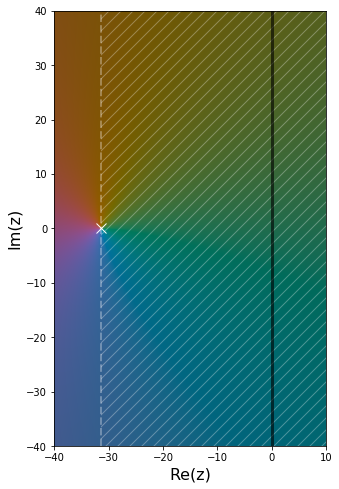

In [16]:
import cplot
import numpy
import numpy as np
from functools import reduce

f0 = 5.

z0 = np.array( [
] )
zp = np.array( [
    -2 * np.pi * f0
] )

def H(s):
    num = reduce( lambda x, y: x * y, [s - x for x in z0], 1. )
    den = reduce( lambda x, y: x * y, [s - x for x in zp], 1. )
    return num / den

plt.figure( figsize = (8, 8) )

plt.xlabel( 'Re(z)', fontsize = 16 )
plt.ylabel( 'Im(z)', fontsize = 16 )

cplot.plot( H, -40, 10, -40, 40, 1000, 1000, alpha = 0.1 )

yl = plt.ylim()
plt.plot( np.array( [0, 0] ), yl, 'k-', linewidth = 3, alpha = 0.6 )

for cur_zero in z0:
    plt.plot( np.real( cur_zero ), np.imag( cur_zero ), 'wo',
              fillstyle = 'none',
              markersize = 10 )
for cur_pole in zp:
    plt.plot( np.real( cur_pole ), np.imag( cur_pole ), 'wx',
              fillstyle = 'none',
              markersize = 10 )

x_roc = np.array( [-2*np.pi*f0, -2*np.pi*f0, 40, 40] )
y_roc = np.array( [-40, 40, 40, -40] )

plt.plot( x_roc[:2], y_roc[:2], 'w--', linewidth = 2., alpha = 0.3 )
plt.fill( x_roc, y_roc,
          facecolor = 'none',
          edgecolor = 'w',
          alpha = 0.3,
          linewidth = 0.0,
          hatch = '//' )

plt.ylim( yl )
plt.xlim( -40, 10 )
plt.show()

Let's split our analysis of the Fourier transform into the two parts of the polar representation, *magnitude* and *phase*.

**Magnitude $|H(\mathrm{i}2\pi f)|$**. We can examine the magnitude of the Fourier transform analytically by directly applying absolute value function to our equation above:

$$
\begin{eqnarray*}
    |H(\mathrm{i}2\pi f)| & = & \left|\frac{2\pi f_0}{\mathrm{i}2\pi f + 2\pi f_0}\right| \\
     & = & \frac{2\pi f_0}{2\pi|f_0 + \mathrm{i}f|} \\
     & = & \frac{1}{\left|1 + \mathrm{i}\frac{f}{f_0}\right|}
\end{eqnarray*}
$$

We note that, by analogy with the length of a vector in cartesian coordinates,

$$ |x + \mathrm{i}y| = \sqrt{x^2 + y^2} $$

Thus, we have that

$$ |H(\mathrm{i}2\pi f)| = \frac{1}{\sqrt{1 + \left(\frac{f}{f_0}\right)^2}} $$

Let's examine what happens to this expression in a few different limits. First, let's consider what happens when $f$ is **very small relative to $f_0$**; that is, when $\frac{f}{f_0} \to 0$. Then,

$$ |H(\mathrm{i}2\pi f)| \sim \frac{1}{\sqrt{1 + 0}} = 1 $$

In decibels, this is given as

$$ |H(\mathrm{i}2\pi f)|_\textrm{dB} = 20\,\log_{10}\left(\frac{1}{1}\right) = 0 $$

So, for *lower frequency input*, our system $T$ **passes inputs unscaled**!

In contrast, we can consider the case where $f$ is **very large relative to $f_0$**; that is, when $\frac{f}{f_0} \gg 1$. Then, the contribution of $1$ in the square root in the denominator is small, and

$$ |H(\mathrm{i}2\pi f)| \sim \frac{1}{\sqrt{\left(\frac{f}{f_0}\right)^2}} = \frac{f_0}{f} $$

So, for *higher frequency input*, our system **attenuates inputs**, with the degree of attenuation inversely proportional to frequency.

We can again compute this in decibel (logarithmic) units:

$$ |H(\mathrm{i}2\pi f)|_\textrm{dB} = 20\,\log_{10}\left(\frac{\left(\frac{f_0}{f}\right)}{1}\right) = 20\,\log_{10} f_0 - 20\,\log_{10} f $$

So we see the precise *amount* of attenuation present here: for every factor of $10$ increase in $f$ (also called a **decade**), our system $T$ attenuates the input at $f$ by an additional $20$ dB. Stated another way, beyond $f_0$, $T$ attenuates *$20$ dB per decade*.

Let's see this plotted out. To do so, we'll plot logarithmically *on both axes*—this is known as a **Bode plot**:

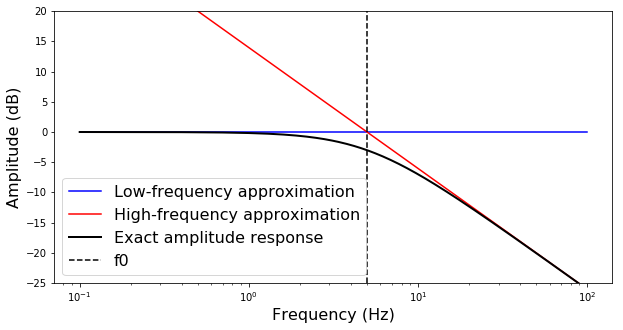

In [17]:
import numpy as np
import matplotlib.pyplot as plt

f0 = 5.

def H_amplitude( f ):
    return 1. / np.sqrt(1 + np.power((f / f0), 2.))

def to_db( x ):
    return 20. * np.log10( x )

f_display = np.arange( 0.1, 100, 0.1 )

plt.figure( figsize = (10, 5) )

# Approximation 1
amplitude_approx_1 = 0. * np.ones( f_display.shape )
plt.semilogx( f_display, amplitude_approx_1, 'b-', label = 'Low-frequency approximation' )

# Approximation 2
amplitude_approx_2 = 20. * np.log10( f0 ) - 20. * np.log10( f_display )
plt.semilogx( f_display, amplitude_approx_2, 'r-', label = 'High-frequency approximation' )

# Exact
amplitude_exact = to_db( H_amplitude( f_display ) )
plt.semilogx( f_display, amplitude_exact, 'k-', label = 'Exact amplitude response',
              linewidth = 2 )

plt.semilogx( np.array( [f0, f0] ), np.array( [-25, 20] ), 'k--', label = 'f0' )

plt.ylabel( 'Amplitude (dB)', fontsize = 16 )
plt.xlabel( 'Frequency (Hz)', fontsize = 16 )

plt.ylim( -25, 20 )

plt.legend( fontsize = 16 )

plt.show()

Notice the slight discrepancy between the behavior of the approximations we made and the actual value of $|H|$ near to the frequency $f_0$; we can actually quantify this mismatch by numerically checking the value of $|H(\mathrm{i}2\pi f_0)|$:

In [18]:
print( '{0:0.3f} dB'.format( to_db( H_amplitude( f0 ) ) ) )

-3.010 dB


Regardless of what we choose for $f_0$, this value is very close to $-3$ dB; therefore, the value $f_0$ in our original construction of this system is known as the **"3 dB frequency"**. Note also, however, that $f_0$ demarcates the transition between the two modes of behavior of $T$ with regard to input sinusoids: below $f_0$, $T$ *passes* sinusoids, while above $f_0$, $T$ *attenuates* sinusoids. Thus $f_0$ is also given another name: the **cutoff frequency**, as it serves as the cutoff between these two behaviors.

This behavior also gives rise to another bit of nomenclature: because this system specifically *passes low frequencies*, it is known as a **lowpass filter** (a filter being another name for a *system*).

Our representation of this system would be incomplete, however, were we to omit a discussion of its *phase response*!

**Phase, $\angle H(\mathrm{i}2\pi f)$**. Before we get started, as above it's important to have a small discussion on units. Bode plots for phase can be expressed in units of **radians** (with $2\pi\textrm{ rad}$ making up one *cycle*) or in units of **degrees** (with $360^\circ$ making up one cycle). We can interconvert between these two by leveraging the identities

$$ \angle A_\textrm{rad} = \frac{2\pi}{360} \angle A_\textrm{deg} \qquad \angle A_\textrm{deg} = \frac{360}{2\pi} \angle A_\textrm{rad} $$

The algebra of computing complex angles is a little more complicated than for magnitudes. We note that the expression for $\angle H(\mathrm{i}2\pi f)$ can be simplified to

$$
\begin{eqnarray*}
    \angle H(\mathrm{i}2\pi f) & = & \angle \left(\frac{2\pi f_0}{\mathrm{i}2\pi f + 2\pi f_0}\right) \\
     & = & \angle \left( \frac{1}{1 + \mathrm{i}\frac{f}{f_0}} \right) \\
     & = & - \angle \left( 1 + \mathrm{i}\frac{f}{f_0} \right )\quad (\ast) \\
     & = & - \arctan\left(\frac{f}{f_0}\right) \quad (\ast\ast)
\end{eqnarray*}
$$

where (\*) follows from [these identities](https://en.wikipedia.org/wiki/Argument_(complex_analysis)#Identities) and (\*\*) follows from [these](https://en.wikipedia.org/wiki/Argument_(complex_analysis)#Computing_from_the_real_and_imaginary_part).

Let's start with our two cases from the magnitude section: the *low-frequency* and *high-frequency* limits. In the *low-frequency limit*, we take $\frac{f}{f_0} \to 0$; thus, our expression for the phase becomes

$$ \angle H(\mathrm{i}2\pi f) \sim - \arctan(0) = 0\textrm{ rad} = 0^\circ $$

By contrast, in the *high-frequency limit*, we take $\frac{f}{f_0} \to \infty$; with this, our phase angle becomes

$$ \angle H(\mathrm{i}2\pi f) \sim \lim_{x \to \infty} -\arctan(x) = -\frac{\pi}{2}\textrm{ rad} = -90^\circ $$

So it looks like there is a transition in phase angle, from $0^\circ$ for the *passed low frequencies* (again, building the picture that these frequencies are *unaltered*), to a $-90^\circ$ phase **lag** for *attenuated high frequencies*.

What happens in the transition between these two asymptotes? Well, to start, we can directly evaluating $\angle H(\mathrm{i}2\pi f)$ at the cutoff frequency $f_0$:

$$ \angle H(\mathrm{i}2\pi f_0) = - \arctan\left(\frac{f_0}{f_0}\right) = -\arctan(1) = -\frac{\pi}{4}\textrm{ rad} = -45^\circ $$

So it appears that the cutoff frequency is the "midpoint" between the two asymptotes. (Going further, an exposision [here](https://lpsa.swarthmore.edu/Bode/underdamped/underdampedApprox.html#method_2) details how we can build a linear approximation of the phase curve at $f_0$ that utilizes the slope of the phase *vs.* frequency curvee at this point:

$$
\begin{eqnarray*}
    \angle H(\mathrm{i}2\pi f)^\textrm{(approx)}_\textrm{rad} & = & -\frac{\pi}{4} - \frac{\ln(10)}{2}\cdot\log_{10}\left(\frac{f}{f_0}\right) \\
    \angle H(\mathrm{i}2\pi f)^\textrm{(approx)}_\textrm{deg} & \sim & -45^\circ - 66^\circ\cdot\log_{10}\left(\frac{f}{f_0}\right)
\end{eqnarray*}
$$

So we see that, around the cutoff frequency, there is about $66^\circ$ of additional phase lag per decade (or 10-fold increase) in frequency.

Let's see what this looks like plotted out:

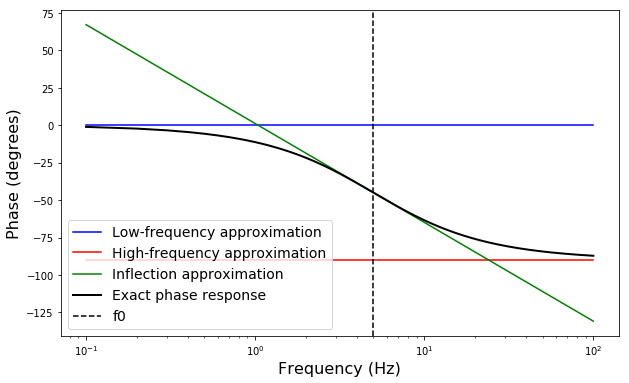

In [19]:
import numpy as np
import matplotlib.pyplot as plt

f0 = 5.

def H_angle( f ):
    return -np.arctan( f / f0 )

def to_deg( w ):
    return (360 / (2 * np.pi)) * w

f_display = np.arange( 0.1, 100, 0.1 )

plt.figure( figsize = (10, 6) )

# Approximation 1
angle_approx_1 = to_deg( 0. * np.ones( f_display.shape ) )
plt.semilogx( f_display, angle_approx_1, 'b-', label = 'Low-frequency approximation' )

# Approximation 2
angle_approx_2 = to_deg( -np.pi / 2 * np.ones( f_display.shape ) )
plt.semilogx( f_display, angle_approx_2, 'r-', label = 'High-frequency approximation' )

# Approximation 3
angle_approx_3 = to_deg( -np.pi / 4 - (np.log( 10 ) / 2) * np.log10( (1. / f0) * f_display ) )
plt.semilogx( f_display, angle_approx_3, 'g-', label = 'Inflection approximation' )

# Exact
angle_exact = to_deg( H_angle( f_display ) )
plt.semilogx( f_display, angle_exact, 'k-', label = 'Exact phase response',
              linewidth = 2 )

yl = plt.ylim()
plt.semilogx( np.array( [f0, f0] ), yl, 'k--', label = 'f0' )

plt.ylabel( 'Phase (degrees)', fontsize = 16 )
plt.xlabel( 'Frequency (Hz)', fontsize = 16 )

plt.ylim( -25, 20 )
plt.ylim( yl )

plt.legend( fontsize = 14 )

plt.show()

$\ldots$ **Something insightful** $\ldots$

<a id="perfect_lowpass"></a>
***

### The perfect lowpass filter

Above we gave an example of a first-order lowpass filter with cutoff $f_0$, and looked at its properties. In particular, if our goal is to keep every input frequency below $f_0$ and reject every frequency above $f_0$, we note that the filter we investigated above has properties that are far from ideal. For example, as shown in the magnitude plot, the filter *attenuates frequencies below the cutoff*; and, further, the filter *does not completely block frequencies above the cutoff*, instead having a smooth 20 dB per decade rolloff instead.

The question naturally arises, then: can we construct a "perfect" lowpass filter, which passes everything below $f_0$ and rejects everything above? (This is often called a "brick wall" filter, because of the appearance of its frequency response.)

If we were able to construct such a filter, its Fourier transform should be

$$ X(\mathrm{i}2\pi f) = \Pi_{f_0}(f) = \begin{cases}
                                   0, & |f| > f_0 \\
                                   1, & |f| \leq f_0
  \end{cases} $$
  
which we denote the **rectangular (or rect) function of width $f_0$, $\Pi_{f_0}$**. To determine the impulse response that corresponds to this Fourier transform, we can use the Fourier inversion (or synthesis) equation from above:

$$
\begin{eqnarray*}
    x(t) & = & \int_{-\infty}^\infty X(\mathrm{i}2\pi f)\,\mathrm{e}^{\mathrm{i}2\pi f t}\,\mathrm{d}f \\
     & = & \int_{-\infty}^\infty \Pi_{f_0}(f)\,\mathrm{e}^{\mathrm{i}2\pi f t}\,\mathrm{d}f \\
     & = & \int_{-f_0}^{f_0} \mathrm{e}^{\mathrm{i}2\pi f t}\,\mathrm{d}f \\
     & = & \frac{1}{\mathrm{i}2\pi t} \mathrm{e}^{\mathrm{i}2\pi f t} \Big\rvert_{-f_0}^{f_0} \\
     & = & \frac{1}{\pi t} \frac{1}{2\mathrm{i}} \left(\mathrm{e}^{\mathrm{i}2\pi f_0 t} - \mathrm{e}^{-\mathrm{i}2\pi f_0 t}\right) \\
     & = & \frac{\sin(2\pi f_0 t)}{\pi t}
\end{eqnarray*}
$$

This function is in a family of functions known as the **$\mathrm{sinc}$ functions**, which are of the form

$$ \mathrm{sinc}(x) = \frac{\sin(\pi x)}{\pi x} $$

Hence, we have

$$ \mathcal{F}^{-1}(\Pi_{f_0}) = 2 f_0 \mathrm{sinc}(2 f_0 t) $$

Let's plot this out with varying $f_0$ and see what happens to our deduced impulse response:

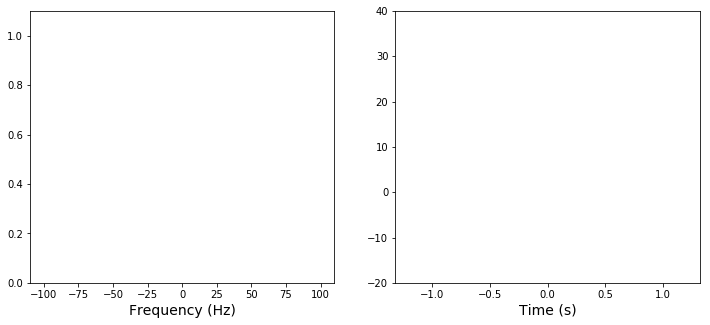

In [20]:
import numpy as np
import matplotlib.pyplot as plt

f0_all = np.linspace( 1., 40., 100 )
f0_all = np.r_[f0_all, np.flip( f0_all )]
f0 = f0_all[0]

def X(f):
    ret = np.zeros( f.shape )
    ret[np.abs( f ) < f0] = 1.
    return ret

def x(t):
    return np.divide( np.sin( 2. * np.pi * f0 * t ), np.pi * t )

f_all = np.linspace( -100, 100, 2000 )
X_all = X( f_all )

t_all = np.arange( -1.2, 1.2, 0.001 )
x_all = x( t_all )

fig, axs = plt.subplots( 1, 2, figsize = (12, 5) )

line_f, = axs[0].plot( f_all, X_all, 'k-' )
axs[0].set_ylim( 0, 1.1 )

line_t, = axs[1].plot( t_all, x_all, 'k-' )
axs[1].set_ylim( -20., 40. )

axs[0].set_xlabel( 'Frequency (Hz)', fontsize = 14 )
axs[1].set_xlabel( 'Time (s)', fontsize = 14 )

def init():
    line_t.set_data( [], [] )
    line_f.set_data( [], [] )
    return line_t, line_f
    
n_frames = f0_all.shape[0]
    
def animate( i ):
    f0 = f0_all[i]
    
    def X(f):
        ret = np.zeros( f.shape )
        ret[np.abs( f ) < f0] = 1.
        return ret

    def x(t):
        return np.divide( np.sin( 2. * np.pi * f0 * t ), np.pi * t )

    X_all = X( f_all )
    x_all = x( t_all )
    
    line_t.set_data( t_all, x_all )
    line_f.set_data( f_all, X_all )
    return line_t, line_f
    
anim = FuncAnimation( fig, animate, init_func = init,
                      frames = n_frames,
                      interval = 40,
                      blit = True )

In [21]:
from IPython.display import HTML
HTML( anim.to_html5_video() )

There are a few interesting things to notice here about the impulse response we've deduced. The first and most glaring aspect is that this system is *non-causal*; in fact, the impulse response is symmetric and runs infinitely in both directions! This places a strong barrier in the way of implementing this ideal lowpass system in real-world scenarios. In this same vein, it's worth noting that this system is *not BIBO stable*; indeed, we note that [$\mathrm{sinc}$ functions are not absolutely integrable](https://math.stackexchange.com/questions/25586/how-to-prove-absolute-summability-of-sinc-function)!

Although $\mathrm{sinc}$ filters are, practically speaking, not feasible to implement, they do give us an interesting glimpse into the relationship between *frequency* and *time*. Above, we can note a very interesting pattern that emerges between the rect function's width in the frequency domain and the shape of $x(t)$ in the time domain: as the rect function becomes *wider*—that is, as we care less and less about pulling out *one frequency* in particular—the corresponding $\mathrm{sinc}$ function's main, central "lobe" becomes *narrower*, as more energy in the function becomes concentrated in a smaller amount of time. As we will see later on in this chapter, this tradeoff between width in frequency and time is fundamental to the behavior of all signals.

<a id="phase_delay"></a>
***

### Phase delay

Above we demonstrated that, for a given LTI system $T$ with impulse response $h$ and transfer function $H$, we can determine two functions: the **amplitude response**,

$$ A_h(f) = |H(\mathrm{i}2\pi f)| $$

which describes the gain in the amplitude of input sinusoids at frequency $f$; and, the **phase response**,

$$ \phi_h(f) = \angle H(\mathrm{i}2\pi f) $$

describing the induced phase shift for input sinusoids at frequency $f$. We can derive from this latter function a few more important measures which tell us about specifics regarding the *timing* of outputs from the system at different frequencies. For example, take a complex sinusoidal input, $x(t) = \mathrm{e}^{\mathrm{i}2\pi ft}$. Using the [eigenfunction property](#complex_exponentials), we know that the output of the system to this input is

$$ T(x) = y(t) = H(\mathrm{}2\pi f)\,\mathrm{e}^{\mathrm{i}2\pi ft} $$

However, note that we can write the Fourier transform term at the front in *polar coordinates*:

$$ H(\mathrm{}2\pi f) = |H(\mathrm{}2\pi f)|\mathrm{e}^{\mathrm{i} \angle H(\mathrm{}2\pi f)} = A_h(f)\,\mathrm{e}^{\mathrm{i}\phi_h(f)} $$

This means that our output has the form

$$
\begin{eqnarray*}
    y(t) & = & A_h(f)\,\mathrm{e}^{\mathrm{i}\phi_h(f)}\,\mathrm{e}^{\mathrm{i}2\pi ft} \\
     & = & A_h(f)\,\mathrm{e}^{\mathrm{i}\left(2\pi ft + \phi_h(f)\right)}
\end{eqnarray*}
$$

So we see (as was alluded to in the example above) that $\phi_h(f) = \angle H(\mathrm{i}2\pi f)$, the phase response derived from the Fourier transform, directly relates to the phase offset applied to sinusoidal inputs. In many applications, it is useful to have a measure of *delay*—in **seconds**, rather than the angular units of $\phi_h$; further, the term *delay* linguistically has the interpretation that a *positive* delay corresponds to a *negative* phase response (being pushed into the *past*). For these reasons, it is helpful to introduce the normalized quantity

$$ P_h(f) = \frac{-\phi_h(f)}{2\pi f} $$

called the **phase delay**. With this, our expression for our output becomes

$$ y(t) = A_h(f)\,\mathrm{e}^{\mathrm{i}2\pi f \left(t - P_h(f)\right)} $$

which directly shows that this new quantity is in units of *time*.

<a id="example_lowpass_phase_delay"></a>
***

#### **Example**: Lowpass filter phase delay

From above, recall that for the lowpass filter system with impulse response

$$ h(t) = 2\pi f_0\mathrm{e}^{-2\pi f_0 t}\theta(t) $$

we derived the *phase response* to be

$$ \phi_h(f) = -\arctan\left(\frac{f}{f_0}\right) $$

Thus, the **phase delay** is given by

$$ P_h(f) = \frac{\arctan\left(\frac{f}{f_0}\right)}{2\pi f} $$

We can readily plot this:

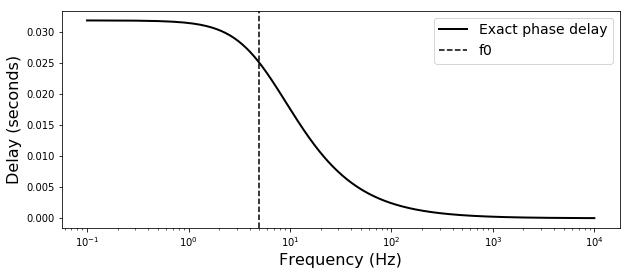

In [22]:
import numpy as np
import matplotlib.pyplot as plt

f0 = 5.

def phase_delay( f ):
    return np.arctan( f / f0 ) / (2*np.pi*f)

f_display = np.arange( 0.1, 10000, 0.1 )

plt.figure( figsize = (10, 4) )

# Exact
delay_exact = phase_delay( f_display )
plt.semilogx( f_display, delay_exact, 'k-', label = 'Exact phase delay',
              linewidth = 2 )

yl = plt.ylim()
plt.semilogx( np.array( [f0, f0] ), yl, 'k--', label = 'f0' )

plt.ylabel( 'Delay (seconds)', fontsize = 16 )
plt.xlabel( 'Frequency (Hz)', fontsize = 16 )

plt.ylim( -25, 20 )
plt.ylim( yl )

plt.legend( fontsize = 14 )

plt.show()

Interesting! It looks like for low-frequency inputs—in the region that is being *passed* by the filter, below the cutoff frequency (dotted line), there is a sizeable phase delay (about 30 milliseconds) induced on the output. Depending on the application, this may be too large of a delay to be acceptable, and we may have to find another filter with similar specifications that has a tighter phase delay.

<a id="am"></a>
***

### Amplitude modulation

Your phone, your computer—every device you have sends and receives data over the air *via* radio waves, invisible bolts of light that permeate every cubic centimeter of the world around us. Indeed, every piece of data transmitted to and from every mobile device in your neighborhood passes right through your brain without you noticing it, like a superposition of a million tiny ghosts.

How, then, does your phone, or your computer, separate out the information that was meant for *it*, versus the information that was meant for someone else's device? After all, if there was some signal $x$ recorded in from the world by an antenna on your device, it surely would be *contaminated* with noise from all of those other signals flying through the air. How do we avoid this from happening—how do we ensure that everyone receives exactly the information they want from that soup flooding the air?

The general answer to this problem is to **modulate** the signals in some way, to form a new signal that is easier to superpose with other modulated signals; when this combined signal reaches its target endpoint, the receiver can then *demodulate* the particular signal in this superposition that the user is interested in.

There are many different schemes of modulation that are used in various applications. However, the premise is illustrated well with a scheme called **amplitude modulation** (AM), which has been used successfully in radio applications for [over a century](https://www.wshu.org/post/vintage-radio-life-decline-and-possible-rebirth-am#stream/0). The basic premise is that a signal $x$—the *content* that we would like to send from point $A$ to point $B$—is encoded as a *single sinusoid* at a known, *very high* carrier frequency $f_c$. Before doing this encoding, we note that our **carrier signal** $c$ is given (in continuous time) by

$$ c(t) = \sin(2\pi\,f_c\,t) $$

where the normalization constant $2\pi$ ensures that our frequency units for $f_c$ are in $\textrm{Hz} = \frac{1}{\textrm{s}}$.

Now, how are we going to use this carrier signal to encode the signal $x$ we'd like to transmit? In this modulation scheme, what we're going to do is use $x$ to modulate the *amplitude* of $c$; that is, we're going to determine a signal $A(t)$ that we can use to scale $c(t)$ to form the *transmitted signal*

$$ y(t) = A(t)\,c(t) $$

We say in this case that $c$ is **modulated by** $A$. (This may be more new vocabulary, but do not be swayed: although there are many schemes of modulating signals in order to cram multiple distinct signals into one, in general we say that a signal $x_1$ *modulates another signal* $x_2$ when we are looking at their *pointwise multiplication* $x_1\,x_2$.)

So what's the best way to determine this modulating signal $A$ from $x$? The trick is to avoid $A$ becoming *negative*; if tihs occurs, we will not be able to accurately decode $x$ because of the reversal of the underlying carrier wave $c$! Hence, if $x$ is *bounded* by some constant $B$, then a reasonable choice is to take

$$ A(t) = 1 + \frac{x(t)}{B} $$

This bounds $A$ between $0$ and $2$, which is perfectly suitable for our purposes. Let's see a concrete example of what this looks like:

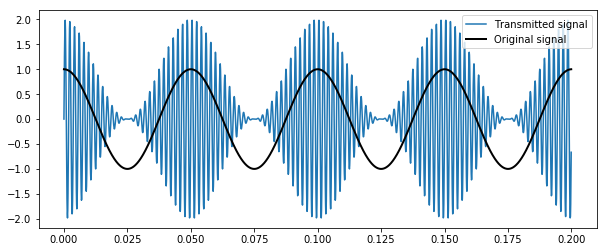

In [59]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange( 0.0, 0.2, 0.0001 ) # s

## Carrier wave
f_c = 540.0 # Hz
c = np.sin( 2. * np.pi * f_c * t )

## Desired signal to transmit
f_x = 20. # Hz
x = np.cos( 2. * np.pi * f_x * t )

B = 1.
A = 1 + (1. / B) * x

## Transmitted signal
y = np.multiply( A, c )

plt.figure( figsize = (10, 4) )
plt.plot( t, y, label = 'Transmitted signal' )
plt.plot( t, x, 'k-', linewidth = 2, label = 'Original signal' )
plt.legend()
plt.show()

(This example gives an idea of how much higher the carrier frequency is from the actual underlying signal in practice. Here, we've let the modulating signal be a sinusoid at 20 Hz, and the carrier signal a sinusoid at 540 Hz; if we were to take these numbers up three orders of magnitude, we would arrive instead at the average human perceptual limit for sound \[20 kHz\] and the lowest carrier frequency for the AM radio standard \[540 kHz\], respectively. This should give an idea, then, of the *lower limit* of the number of carrier cycles within one cycle of a transmitted signal in a practical application; indeed, all transmitted sound is *lower* than 20 kHz.)

The question now arises: does this type of setup have a correlate in the *transform* domain? And, as it happens, it does! Stepping back from our AM example, let's examine the general case of one signal $x_1$ modulating another signal $x_2$, say

$$ y(t) = x_1(t)\,x_2(t) $$

What is the Laplace transform of this signal? Well, lacking other insights, let's go to the definition:

$$ \mathcal{L}(y) = \int_{-\infty}^\infty x_1(t)\,x_2(t)\,\mathrm{e}^{-s\,t}\,\mathrm{d}t $$

(Show that this equals $\ldots$)

<a id="group_delay"></a>
***

### Group delay

**TODO: Write**

<a id="242"></a>
***

## 2.4.2. Discrete signals

$\ldots$

<a id="sampling"></a>
***

### Sampling

We've done a lot of work looking at the behavior of the Fourier transforms of *continuous* signals; however, up to this point, we have less machinery to deal with *discrete* signals.

How do discrete signals arise in life? Sometimes they are created *de novo*; for example, a computer program you execute might create a discrete signal as an output. Others are created by a process of **sampling** values from an underlying continuous signal. Take, for example, an audio recording. Although the file that you have on your computer is a discrete signal, the data that were the genesis of that file did not start out that way. Originally, a microphone occupied a point of space, and experienced *continuous* fluctuations over time in the ambient pressure at a transducer—$x_c(t)$—as sound passed through the microphone. However, at a certain point, that signal was carried to a *analog-to-digital converter* (ADC), in order to transform it into a form a digital circuit (and computer!) can deal with—namely, a discrete signal.

Here's one way that the ADC could have gone through this process. Suppose that the ADC assigned each successive *discrete* data point—$x_d(n)$—to the value of $x_c$ after $T$ seconds had elapsed; that is, every $T$ seconds (the *period* of the ADC), a new value was appended to the signal. Then we can write our discrete data $x_d$ as a function of our original pressure wave $x_c$,

$$ x_d(n) = x_c(nT) $$

However, we can also consider an equivalent *continuous* signal to $x_d$ in the following way. In the last section, we envisioned a discrete signal as being composed of individual scaled and shifted *discrete* impulses; in a similar way, we might consider what happens when we form a *continuous* signal $x_s$ by scaling and shifting *continuous* impulses corresponding to those in the discretized signal $x_d$. This takes the form of

$$ x_{sc}(t) = \sum_{n=-\infty}^\infty x(nT)\,\delta(t - nT) = \sum_{n=-\infty}^\infty x_d(n)\,\delta(t - nT) $$

This is the **sampled continuous form** of $x_c$. This is very similar to our findings in the last section, when we wrote out signals as a sum of scaled and shifted impulses; here, we are using the *discrete* signal $x_d$ to provide the *scaling*, and using *continuous $\delta$s* to form the shifted impulses, resulting in a continuous signal.

Let's take a look at what the sampling process looks like:

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/patches.py:75: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties.
  warnings.warn("Setting the 'color' property will override"


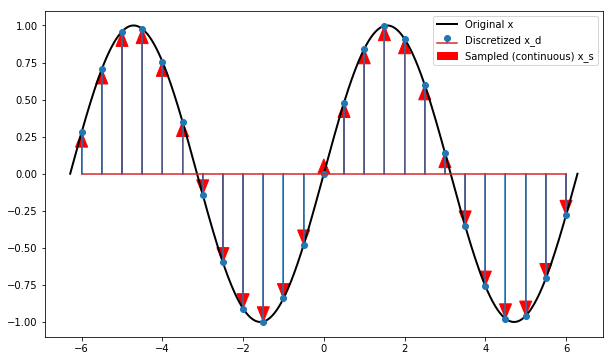

In [23]:
import numpy as np
import matplotlib.pyplot as plt

t_all = np.arange( -2*np.pi, 2*np.pi, 0.001 )
x = np.sin( t_all )

plt.figure( figsize = (10, 6) )

h_plot, = plt.plot( t_all, x, 'k-', linewidth = 2, label = 'Original x' )

T = 0.5
n_all = np.arange( np.ceil( t_all[0] / T ), np.floor( t_all[-1] / T ) + 1 )
x_d = np.sin( n_all * T )

h_stem = plt.stem( n_all * T, x_d, label = 'Discretized x_d' )

for i, n in enumerate( n_all ):
    h_arrow = plt.arrow( n * T, 0, 0, x_d[i] - np.sign( x_d[i] ) * 0.1,
                           head_width = 0.3,
                           head_length = 0.1,
                           edgecolor = 'r', 
                           color = 'r' )

plt.legend( [h_plot, h_stem, h_arrow],
            ['Original x', 'Discretized x_d', 'Sampled (continuous) x_s'],
            loc = 'upper right')
    
plt.show()

This approach is also known as the **Dirac comb**, as we leverage a sequence of evenly spaced impulses (also called *Dirac deltas*) that looks like a comb.

<a id="sampling_transform"></a>
***

### Sampling in the transform domain

As we've seen with many different aspects of systems above, the process of *sampling* a continuous signal has an correlate in the transform domain.

Recall our definitions of the $z$ and Laplace transforms for discrete and continuous signals, respectively:

$$
\begin{eqnarray*}
    \mathcal{Z}(x) & = & \sum_{k=-\infty}^\infty x(k)\,z^{-k} \\
    \mathcal{L}(x) & = & \int_{-\infty}^\infty x(t)\,\mathrm{e}^{-st}\,\mathrm{d}t
\end{eqnarray*}
$$

In the section above, we noted that in the case where a continuous signal $x_c$ is sampled with sampling period $T$ to form the discrete signal $x_d$, we can make the identification

$$ x_d(n) = x_c(nT) $$

Thus, we can write the $z$-transform of the sampled discrete signal $x_d$ as

$$ \mathcal{Z}(x_d) = \sum_{k=-\infty}^\infty x_c(kT)\,z^{-k} $$

At the same time, we also have our *sampled continuous* representation of $x_c$, given by using the *Dirac comb* approach:

$$ x_{sc}(t) = \sum_{k=-\infty}^\infty x_d(k)\,\delta(t - kT) $$

From this, we can write the *Laplace transform* of the sampled continuous signal $x_sc$:

$$
\begin{eqnarray*}
    \mathcal{L}(x_{sc}) & = & \int_{-\infty}^\infty \sum_{k=-\infty}^\infty x_d(k)\,\delta(t - kT)\,\mathrm{e}^{-st}\,\mathrm{d}t \\
     & = & \sum_{k=-\infty}^\infty x_d(k)\,\mathrm{e}^{-skT} \\
     & = & \sum_{k=-\infty}^\infty x_c(kT)\,\left(\mathrm{e}^{sT}\right)^{-k}
\end{eqnarray*}
$$

Note how similar these forms are! The only real difference between them is the identification

$$ \boxed{z = \mathrm{e}^{sT}} $$

In fact, we can directly relate the $z$-transform of the discretized system by taking the limit of the transform multiplied by the width of the time bin $\Delta t = (n+1)\,T - nT = T$ as the **sampling period $T$ approaches $0$**:

$$
\begin{eqnarray*}
    \lim_{T\to 0} \mathcal{Z}(x_d)\,T\Big\rvert_{z=\mathrm{e}^{sT}} & = & \lim_{T\to 0} \sum_{k=-\infty}^\infty x_c(kT)\,\mathrm{e}^{-skT}\,T \\
    & = & \int_{-\infty}^\infty x_c(t)\,\mathrm{e}^{-st}\,\mathrm{d}t \quad (\ast) \\
    & = & \mathcal{L}(x_c)
\end{eqnarray*}
$$

where in (\*) we note that $kT \to t$ the continuous input coordinate, and have also leveraged the [definition of the Riemann integral](https://mathworld.wolfram.com/RiemannIntegral.html) as the limit of a Riemann sum as the partition size ($T$) goes to zero.

So we see that, in the limit as $T \to 0$, we have a direct correspondence between the Laplace and $z$ transforms; and, for a particular value of $T$, we can pass from the $s$ plane to the $z$ plane by using the transformation above, $z = \mathrm{e}^{sT}$.

We can animate this transition between the Laplace transform and the $z$ transform to show what happens to the frequency axis $s = \mathrm{i}\omega$:

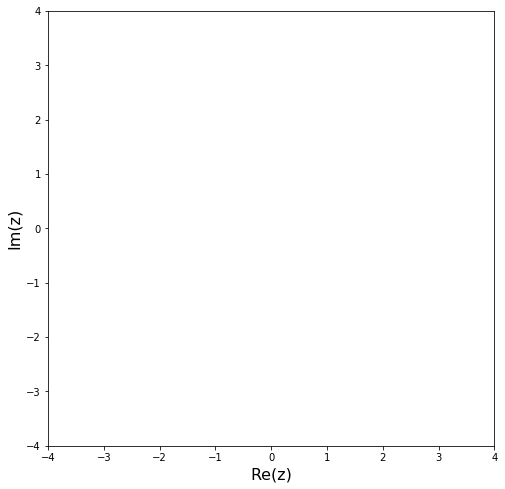

In [24]:
import numpy
import numpy as np
import cplot
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

T = 1.

def H1(s):
    return s

def H2(s):
    return np.exp( s * T )

def H(s, t):
    return (1-t) * H1(s) + t * H2(s)

fig = plt.figure( figsize = (8, 8) )
ax = plt.axes( xlim = (-4, 4), ylim = (-4, 4) )

ax.set_xlabel( 'Re(z)', fontsize = 16 )
ax.set_ylabel( 'Im(z)', fontsize = 16 )

omega_range = 30

omega = np.arange( -omega_range, omega_range, 0.01 )
t = 0.8
x = np.real( H(1.j * omega, t) )
y = np.imag( H(1.j * omega, t) )

line, = ax.plot( x, y, 'k-', linewidth = 3 )
line_in, = ax.plot( x, y, 'b-', linewidth = 2 )
line_out, = ax.plot( x, y, 'r-', linewidth = 2 )

def init():
    line.set_data( [], [] )
    line_in.set_data( [], [] )
    line_out.set_data( [], [] )
    return line, line_in, line_out
    
n_frames = 250
n_frames_anim = 200
    
def animate( i ):
    t = i / n_frames_anim
    if t > 1.:
        t = 1.
    omega = np.arange( -omega_range, omega_range, 0.01 )
    x = np.real( H(1.j * omega, t) )
    y = np.imag( H(1.j * omega, t) )
    line.set_data( x, y )
    x = np.real( H(1.j * omega - 1, t) )
    y = np.imag( H(1.j * omega - 1, t) )
    line_in.set_data( x, y )
    x = np.real( H(1.j * omega + 1, t) )
    y = np.imag( H(1.j * omega + 1, t) )
    line_out.set_data( x, y )
    return line, line_in, line_out
    
anim = FuncAnimation( fig, animate, init_func = init,
                      frames = n_frames,
                      interval = 40,
                      blit = True )

<a id="figure_sampling_transform"></a>

In [25]:
from IPython.display import HTML
HTML( anim.to_html5_video() )

So we see that the continuous frequency axis is "wrapped around" the unit circle an infinite number of times by the action of the sampling transformation! Notice that this means that an infinite number of continuous sinusoidal frequencies are mapped to the same discrete sinusoidal frequency; indeed, we note that

$$ z = \mathrm{e}^{sT} = \mathrm{e}^{sT + \mathrm{i}2\pi k} $$

for any integer $k$; thus, there is a whole collection of continuous frequencies indexed by the integers that correspond to the same discrete frequency! This in general makes it difficult to map in the opposite direction, from discrete to continuous, because the inverse relationship,

$$ s = \frac{1}{T} \ln z $$

has [no unique solution in the complex case](https://en.wikipedia.org/wiki/Complex_logarithm#Problems_with_inverting_the_complex_exponential_function).

Notice also that this function maps the **left half of the $s$ plane to the inside of the unit circle**, and the **right half of the $s$ plane to the outside of the unit circle** in the $z$-plane, as shown by the blue and red lines in the animation above. This is important given our discussions previously about stability of systems: indeed, the criteria for continuous stability (poles in the left half plane) and discrete stability (poles inside the unit circle) are seen, through the lens of this transformation between systems, to be in a sense *equivalent*!

<a id="example_pole_matching"></a>
***

#### **Example**: Pole-matched first-order lowpass filter

Consider our lowpass fliter from earlier, with impulse response

$$ h(t) = 2\pi f_0\mathrm{e}^{-2\pi f_0 t} $$

As we saw, this system has a transfer function given as

$$ H(s) = \frac{2\pi f_0}{s + 2\pi f_0} $$

What if we wanted to implement this same filter, but on a *digital* chip rather than using analog electronics? Let's suppose that our discrete system takes the same data that the old analog filter was using, and discretizes it at a period $T$. From above, we know that we have a general relationship between the $z$ and $s$ planes given by

$$ z = \mathrm{e}^{sT} $$

One technique we can use to map from our continuous system to a new discrete system is to **match the poles and zeros** between the two functions using this formula. For example, in the case of this lowpass filter, we have one pole at $s_p = -2\pi f_0$, and one zero as $s \to \infty$. Hence, one would suppose that an equivalent *discrete* system would have a pole at

$$ z_p = \mathrm{e}^{s_p T} = \mathrm{e}^{-2\pi f_0 T} $$

Note that the stability of the system is preserved, because the new discrete pole is in the interior of the unit circle. If we were to form a new $z$-transform for our desired discrete system based on the available data, we would form something like

$$ H_d(z) = \frac{2\pi f_0}{1 - \mathrm{e}^{-2\pi f_0 T}\,z^{-1}} $$

where the $2\pi f_0$ in the numerator comes from the original scale factor in the continuous system, and the pole in the denominator is what we just determined is the equivalent pole to the continuous system.

Let's compare these two transforms to see how one maps into the other:

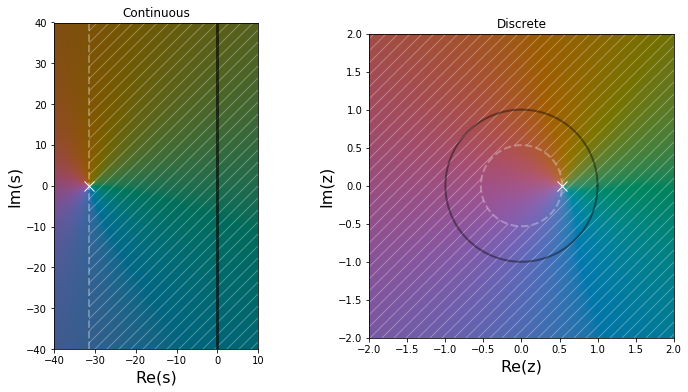

In [26]:
import cplot
import numpy
import numpy as np
from functools import reduce

f0 = 5.
T = 0.02

continuous_z0 = np.array( [
] )
continuous_zp = np.array( [
    -2 * np.pi * f0
] )

discrete_z0 = np.array( [np.exp( s * T ) for s in continuous_z0] )
discrete_zp = np.array( [np.exp( s * T ) for s in continuous_zp] )

def H_continuous(s):
    num = reduce( lambda x, y: x * y, [s - x for x in continuous_z0], 1. )
    den = reduce( lambda x, y: x * y, [s - x for x in continuous_zp], 1. )
    return num / den

def H_discrete(s):
    num = reduce( lambda x, y: x * y, [s - x for x in discrete_z0], 1. )
    den = reduce( lambda x, y: x * y, [s - x for x in discrete_zp], 1. )
    return num / den

fig, axs = plt.subplots( 1, 2, figsize = (12, 6) )

# Continuous

plt.sca( axs[0] )

axs[0].set_xlabel( 'Re(s)', fontsize = 16 )
axs[0].set_ylabel( 'Im(s)', fontsize = 16 )

cplot.plot( H_continuous, -40, 10, -40, 40, 1000, 1000, alpha = 0.1 )

yl = axs[0].get_ylim()
axs[0].plot( np.array( [0, 0] ), yl, 'k-', linewidth = 3, alpha = 0.6 )

for cur_zero in z0:
    axs[0].plot( np.real( cur_zero ), np.imag( cur_zero ), 'wo',
              fillstyle = 'none',
              markersize = 10 )
for cur_pole in zp:
    axs[0].plot( np.real( cur_pole ), np.imag( cur_pole ), 'wx',
              fillstyle = 'none',
              markersize = 10 )

x_roc = np.array( [-2*np.pi*f0, -2*np.pi*f0, 40, 40] )
y_roc = np.array( [-40, 40, 40, -40] )

axs[0].plot( x_roc[:2], y_roc[:2], 'w--', linewidth = 2., alpha = 0.3 )
axs[0].fill( x_roc, y_roc,
          facecolor = 'none',
          edgecolor = 'w',
          alpha = 0.3,
          linewidth = 0.0,
          hatch = '//' )

axs[0].set_ylim( yl )
axs[0].set_xlim( -40, 10 )

axs[0].set_title( 'Continuous' )

# Discrete

plt.sca( axs[1] )

axs[1].set_xlabel( 'Re(z)', fontsize = 16 )
axs[1].set_ylabel( 'Im(z)', fontsize = 16 )

cplot.plot( H_discrete, -2, 2, -2, 2, 1000, 1000, alpha = 0.1 )

omega = np.linspace( 0, 2 * np.pi, 1000 )
x_unit = np.cos( omega )
y_unit = np.sin( omega )
axs[1].plot( x_unit, y_unit, 'k-', linewidth = 2, alpha = 0.4 )

for cur_zero in discrete_z0:
    axs[1].plot( np.real( cur_zero ), np.imag( cur_zero ), 'wo',
              fillstyle = 'none',
              markersize = 10 )
for cur_pole in discrete_zp:
    axs[1].plot( np.real( cur_pole ), np.imag( cur_pole ), 'wx',
              fillstyle = 'none',
              markersize = 10 )
    
r = np.abs( discrete_zp[0] )
n, radii = 50, [r, 4.]
x_bd = r * np.cos( omega )
y_bd = r * np.sin( omega )
axs[1].plot( x_bd, y_bd, 'w--', linewidth = 2, alpha = 0.3 )

theta = np.linspace(0, 2*np.pi, 1000, endpoint=True)
x_roc = np.outer(radii, np.cos(theta))
y_roc = np.outer(radii, np.sin(theta))
x_roc[1,:] = x_roc[1,::-1]
y_roc[1,:] = y_roc[1,::-1]

axs[1].fill( np.ravel( x_roc ), np.ravel( y_roc ),
          facecolor = 'none',
          edgecolor = 'w',
          alpha = 0.3,
          linewidth = 0.0,
          hatch = '//' )

axs[1].set_xlim( -2, 2 )
axs[1].set_ylim( -2, 2)

axs[1].set_title( 'Discrete' )

plt.show()

If we were to invert the $z$-transform above using a [$z$-transform table](https://en.wikipedia.org/wiki/Z-transform#Table_of_common_Z-transform_pairs), we would see that this corresponds to an impulse response of

$$ h_d(n) = 2\pi f_0\,\left(\mathrm{e}^{-2\pi f_0 T}\right)^n\,\theta(n) $$

Let's compare the original continuous impulse response $h$ with the new discretized version $h_d$:

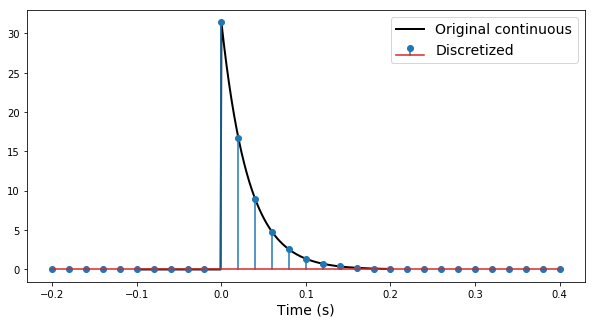

In [27]:
import numpy as np
import matplotlib.pyplot as plt

f0 = 5.
T = 0.02

t_plot = np.arange( -0.1, 0.2, 0.001 )
h = np.zeros( t_plot.shape )
h[t_plot >= 0] = 2 * np.pi * f0 * np.exp( -2 * np.pi * f0 * t_plot[t_plot >= 0.] )

n_plot = np.arange( -10, 21 )
hd = np.zeros( n_plot.shape )
k = np.exp( -2 * np.pi * f0 * T )
hd[n_plot >= 0] = 2 * np.pi * f0 * np.power( k, n_plot[n_plot >= 0] )

plt.figure( figsize = (10, 5) )

plt.plot( t_plot, h, 'k-', linewidth = 2, label = 'Original continuous' )
plt.stem( n_plot * T, hd, label = 'Discretized' )

plt.xlabel( 'Time (s)', fontsize = 14 )

plt.legend( fontsize = 14 )
plt.show()

The two match up beautifully!

<a id="dtft"></a>
***

### Discrete-time Fourier transform

Above we showed that, to any discrete signal $x_d(n)$, we can form the *sampled continuous* signal $x_{sc}(t)$ using the *Dirac comb* approach:

$$ x_{sc}(t) = \sum_{n=-\infty}^\infty x_d(n)\,\delta(t - nT) $$

Given this, there's nothing stopping us from taking the *Fourier transform* of this sampled signal $x_s$!

$$
\begin{eqnarray*}
    \mathcal{F}(x_{sc}) = X_{sc}(\mathrm{i}2\pi f) & = & \int_{-\infty}^\infty x_s(t)\,\mathrm{e}^{-\mathrm{i}2\pi ft}\,\mathrm{d}t \\
     & = & \int_{-\infty}^\infty \sum_{n=-\infty}^\infty x_d(n)\,\delta(t - nT)\,\mathrm{e}^{-\mathrm{i}2\pi ft}\,\mathrm{d}t \\
     & = & \sum_{n=-\infty}^\infty x_d(n) \int_{-\infty}^\infty \delta(t - nT)\,\mathrm{e}^{-\mathrm{i}2\pi ft}\,\mathrm{d}t \quad (\ast) \\
     & = & \sum_{n=-\infty}^\infty x_d(n)\,\mathrm{e}^{-\mathrm{i}2\pi fnT} \\
     & = & \sum_{n=-\infty}^\infty x_d(n)\,\mathrm{e}^{-\mathrm{i}\omega n}
\end{eqnarray*}
$$

where (\*) follows by noting that $x_d(n)$ does not depend on $t$, and taking advantage of the fact that we can interchange integration and summation with appropriate convergence conditions. We here have let

$$
\begin{eqnarray*}
    \omega & = & 2\pi fT \\
    \left[\frac{\textrm{rad}}{\textrm{sample}}\right] & = & [\textrm{rad}]\,\left[\frac{1}{\textrm{sec}}\right]\,\left[\frac{\textrm{sec}}{\textrm{sample}}\right]
\end{eqnarray*}
$$

denote the *sample-based angular frequency*, in radians per sample, which is used by convention for discrete signals.

Now, this is interesting, once again! This form of the Fourier transform of the sampled continuous signal $x_{sc}$ looks almost identical to the $z$-transform of the discrete signal $x_d$:

$$ \mathcal{Z}(x_d) = \sum_{n=-\infty}^\infty x_d(n)\,z^{-n} $$

but replacing $z$ with $\mathrm{e}^{\mathrm{i}\omega}$—that is, the $z$-transform **evaluated on the unit circle**. We can generalize this construction to *any* discrete signal, by simply substituting the unit circle for $z$ in the $z$-transform; in general, we denote this special case of the $z$-transform the **discrete-time Fourier transform (DTFT)** of a discrete signal $x$, and by analogy with the continuous Fourier transform and the Laplace transform, we use the notation

$$ \mathcal{F}(x) = X(\mathrm{e}^{\mathrm{i}\omega}) $$

to indicate that the DTFT is the $z$-transform evaluated on the unit circle $z = \mathrm{e}^{\mathrm{i}\omega}$.

Notice here an interesting parallel with the Fourier series: in the case of the Fourier series, we dealt with a *periodic signal*, which led to a *discrete frequency representation* (Fourier series). In this case, we are now dealing with a *discrete signal*; however, the Fourier transform of that discrete signal now lives on the *unit circle*, meaning that the frequency representation is **periodic**! What a curious relationship there seems to be between discretization and periodicity!

<a id="example_z_fourier"></a>
***

#### **Example**: $z$ and Fourier

Let's return to a familiar example from the $z$-transform section,

$$ x(n) = r^n\,\cos\left(\frac{n}{4}\right)\,\theta(n),\quad r = \frac{19}{20} $$

Note that this is actually a very similar function to what we investigated above, for the continuous Fourier transform: it has a sinusoidal component, $\cos(n/4)$, as well as an exponential decay component, $(19/20)^n$. First, let's remind ourselves of what this looks like in the $z$-domain; from our discussion above, the $z$-transform of this signal is

$$ X(z) = \frac{z\,\left(z-r\left(\frac{\mathrm{e}^{\mathrm{i}/4}+\mathrm{e}^{-\mathrm{i}/4}}{2}\right)\right)}{(z-r\,\mathrm{e}^{\mathrm{i}/4})\,(z-r\,\mathrm{e}^{-\mathrm{i}/4})} $$

with an ROC of $|z| > r = 19/20$. (This makes sense, as the two poles of the system—at $\mathrm{e}^{\pm\mathrm{i}/4}$—are at radius $r$; therefore, for $x$ to be causal, the ROC must be the region lying beyond this point!)

Let's take a second look at what this signal is like visually:

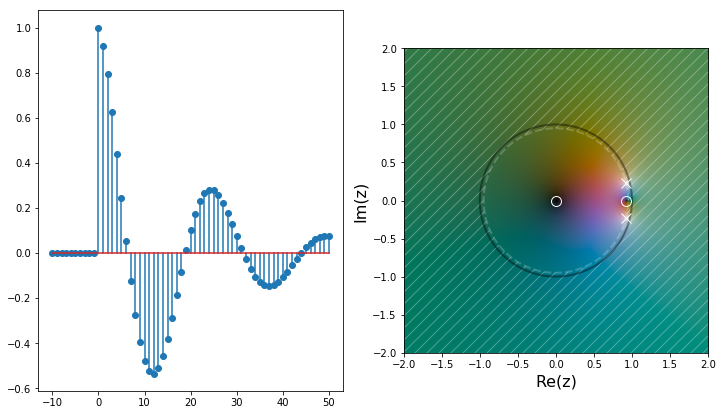

In [28]:
import cplot
import numpy
import numpy as np
import matplotlib.pyplot as plt

r = 19./20

z0 = np.array( [
    0.,
    (r / 2.) * (np.exp(1.j/4) + np.exp(-1.j/4))
] )
zp = np.array( [
    r * np.exp(1.j/4),
    r * np.exp(-1.j/4),
] )

def H(z):
    num = z * (z - (r/2.) * (np.exp(1.j/4) + np.exp(-1.j/4)))
    den = (z - r * np.exp(1.j/4)) * (z - r * np.exp(-1.j/4))
    return num / den

fig, axs = plt.subplots( 1, 2, figsize = (12, 7) )

## 

n_all = np.arange( -10, 51 )
h = np.zeros( n_all.shape )
h[n_all >= 0] = np.power( r, n_all[n_all >= 0] ) * np.cos( n_all[n_all >= 0] / 4. )

axs[0].stem( n_all, h )

##

axs[1].set_xlabel( 'Re(z)', fontsize = 16 )
axs[1].set_ylabel( 'Im(z)', fontsize = 16 )

cplot.plot( H, -2, +2, -2, +2, 1000, 1000, alpha = 0.6 )

# Plot unit circle
omega = np.linspace( 0, 2 * np.pi, 1000 )
x_unit = np.cos( omega )
y_unit = np.sin( omega )

axs[1].plot( x_unit, y_unit, 'k-', linewidth = 2, alpha = 0.4 )

for cur_zero in z0:
    axs[1].plot( np.real( cur_zero ), np.imag( cur_zero ), 'wo',
              fillstyle = 'none',
              markersize = 10 )
for cur_pole in zp:
    axs[1].plot( np.real( cur_pole ), np.imag( cur_pole ), 'wx',
              fillstyle = 'none',
              markersize = 10 )
    
n, radii = 50, [r, 4.]
x_bd = r * np.cos( omega )
y_bd = r * np.sin( omega )
axs[1].plot( x_bd, y_bd, 'w--', linewidth = 2, alpha = 0.2 )

theta = np.linspace(0, 2*np.pi, 1000, endpoint=True)
x_roc = np.outer(radii, np.cos(theta))
y_roc = np.outer(radii, np.sin(theta))
x_roc[1,:] = x_roc[1,::-1]
y_roc[1,:] = y_roc[1,::-1]

axs[1].fill( np.ravel( x_roc ), np.ravel( y_roc ),
          facecolor = 'none',
          edgecolor = 'w',
          alpha = 0.3,
          linewidth = 0.0,
          hatch = '//' )

axs[1].set_xlim( -2, 2 )
axs[1].set_ylim( -2, 2 )

plt.show()

Now, let's see if we can evaluate the *discrete-time Fourier transform* of this signal. As we've seen, this is precisely the $z$-transform evaluated on the *unit circle*, $z = \mathrm{e}^{\mathrm{i}\omega}$:

$$ X(\mathrm{e}^{\mathrm{i}\omega}) = \frac{\mathrm{e}^{\mathrm{i}\omega}\,\left(\mathrm{e}^{\mathrm{i}\omega}-r\left(\frac{\mathrm{e}^{\mathrm{i}/4}+\mathrm{e}^{-\mathrm{i}/4}}{2}\right)\right)}{(\mathrm{e}^{\mathrm{i}\omega}-r\,\mathrm{e}^{\mathrm{i}/4})\,(\mathrm{e}^{\mathrm{i}\omega}-r\,\mathrm{e}^{-\mathrm{i}/4})} $$

Not the prettiest thing in the world, but that certainly won't stop us from evaluating it numerically! First—recalling that the Fourier transform is *complex-valued*—we'll take a look at the transform in *cartesian coordinates*, real and imaginary:

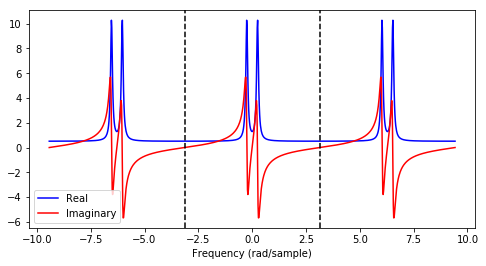

In [29]:
def H_fourier( omega ):
    return H( np.exp( 1j * omega ))

omega_plot = np.linspace( -3*np.pi, 3*np.pi, 1000 )

fourier_complex = np.array( [H_fourier(omega) for omega in omega_plot] )
fourier_real = np.real( fourier_complex )
fourier_imag = np.imag( fourier_complex )

plt.figure( figsize = (8, 4))
plt.plot( omega_plot, fourier_real, 'b-', label = 'Real' )
plt.plot( omega_plot, fourier_imag, 'r-', label = 'Imaginary' )

yl = plt.ylim()
plt.plot( np.array( [-np.pi, -np.pi] ), yl, 'k--' )
plt.plot( np.array( [np.pi, np.pi] ), yl, 'k--' )
plt.ylim( yl )

plt.legend()
plt.xlabel( 'Frequency (rad/sample)' )
plt.show()

Here we have intentionally evaluated the DTFT beyond one period in order to emphasize its periodicity: notice that as we progress further out, we start repeating the same values between the dashed line ($-\pi$ to $\pi$). We can imagine this by placing the values we see in the *linear* plot above *onto the unit circle*: as we move to the right from the origin, the values we see in the trace above are mapped to the *upper half* of the unit circle in the complex plane, starting from $z = 1$ on the right side of the circle and moving counterclockwise. Once we pass the dotted line on the right ($\omega = \pi$), we have gone all the way around the top half of the circle, and have crossed over into the bottom half of the unit circle. However, this is not the only way for us to get to the bottom half of the circle! Indeed, we could have started going to the left from the origin in the plot above—which in the complex plane corresponds to moving *clockwise* from $z = 1$ at the right side of the unit circle.

As we did with the continuous Fourier transform, we can also visualize the DTFT in *polar coordinates*—amplitude and phase—as follows, zooming in on one period for clarity:

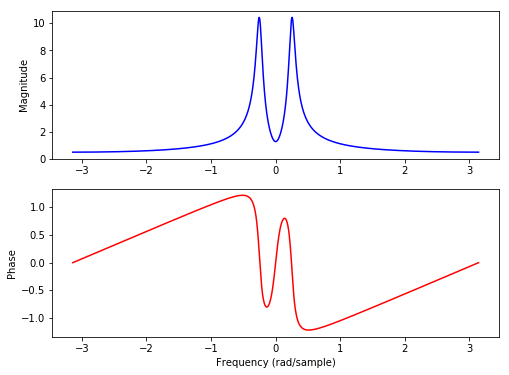

In [30]:
def H_fourier( omega ):
    return H( np.exp( 1.j * omega ) )

omega_plot = np.linspace( -np.pi, np.pi, 1000 )

fourier_complex = np.array( [H_fourier(omega) for omega in omega_plot] )
fourier_abs = np.abs( fourier_complex )
fourier_angle = np.angle( fourier_complex )

fig, axs = plt.subplots( 2, 1, figsize = (8, 6) )
axs[0].plot( omega_plot, fourier_abs, 'b-', label = 'Real' )
axs[0].set_ylabel( 'Magnitude' )
axs[1].plot( omega_plot, fourier_angle, 'r-', label = 'Imaginary' )
axs[1].set_ylabel( 'Phase' )
axs[1].set_xlabel( 'Frequency (rad/sample)' )
plt.show()

Notice here that, as with the continuous example from above, we see a distinct pattern of peaks at $\omega = \pm 1/4$—corresponding exactly to the oscillatory component, $\cos(n/4)$, in the original signal! We also see once again the presence of phase distortion (nonlinearity in the phase plot).

<a id="fourier_existence"></a>
***
### Existence of the Fourier transform

$\ldots$

<a id="discrete_periodic"></a>
***

### Discreteness and periodicity

We started off our discussion of the Fourier transform by looking at *Fourier series*. We made two critical assumptions about signal before performing *Fourier analysis* on it: first, that it was *continuous*, and second, that it was *periodic*. When we came back with the coefficients of the Fourier series for such a signal, we discovered that, while they are *not necessarily periodic*—indeed, as we saw, they appear to *decay* as the series progresses—the coefficients are *discrete*, being a sequence $c_k$ related to discrete harmonics $k/T$, rather than a continuous function of frequency $c(f)$.

By contrast, when we dropped the *periodicity* constraint on our input and looked at the *continuous Fourier transform*, we discovered a very different output: a transform $X(\mathrm{i}2\pi f)$ that is a function of a *continuous* frequency variable $f$. And now, in the section above, we looked at the case of a *discrete* but *aperiodic* input signal; here, we found that the corresponding transform, the DTFT, lives on the *unit circle*—that is, that the DTFT $X(\mathrm{e}^{\mathrm{i}\omega})$ is periodic in frequency $\omega$!

From these examples, we see a general principle emerge: **periodicity in one domain corresponds to discretization in the corresponding transform domain, and *vice versa***.

The reason for this is a [deep property of topological spaces](https://en.wikipedia.org/wiki/Pontryagin_duality#Bohr_compactification_and_almost-periodicity). That is, the Fourier transform (and the related transforms we have discussed that decompose signals into their frequency content) deals not only with the content of the signals that we present as input, but also with the very *shape of the underlying space itself*!

<a id="figure_fourier_shapes"></a>
***

#### **Figure**: The many shapes of the Fourier transform

$\ldots$

<a id="poisson_summation"></a>
***

### Poisson summation

The DTFT, as it turns out, can be expressed in a much more intriguing form, with the use of a little bit of mathematical machinery.

#### **Theorem** (Poisson summation formula)
> Given a continuous signal $x(t)$, and its fourier transform $X(\mathrm{i}2\pi f)$,
>
> $$ \sum_{k=-\infty}^\infty x(k) = \sum_{k=-\infty}^\infty X(\mathrm{i}2\pi k) $$

##### Proof
Define the function

$$ f^{(T)}(t) = \sum_{k=-\infty}^\infty x(t + kT) $$

which is a sum of copies of $x$ shifted by $T$. This function is periodic with a period of $T$; therefore, it can be expanded as a (complex) Fourier series:

$$ f^{(T)}(t) = \sum_{k=-\infty}^\infty F^{(T)}_k\,\mathrm{e}^{\mathrm{i}2\pi\frac{k}{T} t} $$

The individual coefficients are given by the Fourier series analysis equation:

$$ F^{(T)}_k = \frac{1}{T} \int_0^T f^{(T)}(t)\,\mathrm{e}^{-\mathrm{i}2\pi\frac{k}{T} t}\,\mathrm{d}t $$

We can expand this using the definition of $F$ to find

$$
\begin{eqnarray*}
    F^{(T)}_k & = & \frac{1}{T} \int_0^T \sum_{n=-\infty}^\infty x(t + nT) \, \mathrm{e}^{-\mathrm{i}2\pi \frac{k}{T}t}\,\mathrm{d}t \\
     & = & \frac{1}{T} \sum_{n=-\infty}^\infty \int_0^T x(t + nT)\,\mathrm{e}^{-\mathrm{i}2\pi\frac{k}{T} t}\,\mathrm{d}t \\
\end{eqnarray*}
$$

where the interchange of summation and integration holds when $x$ is sufficiently "nice", as we will assume. We now let $\tau = t + nT$, which allows us to restate our integral as

$$
\begin{eqnarray*}
    F^{(T)}_k & = & \frac{1}{T} \sum_{n=-\infty}^\infty \int_{nP}^{nP + P} x(\tau)\,\mathrm{e}^{-\mathrm{i}2\pi\frac{k}{T}(\tau - nT)}\,\mathrm{d}\tau \\
     & = & \frac{1}{T} \sum_{n=-\infty}^\infty \int_{nP}^{nP + P} x(\tau)\,\mathrm{e}^{-\mathrm{i}2\pi\frac{k}{T}\tau}\mathrm{e}^{\mathrm{i}2\pi kn}\,\mathrm{d}\tau
\end{eqnarray*}
$$

The last factor in the integral is always $1$ for all values of $k$ and $n$; hence, this integral becomes

$$ F^{(T)}_k = \frac{1}{T} \sum_{n=-\infty}^\infty \int_{nP}^{nP + P} x(\tau)\,\mathrm{e}^{-\mathrm{i}2\pi\frac{k}{T}\tau}\,\mathrm{d}\tau $$

Notice that each integral in the sum has a different domain of integration—from $nP$ to $(n+1)P$—and that, across the $n$ in the sum, these intervals actually partition the entire real line. As such, we may combine all of them together into one integral across the line, given by

$$ F^{(T)}_k = \frac{1}{T} \int_{-\infty}^\infty x(\tau)\,\mathrm{e}^{-\mathrm{i}2\pi\frac{k}{T}\tau}\,\mathrm{d}\tau $$

But notice now that this is precisely the Fourier transform of $x$ evaluated at $f = \frac{k}{T}$!

$$ F^{(T)}_k = \frac{1}{T} X\left(\mathrm{i}2\pi \frac{k}{T}\right) $$

Thus, going back to definition of $f$ and its Fourier series, we have that

$$ f^{(T)}(t) = \sum_{k=-\infty}^\infty x(t + kT) = \sum_{k=-\infty}^\infty F^{(T)}_k\,\mathrm{e}^{\mathrm{i}2\pi\frac{k}{T}t} = \sum_{k=-\infty}^\infty \frac{1}{T} X\left(\mathrm{i}2\pi \frac{k}{T}\right)\,\mathrm{e}^{\mathrm{i}2\pi\frac{k}{T} t} $$

If we take the particular case where $T = 1$ and $t = 0$, this equation tells us that

$$ \sum_{k=-\infty}^\infty x(k) = \sum_{k=-\infty}^\infty X(\mathrm{i}2\pi k) $$

as desired. $\blacksquare$

This in and of itself is an intriguing finding! However, it turns out that this formula gives us a great deal of insight into the DTFT!

Say we were to start with the above equation for $f^{(T)}(0)$, which yields

$$ f^{(T)}(0) = \sum_{k=-\infty}^\infty x(kT) = \frac{1}{T} \sum_{k=-\infty}^\infty X\left(\mathrm{i}2\pi\frac{k}{T}\right) $$

If we use the [frequency shifting property](#example_frequency_shift) described above to shift by a frequency $f$, then this becomes

$$ \frac{1}{T} \sum_{k=-\infty}^\infty X\left(\mathrm{i}2\pi\left(\frac{k}{T} + f\right)\right) = \sum_{k=-\infty}^\infty x(kT)\,\mathrm{e}^{-\mathrm{i}2\pi f k T} $$

noting that $kT$ takes the place of the time domain variable $t$ in the sum on the right. But now notice that the right-hand side is precisely the [discrete-time Fourier transform](#dtft) of the discrete sampled signal $x_d(n) = x(nT)$, evaluated at $\omega = 2\pi f T$! The left-hand side therefore gives us a whole new way to picture the DTFT: we see that it is a **periodic summation** of *copies of the continuous Fourier transform $X$*. How are each of these copies shifted? Well, according to the formula, each copy—indexed by $k$—is shifted by $1/T$—which is precisely the **sampling rate $f_s$** of the sampling process!

<a id="example_periodic_summation"></a>
***

#### **Example**: Periodic summation

Take a simple continuous signal, $x(t) = \mathrm{e}^{-at}\theta(t)$, with real $a > 0$. With a little algebra, one finds that the Laplace transform of this signal is given by

$$ X(s) = \frac{1}{s + a} $$

with a corresponding region of convergence of $\mathrm{Re}(s) > -a$. Hence, the signal's Fourier transform is quickly found as

$$ X(\mathrm{i}2\pi f) = \frac{1}{\mathrm{i}2\pi f + a} $$

We can quickly plot the magnitude of this Fourier transform to get an idea of the signal's frequency content:

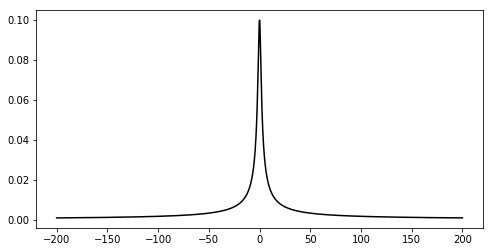

In [31]:
import numpy as np
import matplotlib.pyplot as plt

a = 10.

def H(s):
    return 1. / (s + a)

f_all = np.linspace( -200, 200, 2000 )
H_all = H( 1.j * 2 * np.pi * f_all )

plt.figure( figsize = (8,4) )
plt.plot( f_all, np.abs( H_all ), 'k-' )

Now, let's see what happens when we sample this signal at $50$ Hz, and then look at the DTFT from the perspective of an (approximate) periodic summation. In the figure below, the black line is the magnitude of the approximate periodic summation form of the DTFT, while the green traces are the individual magnitudes of the individual copies of the continuous Fourier transform that contributed. Note that from our discussion above on sampling, the relationship between the $z$ plane and the $s$ plane is given by

$$ z = \mathrm{e}^{sT} $$

Hence, we note that on the Fourier transform frequency axis $s = \mathrm{i}2\pi f$,

$$ f \mapsto \mathrm{e}^{\mathrm{i}2\pi f T} = \mathrm{e}^{\mathrm{i}2\pi \frac{f}{f_s}} $$

where $f_s = 1/T$ is the sampling frequency. Hence, when $f \to f_s/2$, the corresponding value on the unit circle in the $z$-plane has moved all the way across the upper half of the circle to $z = \mathrm{e}^{\mathrm{i}\pi} = -1$; this is indicated by the dotted lines in the figure below. Hence, the data between the dotted lines is one "wrap" around the unit circle for the DTFT.

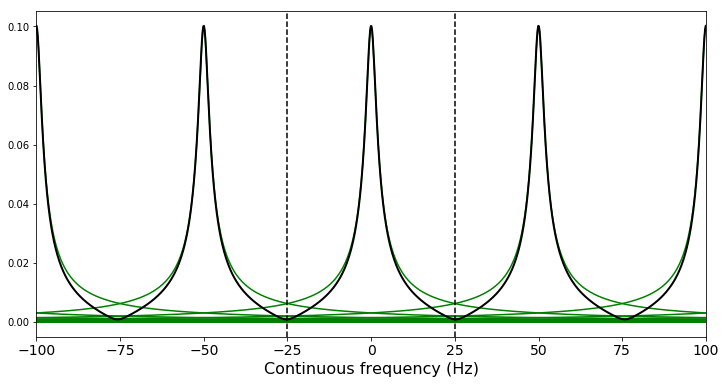

In [32]:
k_all = np.arange( -20, 21 )

fs = 50

plt.figure( figsize = (12, 6) )

H_all_dtft = np.zeros( f_all.shape )
for k in k_all:
    cur_contribution = H( 1.j * 2 * np.pi * (f_all + k * fs) )
    plt.plot( f_all, np.abs( cur_contribution ), 'g-' )
    H_all_dtft = H_all_dtft + cur_contribution

plt.plot( f_all, np.abs( H_all_dtft ), 'k-', linewidth = 2 )

yl = plt.ylim()
plt.plot( -fs/2 * np.array([1, 1]), yl, 'k--' )
plt.plot( fs/2 * np.array([1, 1]), yl, 'k--' )
plt.ylim( yl )

plt.xlim( -100, 100 )
plt.xticks( fontsize = 14 )
plt.xlabel( 'Continuous frequency (Hz)', fontsize = 16 )
plt.show()

Notice that each copy of the original continuous Fourier transform is separated by $1/T = f_s$. Note also that we have actually caused interference here by the periodic summation. The original copy of the Fourier transform has values that extend beyond one cycle of the DTFT's domain (on the unit circle in the $z$-plane), as evidenced by the individual green traces extending over the dotted lines indicating one period of the DTFT; in the periodic sum, these values *add together* causing interference—in this case, the overall magnitude of the DTFT (black) is *decreased* relative to the original, un-wrapped continuous Fourier transform (also known as *destructive interference*). As we will show below, the only way to prevent this effect is to ensure that our signal does not have frequency content above a certain thershold.

<a id="nyquist_shannon"></a>
***

### The Nyquist-Shannon theorem

What's the fastest frequency you can put into a continuous signal? Intuitively, the period of a sinusoidal signal can be made *arbitrarily small*—meaning the frequency can be made *arbitrarily high*—because the signal "lives" on the real line; that is, we can take

$$ x(t) = \cos(2\pi f t)\,\theta(t) $$

and these signals are *distinct* for any two distinct values of $f$, $|f_1| \neq |f_2|$.

On the flip side, we might ask: What's the fastest frequency you can put into a *discrete* signal? And here is where the answer gets a little more compmlicated. Let's take a look at what happens to a discrete sinusoid $x(n) = \cos(\omega n)\,\theta(n)$ as we increase the angular frequency $\omega$. Recall that, from Euler's formula, we can rewrite $x(n)$ as

$$ x(n) = \cos(\omega n)\,\theta(n) = \frac{1}{2}\left(\mathrm{e}^{\mathrm{i}\omega n} + \mathrm{e}^{-\mathrm{i}\omega n}\right)\,\theta(n) $$

The $z$-transform of this signal can be directly computed as

$$
\begin{eqnarray*}
    X(z) & = & \sum_{k=-\infty}^\infty \frac{1}{2}\left(\mathrm{e}^{\mathrm{i}\omega k} + \mathrm{e}^{-\mathrm{i}\omega k}\right)\,\theta(k)\,z^{-k} \\
     & = & \frac{1}{2}\sum_{k=0}^\infty \left(\mathrm{e}^{-\mathrm{i}\omega}z\right)^{-k} + \frac{1}{2}\sum_{k=0}^\infty \left(\mathrm{e}^{\mathrm{i}\omega}z\right)^{-k}
\end{eqnarray*}
$$

These two sums both converge when $1 / |\mathrm{e}^{\mathrm{i}\omega}z| < 1 \Rightarrow |z| > 1$. Using the [geometric series formula](https://en.wikipedia.org/wiki/Geometric_series#Formula), we see that within the region of convergence,

$$
\begin{eqnarray*}
    X(z) & = & \frac{1}{2} \frac{1}{1 - \frac{1}{\mathrm{e}^{-\mathrm{i}\omega}z}} + \frac{1}{2} \frac{1}{1 - \frac{1}{\mathrm{e}^{\mathrm{i}\omega}z}} \\
     & = & \frac{z^2 - (\cos \omega) z}{z^2 - (2\cos\omega)z + 1} \\
     & = & \frac{z(z - \cos\omega)}{(z - \mathrm{e}^{\mathrm{i}\omega})(z - \mathrm{e}^{-\mathrm{i}\omega})}
\end{eqnarray*}
$$

with a little bit of algebraic manipulation; thus, our transform $X(z)$ has zeros at $0$ and $\cos\omega$, and poles at $\mathrm{e}^{\pm\mathrm{i}\omega}$. Let's take a look at what this looks like in the $z$ domain and the time domain simultaneously as we change $\omega$.

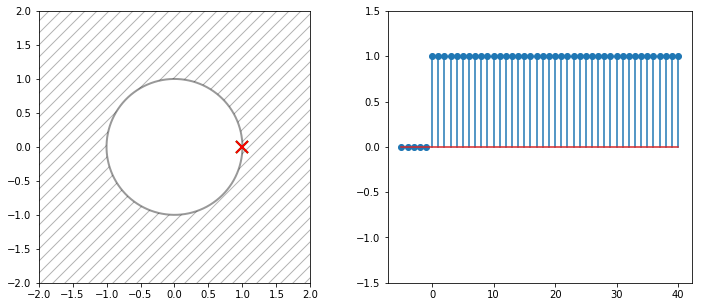

In [52]:
import numpy
import numpy as np
import cplot
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

omega_all = np.arange( 0., 2*np.pi, 0.005 )

fig, axs = plt.subplots( 1, 2, figsize = (12, 5) )

axs[0].set_xlabel( 'Re(z)' )
axs[0].set_ylabel( 'Im(z)' )
axs[0].set_xlim( -1.5, 1.5 )
axs[0].set_ylim( -1.5, 1.5 )
axs[1].set_xlabel( 'Sample' )
axs[1].set_xlim( -5, 40 )
axs[1].set_ylim( -1.5, 1.5 )

z0 = np.array( [
    0,
    np.cos( omega_all[0] )
] )
zp = np.array( [
    np.exp( 1.j * omega_all[0] ),
    np.exp( -1.j * omega_all[0] )
] )

def H(z):
    num = reduce( lambda x, y: x * y, [z - x for x in z0], 1. )
    den = reduce( lambda x, y: x * y, [z - x for x in zp], 1. )
    
    return num / den

plt.sca( axs[0] )
cplot.plot( H, -2, 2, -2, 2, 1000, 1000, alpha = 0.1 )

omega = np.linspace( 0, 2 * np.pi, 1000 )
x_unit = np.cos( omega )
y_unit = np.sin( omega )
axs[0].plot( x_unit, y_unit, 'k-', linewidth = 2, alpha = 0.4 )

for cur_zero in discrete_z0:
    axs[0].plot( np.real( cur_zero ), np.imag( cur_zero ), 'wo',
              fillstyle = 'none',
              markersize = 10 )
# for cur_pole in discrete_zp:
#     axs[0].plot( np.real( cur_pole ), np.imag( cur_pole ), 'wx',
#               fillstyle = 'none',
#               markersize = 10 )
    
r = 1.
n, radii = 50, [r, 4.]
x_bd = r * np.cos( omega )
y_bd = r * np.sin( omega )
# axs[0].plot( x_bd, y_bd, 'w--', linewidth = 2, alpha = 0.3 )

theta = np.linspace(0, 2*np.pi, 1000, endpoint=True)
x_roc = np.outer(radii, np.cos(theta))
y_roc = np.outer(radii, np.sin(theta))
x_roc[1,:] = x_roc[1,::-1]
y_roc[1,:] = y_roc[1,::-1]

axs[0].fill( np.ravel( x_roc ), np.ravel( y_roc ),
          facecolor = 'none',
          edgecolor = 'k',
          alpha = 0.3,
          linewidth = 0.0,
          hatch = '//' )

cur_poles_1, = axs[0].plot( np.real( np.array( [np.exp( 1.j * omega_all[0] )] ) ),
                          np.imag( np.array( [np.exp( 1.j * omega_all[0] )] ) ),
                          'gx',
                          markersize = 12,
                          markeredgewidth = 2,
                          label = 'Pole at omega' )

cur_poles_2, = axs[0].plot( np.real( np.array( [np.exp( -1.j * omega_all[0] )] ) ),
                          np.imag( np.array( [np.exp( -1.j * omega_all[0] )] ) ),
                          'rx',
                          markersize = 12,
                          markeredgewidth = 2,
                          label = 'Pole at -omega' )

n_all = np.arange( -5, 41 )
x = np.zeros( n_all.shape[0] )
x[n_all >= 0] = np.cos( omega_all[0] * n_all[n_all >= 0] )
axs[1].stem( n_all, x )

axs[0].legend()

def init():
    pass
    cur_poles_1.set_data( [], [] )
    cur_poles_2.set_data( [], [] )
    return cur_poles_1, cur_poles_2
    
n_frames = omega_all.shape[0]
    
def animate( i ):
    omega_cur = omega_all[i]
    
    axs[0].cla()
    
    z0 = np.array( [
        0,
        np.cos( omega_cur )
    ] )
    zp = np.array( [
        np.exp( 1.j * omega_cur ),
        np.exp( -1.j * omega_cur )
    ] )

    def H(z):
        num = reduce( lambda x, y: x * y, [z - x for x in z0], 1. )
        den = reduce( lambda x, y: x * y, [z - x for x in zp], 1. )

        return num / den

    #plt.sca( axs[0] )
    #cplot.plot( H, -2, 2, -2, 2, 1000, 1000, alpha = 0.1 )
    
    omega = np.linspace( 0, 2 * np.pi, 1000 )
    x_unit = np.cos( omega )
    y_unit = np.sin( omega )
    axs[0].plot( x_unit, y_unit, 'k-', linewidth = 2, alpha = 0.4 )

    for cur_zero in discrete_z0:
        axs[0].plot( np.real( cur_zero ), np.imag( cur_zero ), 'wo',
                  fillstyle = 'none',
                  markersize = 10 )
    # for cur_pole in discrete_zp:
    #     axs[0].plot( np.real( cur_pole ), np.imag( cur_pole ), 'wx',
    #               fillstyle = 'none',
    #               markersize = 10 )

    r = 1.
    n, radii = 50, [r, 4.]
    x_bd = r * np.cos( omega )
    y_bd = r * np.sin( omega )
    # axs[0].plot( x_bd, y_bd, 'w--', linewidth = 2, alpha = 0.3 )

    theta = np.linspace(0, 2*np.pi, 1000, endpoint=True)
    x_roc = np.outer(radii, np.cos(theta))
    y_roc = np.outer(radii, np.sin(theta))
    x_roc[1,:] = x_roc[1,::-1]
    y_roc[1,:] = y_roc[1,::-1]

    axs[0].fill( np.ravel( x_roc ), np.ravel( y_roc ),
              facecolor = 'none',
              edgecolor = 'k',
              alpha = 0.3,
              linewidth = 0.0,
              hatch = '//' )
    
    x_poles = np.real( np.array( [np.exp( 1.j * omega_cur )] ) )
    y_poles = np.imag( np.array( [np.exp( 1.j * omega_cur )] ) )
    cur_poles_1, = axs[0].plot( x_poles, y_poles,
                          'gx',
                          markersize = 12,
                          markeredgewidth = 2,
                          label = 'Pole at omega' )
    
    x_poles = np.real( np.array( [np.exp( -1.j * omega_cur )] ) )
    y_poles = np.imag( np.array( [np.exp( -1.j * omega_cur )] ) )
    cur_poles_2, = axs[0].plot( x_poles, y_poles,
                          'rx',
                          markersize = 12,
                          markeredgewidth = 2,
                          label = 'Pole at -omega' )
    
    axs[0].set_xlim( -2, 2 )
    axs[0].set_ylim( -2, 2 )
    
    axs[1].cla()
    x = np.zeros( n_all.shape[0] )
    x[n_all >= 0] = np.cos( omega_cur * n_all[n_all >= 0] )
    axs[1].stem( n_all, x )
    axs[1].set_ylim( -1.5, 1.5 )
    return cur_poles_1, cur_poles_2

anim = FuncAnimation( fig, animate, #init_func = init,
                      frames = n_frames,
                      interval = 40,
                      blit = True )

In [53]:
from IPython.display import HTML
HTML( anim.to_html5_video() )

Two important things stick out here. First, notice that as the angular frequency of the oscillation reaches $\omega = \pm \pi$—that is, when the Xs denoting the poles of the signal's transform reach the left side of the unit circle—the signal approaches the **fastest possible oscillation**, where the signal's data flips between "up" and "down" every other sample. This is distinctly different from the continuous case, where we could increase the frequency $f$ indefinitely and still see distinct oscillations.

Second, pay attention to what happens when the current value of $\omega$—shown as the green pole X—passes this threshold of $\omega = \pi$: the oscillation begins to *slow down* again! This makes sense intuitively, as we saw earlier that the frequency axis of the DTFT is a *circle*; hence, progressing further and further along that circular axis must return one back to the origin, of $\omega = 0$. In particular, we note that, since

$$ \mathrm{e}^{\mathrm{i}(\omega + 2\pi k)} = \mathrm{e}^{\mathrm{i}\omega} $$

for any integer $k$, oscillations at angular frequency $\omega$ *look identical* to oscillations at angular frequency $\omega + 2\pi k$ for integer $k$; these correspond to taking $k$ full rotations around the unit circle in the $z$-plane, and returning exactly to where we started, just as shown in the video above!

We talked above in detail about the process of *sampling* a continuous signal to produce a discrete signal. Now it seems we have a bit of a disconnect: continuous signals can represent *arbitrarily high frequencies*, while discrete signals have a *finite range of frequencies* they can represent. How do these two interact when we sample a continuous signal to make it discrete?

Recall from above that sampling with period $T$ relates the $z$ domain to the $s$ domain by the transformation

$$ z = \mathrm{e}^{sT} $$

We showed [in a figure](#figure_sampling_transform) how it looks when we interpolate between the $s$ plane, with frequency on a line, and the $z$ plane, with frequency on the unit circle; indeed, the frequency axis in the Laplace domain becomes "wrapped around" the unit circle. In the plot below, let's see what happens to each "copy" of the interval $f \in [k\cdot 50, (k+1)\cdot 50]$ when it is transformed (with a little staggering of each copy for clarity):

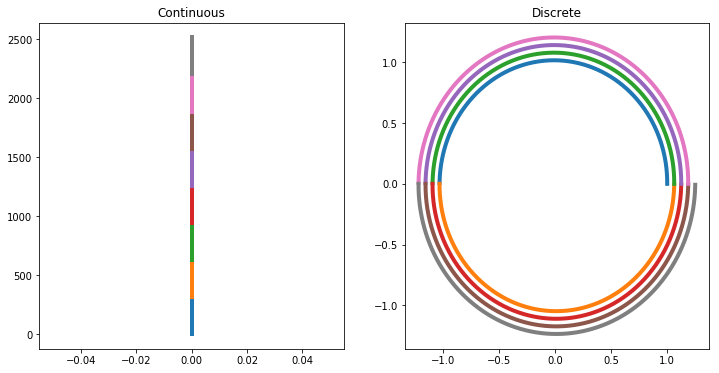

In [36]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100.
T = 1. / fs
f_max = 50

fig, axs = plt.subplots( 1, 2, figsize = (12, 6) )

axs[0].set_title( 'Continuous' )
axs[1].set_title( 'Discrete' )

n_total = 8
for i in range( n_total ):
    f = np.arange( i * f_max, (i+1) * f_max, 0.1 )
    s = 1.j * 2 * np.pi * f
    
    x = np.real( s )
    y = np.imag( s )
    axs[0].plot( x, y, 'C{0}-'.format( i ), linewidth = 4 )
    
    x = np.real( np.multiply( 1 + 0.25 * (f * (1 / (n_total * f_max))), np.exp( s * T ) ) )
    y = np.imag( np.multiply( 1 + 0.25 * (f * (1 / (n_total * f_max))), np.exp( s * T ) ) )
    axs[1].plot( x, y, 'C{0}-'.format( i ), linewidth = 4 )

plt.show()

So we see the "wrapping around" action of the frequency axis in the $+f$ direction; a similar action takes place in the $-f$ direction, wrapping around clockwise starting at $z = 1$ on the right. Note how we chose a sampling rate of $f_s = 100$ Hz, and a corresponding sampling period $T$ of $1 / f_s = 0.01$ seconds; with this choice, each $50$ Hz long segment (or $f_s / 2$) was able to go *halfway around the circle*. This is because at the end of one segment of length $f_s/2$, our transformed frequency is given by

$$ \mathrm{e}^{\mathrm{i}2\pi(f_s/2)T} = \mathrm{e}^{\mathrm{i} 2\pi\frac{1}{2T}T} = \mathrm{e}^{\mathrm{i}\pi} $$

which is precisely one half-traversal of the circle!

What's critical about this "wrapping" of the frequency axis around the circle, as we showed in the previous section, is that, because of the **periodic summation formula**, the contributions of the Fourier transform from all the "wrappings" around a given point on the circle *add together*; that is, for a discrete signal $x_d$ sampled from a continuous signal $x_c$ with sampling period $T$ (and sampling frequency $f_s = 1/T$),

$$ \mathrm{DTFT}(x_d) = X_d(\mathrm{e}^{\mathrm{i}{\omega}})\Big\rvert_{\omega = 2\pi \frac{f}{f_s}} = f_s \sum_{k=-\infty}^\infty X_c\left(\mathrm{i}2\pi\left(f + k f_s\right)\right) $$

Since each continuous frequency interval of $f_s$ wraps once around the unit circle, the right formula shows us that we are adding up all of the continuous frequencies $f + k f_s$, indexed by $k$, that correspond to a given DTFT angular frequency $\omega$.

Let's see what happens when this wraparoud goes amok. Suppose we have a sinusoidal signal $x(t) = \cos(2\pi f_0 t)\theta(t)$, with $f_0 = 195$ Hz. Now suppose that we decided to try and *sample* that signal using a sampling frequency $f_s = 100$ Hz. Make a prediction now: based on what we've seen about the wrapping of the *continuous* frequency axis around the *discrete* frequency axis, where should this signal land? What should the output look like? Let's find out!

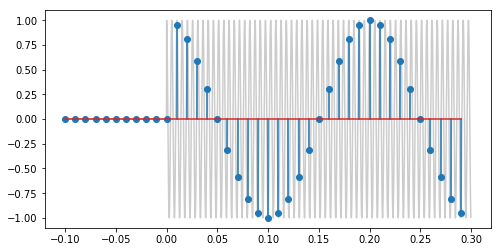

In [37]:
import numpy as np
import matplotlib.pyplot as plt

f0 = 195.

def x( t ):
    ret = np.zeros( t.shape[0] )
    ret[t >= 0] = np.cos( 2. * np.pi * f0 * t[t >= 0] )
    return ret

t_raw = np.arange( -0.1, 0.3, 0.0001 )
x_raw = x( t_raw )

fs = 100.
t_sampled = np.arange( -0.1, 0.3, 1. / fs )
x_sampled = x( t_sampled )

plt.figure( figsize = (8, 4) )

plt.plot( t_raw, x_raw, 'k-', alpha = 0.2 )
plt.stem( t_sampled, x_sampled )
plt.show()

If you guessed above that the sampled result would "look like" a $5$ Hz oscillatioin, you were absolutely right! (To see this, note that one period of the sampled oscillation runs from $0$ to $0.2$ s—hence, the frequency of the sampled oscillation is one over this quantity, or $5$ Hz.)

Why did the result come out this way? This signal has frequency content at $+195$ and $-195$ Hz, because it is a cosine wave; these frequencies, when transformed using the sampling transform $s \mapsto \mathrm{e}^{sT}$ (with $T = 1/f_s = 1/100$, wrap all the way around the unit circle once (the first $f_s = 100$ Hz), and then wrap *almost all the way around* again, to land at

$$ \mathrm{e}^{\pm\mathrm{i}2\pi\frac{195}{100}} = \mathrm{e}^{\pm\mathrm{i}2\pi\left(2 - \frac{5}{100}\right)} = \mathrm{e}^{\mp\mathrm{i}2\pi \frac{5}{100}} $$

Hence, the resultant sampled signal "looks like" what we would expect out of a $5$ Hz signal. Of course, we note that

$$ \mathrm{e}^{\mathrm{i}2\pi\frac{5}{100}} = \mathrm{e}^{\mathrm{i}2\pi\left(k + \frac{5}{100}\right)} = \mathrm{e}^{\mathrm{i}2\pi\frac{k \cdot 100 + 5}{100}} $$

So, in fact, there are an *infinite* number of different signals that produce an output that "looks like" a $5$ Hz sinusoid when sampled—all because of the "wrapping" of the continuous frequency axis around the discrete frequency axis!

This phenomenon is known as **aliasing**, because each one of those different original continuous signals is an "alias" that produces the same exact discrete signal when sampled. This example demonstrates that, in general, **sampling is not invertible**—that is, because there are many underlying continuous signals that can generate a given discrete signal once sampled, there is no unique way to pick a continuous signal that corresponds to that discrete signal.

<a id="example_line_noise"></a>
***
#### **Example**: Line noise harmonics

A very common practical consideration when recording analog signals is **mains hum** or **line noise**, the interference caused by the alternating current of nearby power sources. This is particularly insidious because this noise is, in general, not purelyl sinusoidal—it has **harmonics** of the underlying fundamental frequency (usually $60$ Hz in the United States) that extend far up into the frequency spectrum. Without proper planning during the data acquisition and sampling process, these harmonics can lead to insidious problems because they can become **aliased** as we described above; when they are, they can infect parts of the spectrum that don't seem like they would be harmonics of $60$ Hz, because the continuous frequency axis is *wrapped around* the discrete frequency axis.

For example, let's see what happens when mains hum at $60$ Hz is aliased when sampled at $2$ kHz:

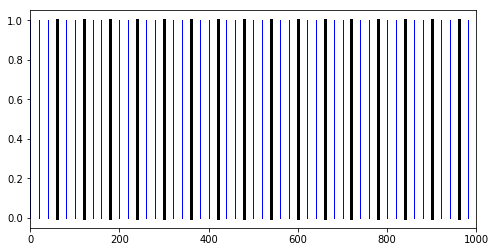

In [38]:
import numpy as np
import matplotlib.pyplot as plt

f0 = 60.
fs = 2000.

k_harmonics = np.arange( 1, 500 )
f_harmonics = k_harmonics * f0

plt.figure( figsize = (8, 4) )

for f in f_harmonics[::-1]:
    omega = 2 * np.pi * (f / fs)
    if omega <= np.pi:
        plt.plot( f * np.array( [1, 1,] ), np.array( [0, 1] ), 'k-', linewidth = 3 )
    else:
        z = np.exp( 1.j * omega )
        omega_base = np.angle( z )
        f_base = fs * np.abs( omega_base ) / (2 * np.pi)
        plt.plot( f_base * np.array( [1, 1,] ), np.array( [0, 1] ), 'b-', linewidth = 1 )
        
plt.xlim( 0, fs/2 )
plt.show()

Here we see additional harmonics (blue lines) show up in between those of the main sequence which were not aliased (thick black lines). Already it is clear that there is a major problem with this noise corrupting any recording being made; however, the problem is made even more insidious when the fundamental frequency of the hum and the sampling rate are not related by a simple ratio, as they were above. Let's see what happens when we introduce a little inaccuracy into the picture:

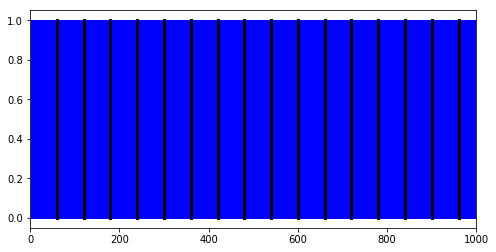

In [39]:
import numpy as np
import matplotlib.pyplot as plt

f0 = 60.
fs = 2000.47

k_harmonics = np.arange( 1, 1000 )
f_harmonics = k_harmonics * f0

plt.figure( figsize = (8, 4) )

for f in f_harmonics[::-1]:
    omega = 2 * np.pi * (f / fs)
    if omega <= np.pi:
        plt.plot( f * np.array( [1, 1,] ), np.array( [0, 1] ), 'k-', linewidth = 3 )
    else:
        z = np.exp( 1.j * omega )
        omega_base = np.angle( z )
        f_base = fs * np.abs( omega_base ) / (2 * np.pi)
        plt.plot( f_base * np.array( [1, 1,] ), np.array( [0, 1] ), 'b-', linewidth = 1 )
        
plt.xlim( 0, fs/2 )
plt.show()

Uh oh! It looks like the *entire spectrum* has been filled with noise harmonics! Indeed, when the noise fundamental frequency and the sampling rate are not related by a whole number ratio, the noise harmonics become [**dense** in the DTFT frequency axis](https://en.wikipedia.org/wiki/Irrational_rotation#Properties), meaning that every frequency of the sampled signal's DTFT is arbitrarily close to a noise harmonic. Yikes!

***

A natural question arises from this discussion: Are there any circumstances under which aliasing can be avoided, and we can exactly reconstruct a signal $x(t)$ from a sampled version, $x_d(n)$? The answer, as it happens, is yes!—with a couple caveats about real-world implementation that we will discuss shortly:

#### **Theorem** (Nyquist-Shannon)
> Let $x_c(t)$ be a continuous signal, and suppose further that $x_c$'s Fourier transform, $X_c(\mathrm{i}2\pi f)$ is **zero when $|f| > B$**. If $x_c$ is sampled at a rate $f_s \geq f_\textrm{Nyq} = 2B$ to form the discrete signal $x_d(n)$, then $x_c$ can be perfectly reconstructed from $x_d$.

##### Proof
We begin by examining the DTFT of $x_d$. From our characterization above of periodic summation, we note that the DTFT can be seen as a periodic summation in frequency:

$$ \mathrm{DTFT}(x_d) = X_d(\mathrm{e}^{\mathrm{i}{\omega}})\Big\rvert_{\omega = 2\pi \frac{f}{f_s}} = f_s \sum_{k=-\infty}^\infty X_c\left(\mathrm{i}2\pi\left(f + k f_s\right)\right) $$

Because, by assumption, $f_s \geq 2B$, these periodically summed copies are spaced far enough apart that they *do not overlap*:

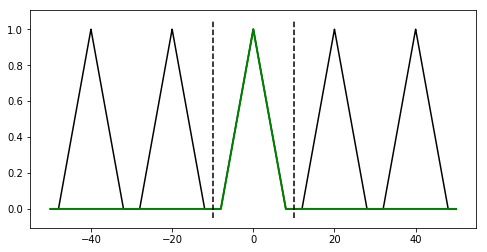

In [40]:
import numpy as np
import matplotlib.pyplot as plt

B = 8.
fs = 2 * B + 4.

def Xc( f ):
    ret = np.zeros( f.shape[0] )
    ret[(f >= -B) & (f < 0)] = 1 + (1 / B) * f[(f >= -B) & (f < 0)]
    ret[(f >= 0) & (f <= B)] = 1 - (1 / B) * f[(f >= 0) & (f <= B)]
    return ret

f_test = np.arange( -50, 50, 0.01 )
Xc_test = Xc( f_test )

k_all = np.arange( -2, 3 )
Xd_periodic = np.zeros( f_test.shape[0] )
for k in k_all:
    Xd_periodic += Xc( f_test + k * fs )
    
plt.figure( figsize = (8, 4) )
    
plt.plot( f_test, Xd_periodic, 'k-' )
plt.plot( f_test, Xc_test, 'g-', linewidth = 2 )

yl = plt.ylim()
plt.plot( -(fs/2) * np.array([1,1]), yl, 'k--' )
plt.plot( (fs/2) * np.array([1,1]), yl, 'k--' )

plt.show()

In this figure each triangle (an example given in green) represents one copyof the original Fourier transform $X_c$; the periodic summation is given in black, showing that each copy of the original spectrum is completely non-overlapping; indeed, the original spectrum is completely contained inside of one period of the DTFT (shown as $f \in [-f_s/2, fs_2]$, in dashed black lines). Fundamentally, it is this *lack of overlap* when $X_c$ is wrapped around the discrete frequency axis (the unit circle) that ensures that there is no *interference*, as we saw in the example above.

What immediatelyl stands out about this periodic summation is that we can *uniquely recover* the original continuous Fourier transform from it by *zeroing out out* everything except the fundamental interval $[-B, B]$ where $X_c$ was originally nonzero using the *rect function* $\Pi_B$:

$$ X_c(\mathrm{i}2\pi f) = \Pi_B(f)\,\left( \sum_{k=-\infty}^\infty X_c\left(\mathrm{i}2\pi\left(f + k f_s\right)\right) \right) $$

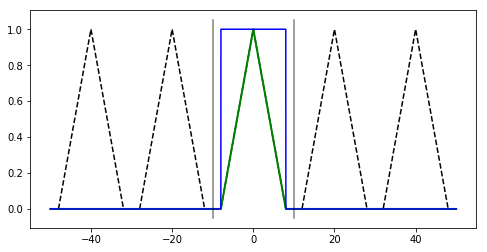

In [41]:
import numpy as np
import matplotlib.pyplot as plt

B = 8.
fs = 2 * B + 4.

def Xc( f ):
    ret = np.zeros( f.shape[0] )
    ret[(f >= -B) & (f < 0)] = 1 + (1 / B) * f[(f >= -B) & (f < 0)]
    ret[(f >= 0) & (f <= B)] = 1 - (1 / B) * f[(f >= 0) & (f <= B)]
    return ret

def Pi( f, B ):
    ret = np.zeros( f.shape[0] )
    ret[(f >= -B) & (f <= B)] = 1.
    return ret

f_test = np.arange( -50, 50, 0.01 )
Xc_test = Xc( f_test )

k_all = np.arange( -2, 3 )
Xd_periodic = np.zeros( f_test.shape[0] )
for k in k_all:
    Xd_periodic += Xc( f_test + k * fs )
    
X_Pi = Pi( f_test, B )
    
plt.figure( figsize = (8, 4) )
    
plt.plot( f_test, Xd_periodic, 'k--' )
plt.plot( f_test, Xc_test, 'g-', linewidth = 2 )

plt.plot( f_test, X_Pi, 'b-' )

yl = plt.ylim()
plt.plot( -(fs/2) * np.array([1,1]), yl, 'k-', alpha = 0.5 )
plt.plot( (fs/2) * np.array([1,1]), yl, 'k-', alpha = 0.5 )

plt.show()

Now, the term in parentheses, as we have seen, is equivalent to another sum, namely, the DTFT of $x_d$ evaluated at $\omega = 2\pi\frac{f}{f_s} = 2\pi fT$, where $T = \frac{1}{f_s}$ is the sample period, in seconds:

$$ \sum_{k=-\infty}^\infty X_c\left(\mathrm{i}2\pi\left(f + k f_s\right)\right) = \frac{1}{f_s} \sum_{k=-\infty}^\infty x_d(k)\,\mathrm{e}^{-\mathrm{i}2\pi fkT} $$

Plugging this into our equation above yields

$$
\begin{eqnarray*}
    X_c(\mathrm{i}2\pi f) & = & \Pi_B(f)\,\left( \sum_{k=-\infty}^\infty X_c\left(\mathrm{i}2\pi\left(f + k f_s\right)\right) \right) = \Pi_B(f)\,\left(\frac{1}{f_s}\sum_{k=-\infty}^\infty x_d(k)\,\mathrm{e}^{-\mathrm{i}2\pi fkT}\right) \\
     & = & \frac{1}{f_s} \sum_{k=-\infty}^\infty x_d(k)\,\Pi_B(f)\,\mathrm{e}^{-\mathrm{i}2\pi fkT}
\end{eqnarray*}
$$

We have judiciously selected out an expression for the *Fourier transform* of the original underlying signal by using a rectangular filter on the periodic summation formula; now, all that's left is to *invert the Fourier transform* to reconstruct the original signal $x_c$. We will go about this by leveraging the **linearity of the inverse Fourier transform** to do the inversion one term at a time in the sum. Further, recall first that

$$ \mathcal{F}^{-1}(\Pi_B(f)) = 2B\,\mathrm{sinc}(2B t) $$

is the [inverse Fourier transform of a rect filter](#perfect_lowpass); and second, that

$$ \mathcal{F}(x(t - t_0)) = \mathrm{e}^{-\mathrm{i}2\pi f t_0} X(\mathrm{i}2\pi f) $$

is the effect of [time-shifting on the Fourier transform](#translation) of a signal. Putting these two together, we note that in each term, we can directly infer that the inverse Fourier transform is a time-shifted $\mathrm{sinc}$ function,

$$ \mathcal{F}^{-1}\left( \Pi_B(f)\,\mathrm{e}^{-\mathrm{i}2\pi fkT} \right) = 2 B\,\mathrm{sinc}\left(2B\left(t - kT\right)\right)$$

Hence, our overall inversion formula becomes

$$
\begin{eqnarray*}
    x_c(t) & = & \mathcal{F}^{-1}\left( \frac{1}{f_s} \sum_{k=-\infty}^\infty x_d(k)\,\Pi_B(f)\,\mathrm{e}^{-\mathrm{i}2\pi fkT} \right) \\
     & = & \frac{1}{f_s} \sum_{k=-\infty}^\infty x_d(k)\,\mathcal{F}^{-1}\left( \Pi_B(f)\,\mathrm{e}^{-\mathrm{i}2\pi fkT} \right) \\
     & = & \frac{2B}{f_s} \sum_{k=-\infty}^\infty x_d(k)\,\mathrm{sinc}(2B(t - kT))
\end{eqnarray*}
$$

**(This seems wrong; the argument to $\mathrm{sinc}$ makes it no longer an interpolation function. Should we just go to the case where $f_s = 2B$?**

This proves that $x_c$ can be reconstructed from $x_d$. $\blacksquare$

In the particular case where $f_s = f_\textrm{Nyq} = 2B$, the **Nyquist rate**, this formula becomes

$$ x_c(t) = \sum_{k=-\infty}^\infty x_d(k)\,\mathrm{sinc}\left(2B\left(t - \frac{k}{2B}\right)\right) $$

This variant is known as the **interpolation formula**. Let's tease apart what's going on in this formula. $\ldots$

Given a **bandlimited** signal $x$ (that is, a signal with frequency content that is zero outside of $f \in [-B, B]$ for some $B$), the **Nyquist rate** $f_\textrm{Nyq} = 2B$ is the *minimum sampling rate* needed to accurately reconstruct $x$. We can also think of this in the opposite sense: if we were to sample a signal at some frequency $f_s$, then $f_s/2$—confusingly also known as the **Nyquist frequency**—represents the maximum frequency of the original continuous signal that can be reconstructed without aliasing.

<a id="example_anti_aliasing"></a>
***

#### **Example**: Anti-aliasing

$\ldots$

<a id="dft"></a>
***

### Discrete Fourier transform

Computers (barring some [symbolic tools](https://www.wolfram.com/mathematica/)) have a very limited ability to reason with *continuous* data. And, while we've dealt with discrete signals, up to this point most of our examples of *transforms*—in particular, the $z$ transform and the DTFT—have been idealized, because, while these tools are extremely useful for understanding the *theory* of what's happening behind the scenes, they are practically very difficult to represent for moderately complicated real-world signals.

To effectively work with discrete signals in the *frequency domain* on a digital system, we need a frequency representation that is **discrete** itself. A natural way to do this is to **sample the DTFT** itself at $N$ discrete points evenly spaced around the discrete frequency axis (the unit circle); that is, for a given discrete signal $x(n)$, we want to pull out the values of the DTFT $X(\mathrm{e}^{\mathrm{i}\omega}$ evaluated at $\omega = 2\pi\frac{n}{N}$:

$$ X_n = X(\mathrm{e}^{\mathrm{i}2\pi\frac{n}{N}}) = \sum_{k=-\infty}^\infty x(k)\,\mathrm{e}^{-\mathrm{i}2\pi\frac{kn}{N}} $$

Now, for a fixed $n$, the exponential term is *periodic in $k$*, with period $N$ (as this brings the exponent back around by an integer multiple of $2\pi$); hence, we can re-represent our sum by collecting all of the terms of $x$ that correspond to one $k$ value in the fundamental period into a *periodic summation*; namely, letting

$$ x_N(k) = \sum_{m=-\infty}^\infty x_N(k - mN) $$

denote the sum of all of the values of $x$ separated from $k$ by an integer number of periods, we then can write our sum for $X_k$ as

$$ X_k = \sum_{k=0}^{N-1} x_N(k)\,\mathrm{e}^{-\mathrm{i}2\pi\frac{kn}{N}} $$

(although we note that, since $x_N$ is $N$-periodic, we may substitute any contiguous interval of $N$ samples for the summation for $k$). This is the **discrete Fourier transform**, or **DFT**, of $x$. (The nomenclature is exceedingly confusing: the discrete **time** Fourier transform has an emphasis on the fact that only time is discrete, while frequency is continuous; on the other hand, the **discrete** Fourier transform has an emphasis on the fact that *both* domains are discrete.)

Note here that, in accordance with our observation above that sampling in one domain corresponds to periodicity in the other, sampling of the DTFT in the *frequency domain* has now led to the argument of our Fourier transform, $x_N$, becoming *periodic*! This signal $x_N$ is known as the **periodic extension** of $x$; similar to above, where we saw the continuous frequency axis of the Fourier transform "wrapped" around the unit circle to form a periodic summation formula, the $N$-sampled DFT wraps a discrete signal around a circle *in time*.

In the particular case where $x$ is finite and has $N$ samples, $x_N$ is completely determined by the fundamental period of $x$; and so, our sum becomes

$$ X_k = \sum_{n=0}^{N-1} x(n)\,\mathrm{e}^{-\mathrm{i}2\pi\frac{kn}{N}} $$

<a id="example_zero_padding"></a>
***

#### **Example**: Zero-padding

Let's take a look at a real-life Fourier transform! Let's take a look at a [brief 32-channel electroencephalogram (EEG) dataset](https://sccn.ucsd.edu/~arno/fam2data/publicly_available_EEG_data.html). In this case we'll be using the **fast Fourier transform (FFT)** as our algorithm of choice to compute the DFT of the EEG signals; the FFT is much faster than naïve computation of the DFT, taking [$O(N\log N)$ steps rather than $O(N^2)$](https://www.comm.utoronto.ca/~dkundur/course_info/discrete-time-systems/notes/Kundur_DTS_Chap8.pdf) (at least in the best case, where $N$ is a power of $2$). Let's take a look first at what the DFT looks like for these kinds of signals, bearing in mind that our observed time series $x(n)$ is a representation of a continuous process *sampled at a frequency $f_s$*:

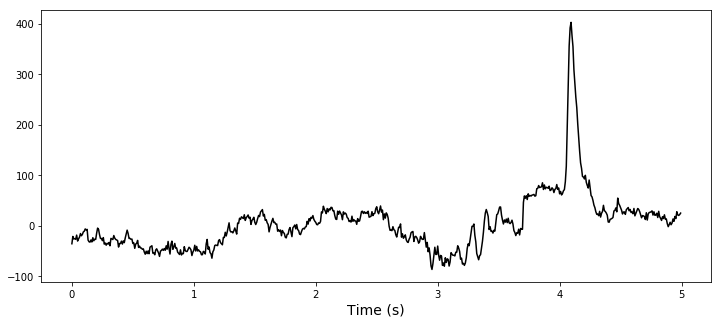

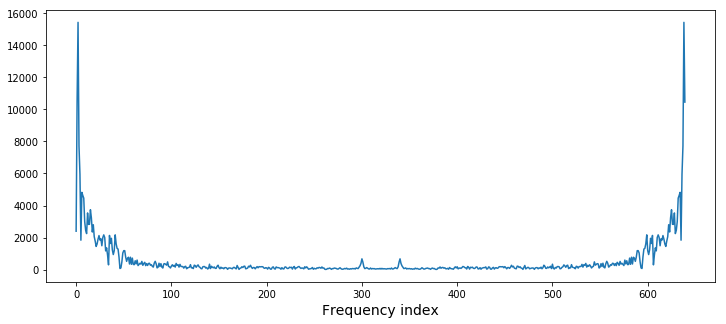

In [43]:
import numpy as np
import scipy.io
import os.path
from scipy.fftpack import fft

data_dir = 'data'
data_filename = 'sample_eeg.mat'
mat_data = scipy.io.loadmat( os.path.join( data_dir, data_filename ) )

fs = mat_data['srate'][0][0]
eeg = mat_data['data']

tn = np.arange( eeg.shape[1] ) * (1. / fs)
xn = eeg[0, :]

# Only look at the first 5 seconds
period_disp = 5.
N_disp = int( period_disp * fs )
tn_disp = tn[:N_disp]
xn_disp = xn[:N_disp]
Xk_disp = fft( xn_disp )

plt.figure( figsize = (12, 5) )
plt.plot( tn_disp, xn_disp, 'k-' )
plt.xlabel( 'Time (s)', fontsize = 14 )

plt.figure( figsize = (12, 5) )
plt.plot( np.abs( Xk_disp ) )
plt.xlabel( 'Frequency index', fontsize = 14 )
plt.show()

Notice how the DFT "wraps around" the halfway point. This is a function of the *symmetry properties of the Fourier transform*: because our input signal is purely real, the positive and negative frequency components of the DTFT must be exactly equal; thus, when the DTFT is sampled to form the DFT, the result is symmetric. Indeed, the "halfway point" of the DFT above—which corresponds to halfway around the unit circle in the $z$-plane, an angular frequency of $\omega = \pi$ for the DFT, or a frequency of $f_s/2$ from the original sampled continuous process—corresponds exactly to the *Nyquist frequency* of the sampling process.

Assuming that we don't [run into problems with aliasing](#nyquist_shannon), we can use a little algebra to convert the frequency index of the DFT into a corresponding frequency of the underlying continuous process, by noting that, for DFT bin $X_k$,

$$
\begin{eqnarray*}
    k = N & \Leftrightarrow & \omega = 2\pi \\
    \omega = \pi & \Leftrightarrow & f = \frac{f_s}{2}
\end{eqnarray*}
$$

That is, the leftmost edge of the plot above corresponds to $f = 0$, and the midpoint corresponds to $f = f_s/2$; hence, we can use

$$ f_k = \frac{k}{N} f_s $$

when looking at the spectrum, before the wraparound! Let's take a peek at what this looks like—and let's take a look at the phase, too, while we're at it:

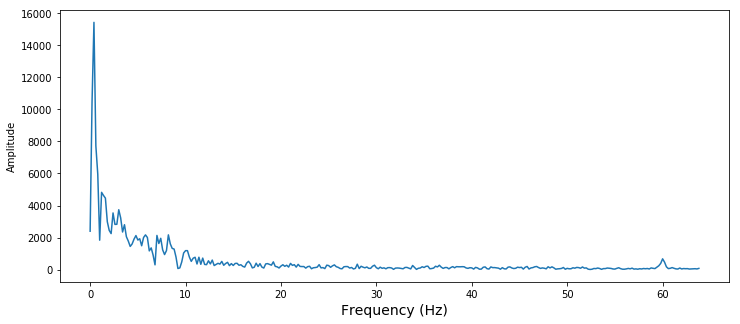

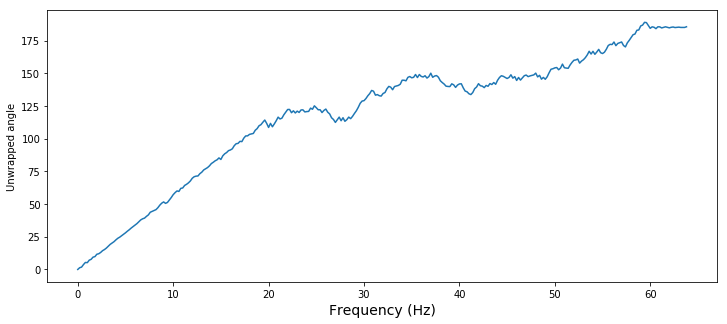

In [44]:
k_disp = np.arange( N_disp )
f_disp = (fs / N_disp) * k_disp

f_disp_half = f_disp[:N_disp//2]
Xk_disp_half = Xk_disp[:N_disp//2]

plt.figure( figsize = (12, 5) )
plt.plot( f_disp_half, np.abs( Xk_disp_half ) )
plt.ylabel( 'Amplitude' )
plt.xlabel( 'Frequency (Hz)', fontsize = 14 )

plt.figure( figsize = (12, 5) )
plt.plot( f_disp_half, np.unwrap( np.angle( Xk_disp_half ) ) )
plt.ylabel( 'Unwrapped angle' )
plt.xlabel( 'Frequency (Hz)', fontsize = 14 )

plt.show()

Interesting! Notice that little blip in the amplitude trace right at $60$ Hz? That's the [mains hum](#example_line_noise)! And notice also that the phase of the data is *almost linear* up to about $20$ Hz or so. **(What does this mean?)**

Now, notice that most of the amplitude spectrum is very boring above about $10$ Hz. Let's say the phemonemon we're really interested in is in the range $0$-$5$ Hz. We might want to really zoom in on this band in the frequency spectrum, to get an inkling of what's going on:

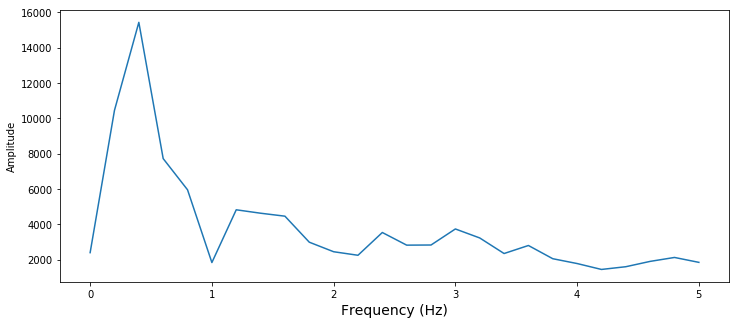

In [45]:
f_disp_small = f_disp[f_disp <= 5.]
Xk_disp_small = Xk_disp[f_disp <= 5.]

plt.figure( figsize = (12, 5) )
plt.plot( f_disp_small, np.abs( Xk_disp_small ) )
plt.ylabel( 'Amplitude' )
plt.xlabel( 'Frequency (Hz)', fontsize = 14 )
plt.show()

Unfortunately, there are very few points here. Why is that? Well, recall from above that I only used $5$ s of the available data to form my DFT, meaning that there are $N = 5 \cdot f_s$ data points in the $x(n)$ I used as input for the DFT. Since the DFT has perodicity $N$, this means that the DFT only has $5 \cdot f_s$ points to represent all of the frequencies from $0$ up to $f_s$. If we were to generalize a bit, and consider the case where $N = d f_s$ for some duration $d$ in seconds, then we note that the **frequency spacing** between points of the DFT, from our equation for $f_k$ above, is given by

$$ \Delta f = f_{k+1} - f_k = \frac{k+1}{N}f_s - \frac{k}{N}f_s = \frac{1}{d f_s}f_s = \frac{1}{d} $$

So we see that **the time bin used for computing the DFT is inversely proportional to the frequency spacing of the DFT**. We can see this directly above, by counting out $5$ points for every $1$ Hz bin in the plot!

As we'll see shortly, [we can't alter the fundamental relationship between a signal's time and frequency representations](#uncertainty). However, bearing in mind that the DFT is a *uniform sampling* of the DTFT, we note that we can obtain more frequency points in our DFT by adding more input points; and, the most natural way to do that is to **add zeros to the end of our input**. It sounds like a trick, but let's see it at work:

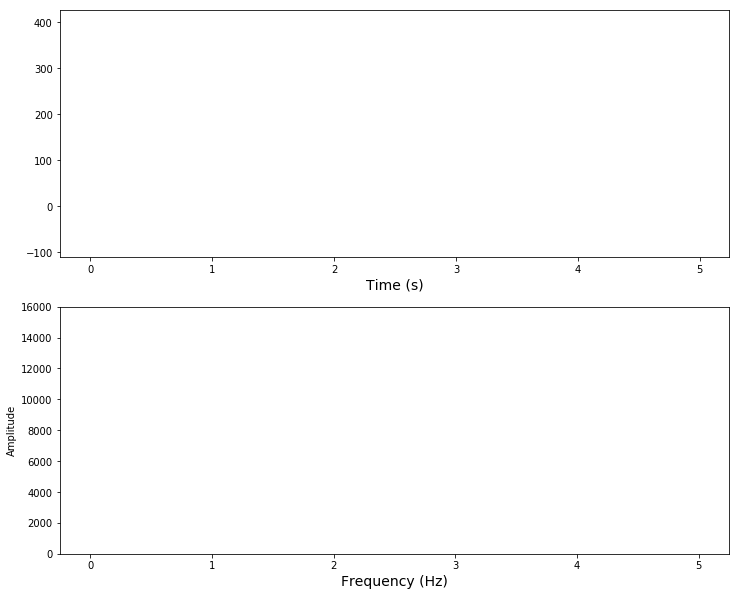

In [46]:
N_pad_all = np.arange( 0, 10 * N_disp, 40 )
N_pad_all = np.r_[np.zeros( (20,), dtype = int ), N_pad_all, np.flip( N_pad_all )]

period_disp = 5.
N_disp_base = int( period_disp * fs )
xn_disp_base = xn[:N_disp_base]

N_disp = N_disp_base + N_pad_all[0]
tn_disp = tn[:N_disp]
xn_disp = np.r_[xn_disp_base, np.zeros( (N_pad_all[0],) )]
Xk_disp = fft( xn_disp )

k_disp = np.arange( N_disp )
f_disp = (fs / N_disp) * k_disp

f_disp_small = f_disp[f_disp <= 5.]
Xk_disp_small = Xk_disp[f_disp <= 5.]

fig, axs = plt.subplots( 2, 1, figsize = (12, 10) )

line_t, = axs[0].plot( tn_disp, xn_disp, 'k-' )
axs[0].set_xlabel( 'Time (s)', fontsize = 14 )

line_f, = axs[1].plot( f_disp_small, np.abs( Xk_disp_small ) )
dot_f, = axs[1].plot( f_disp_small, np.abs( Xk_disp_small ), 'k.', markersize = 7 )
axs[1].set_ylabel( 'Amplitude' )
axs[1].set_xlabel( 'Frequency (Hz)', fontsize = 14 )
axs[1].set_ylim( 0, 16000 )

def init():
    line_t.set_data( [], [] )
    line_f.set_data( [], [] )
    dot_f.set_data( [], [] )
    return line_t, line_f, dot_f
    
n_frames = N_pad_all.shape[0]
    
def animate( i ):
    N_pad_all_cur = N_pad_all[i]
    
    N_disp = N_disp_base + N_pad_all_cur
    tn_disp = tn[:N_disp]
    xn_disp = np.r_[xn_disp_base, np.zeros( (N_pad_all_cur,) )]
    Xk_disp = fft( xn_disp )

    k_disp = np.arange( N_disp )
    f_disp = (fs / N_disp) * k_disp
    
    f_disp_small = f_disp[f_disp <= 5.]
    Xk_disp_small = Xk_disp[f_disp <= 5.]
    
    line_t.set_data( tn_disp, xn_disp )
    line_f.set_data( f_disp_small, np.abs( Xk_disp_small ) )
    dot_f.set_data( f_disp_small, np.abs( Xk_disp_small ) )
    
    axs[0].set_xlim( 0, tn_disp[-1] )
    
    return line_t, line_f, dot_f

anim = FuncAnimation( fig, animate, init_func = init,
                      frames = n_frames,
                      interval = 40,
                      blit = True )

In [47]:
from IPython.display import HTML
HTML( anim.to_html5_video() )

Fascinating! What looked originally like one single peak at about $0.5$ Hz has turned out to be *two peaks*, once evaluated with enough zeros added to the end of our signal!

The reason this occurs is that appending extra zeros in the time domain—also called **zero-padding**—corresponds exactly to **interpolation** in the frequency domain. To see this, consider a signal $x(n)$ with $M$ nonzero samples, but zero-padded to have $N$ total samples. The DFT of this is then equal to

$$
\begin{eqnarray*}
    X_k & = & \sum_{n=0}^{N-1} x(n)\,\mathrm{e}^{-\mathrm{i}2\pi \frac{kn}{N}} \\
     & = & \sum_{n=0}^{M-1} x(n)\,\mathrm{e}^{-\mathrm{i}2\pi \frac{k}{N} n}
\end{eqnarray*}
$$

where the second step follows because $x$ is zero beyond $M-1$. But this expression is precisely equal to the *DTFT* of $x$ sampled at $\omega_k = 2\pi\frac{k}{N}$—and since $N > M$, this means that we are *exactly interpolating between* the sampled values of the DTFT used to form the DFT of $x$ *without* the zero-padding! That is to say, by zero-padding, we are sampling the same underlying function—the DTFT of our signal, $x$—but with *finer frequency spacing*.

To extend this, as a curiosity point, let's see what happens when we **infinitely zero-pad our signal**; that is, let's take $x(n)$ to have $M$ nonzero entries, and a total length of $N$—as above—but in the limit that $N \to \infty$. In this case, the DFT becomes

$$ X_k = \textrm{"}\lim_{N\to\infty}\textrm{"} \sum_{n=0}^{M-1} x(k)\,\mathrm{e}^{-\mathrm{i}2\pi\frac{k}{N} n} $$

where we note that the upper limit of the summation is $M-1$ because $x$ is zero outside this range. In the limit as $N \to \infty$, we note that the *spacing* between the individual computed frequencies at index $k$—proportional to $\frac{1}{N}$—becomes infinitessimally small; hence, we can treat the discrete frequency variable $\frac{2\pi k}{N} \to \omega$ as a continuous variable. Bringing this consideration, we arrive at the following equation for the "infinite DFT":

$$ \textrm{"}X(\omega)\textrm{"} = \sum_{n=0}^{M-1} x(n)\,\mathrm{e}^{-\mathrm{i}\omega n}$$

This is precisely the DTFT of $x$, treated as a signal with a finite number of nonzero samples (hence the bounds of the summation). This rounds out our picture of zero-padding: zero-padding *exactly interpolates* the DFT by *sampling the DTFT* at additional, more finely spaced frequency points; and, in the limit of *infinite zero-padding*—that is, where the input $x$ is no longer considered to be a *perioodic* extension—the DFT becomes the (*continuous-frequency*) DTFT.

***

This example also demonstrates a crucial distinction when talking about signals, between **frequency sampling** and **frequency resolution**. Take, for example, the two peaks that are present in the signal above, at about $0.1$ Hz and $0.5$ Hz. Above a certain threshold of zero-padding, these two peaks are *visible*, and no matter how much we zero-pad—that is, no matter how tight we make the *frequency sampling* of our DFT—the actual *widths* of those two peaks remains the same. That is because the DFT at any level of zero-padding is fundamentally sampling from the *same DTFT* of the original signal $x$. The *frequency resolution* is a function of the signal itself: it is a measure of our ability to *resolve* signals at different frequencies. For example, the widths of those two peaks is such that, if they were located $\sim 0.1$ Hz apart from one another, they would be indistinguishable, and would appear as one peak—*no matter how much zero-padding was used* to determine the spectrum.

<a id="243"></a>
***

## 2.4.3. Unifying topics

**TODO: Describe**

<a id="symmetry"></a>
***

### Symmetry

All of the forms of the Fourier transform we discussed above are **complex-valued**; that is, at each point of frequency, discrete or continuous, the output value of the Fourier transform $X$ of a signal is a complex number $c \in \mathbb{C}$.

One thing that should be a little striking from this, however, is that there seems to be a mismatch in the *amount of data* in a signal and its Fourier transform. Indeed, all of the signals we've dealt with have been **real-valued**; thus, it would seem that the Fourier transform has *twice as much "data"* as the original signal! The reason we should not worry, however, is that all of the Fourier transforms exhibit **symmetry**—that is, even though the transform might *appear* to have extra data, some of that data is in fact *redundant*.

**TODO: Should I go through Hermitian symmetry first and derive real symmetry from there?**

Let's consider a continuous signal $x(t)$, that is *real-valued*. There are two particular classes of symmetry that we are interested in for signals, defined by what happens when we reflect them about the origin:

$$
\begin{eqnarray*}
    x(t) = x(-t) & \quad \Leftrightarrow \quad & x\textrm{ is }\textbf{symmetric} \\
    x(t) = -x(-t) & \quad \Leftrightarrow \quad & x\textrm{ is }\textbf{antisymmetric}
\end{eqnarray*}
$$

These two symmetry classes are exemplified perfectly in $\cos$ (which is *symmetric*) and $\sin$ (which is *antisymmetric*):

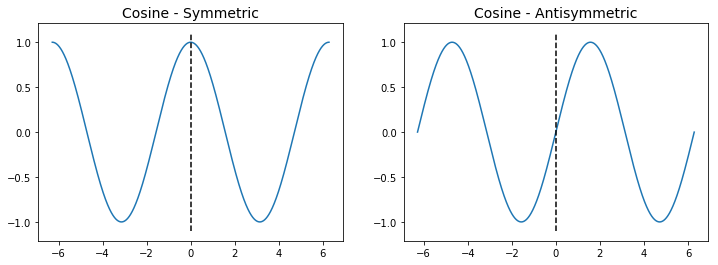

In [56]:
import numpy as np
import matplotlib.pyplot as plt

t_all = np.arange( -2*np.pi, 2*np.pi, 0.001 )

x_all = np.cos( t_all )
y_all = np.sin( t_all )

fig, axs = plt.subplots( 1, 2, figsize = (12, 4) )

axs[0].plot( t_all, x_all )
axs[0].set_title( 'Cosine - Symmetric', fontsize = 14 )
yl = axs[0].get_ylim()
axs[0].plot( np.array([0, 0]), yl, 'k--' )

axs[1].plot( t_all, y_all )
axs[1].set_title( 'Cosine - Antisymmetric', fontsize = 14 )
yl = axs[1].get_ylim()
axs[1].plot( np.array([0, 0]), yl, 'k--' )

plt.show()

Every function can be decomposed into its *symmetric and antisymmetric parts* in the following way:

$$
\begin{eqnarray*}
    \mathrm{Sym}(x)(t) & = & \frac{1}{2}\left(x(t) + x(-t)\right) \\
     & = & \frac{1}{2}\left(x(-t) + x(t)\right) = \mathrm{Sym}(x)(-t) \\
    \mathrm{Anti}(x)(t) & = & \frac{1}{2}\left(x(t) - x(-t)\right) \\
     & = & -\frac{1}{2}\left(x(-t) - x(t)\right) = -\mathrm{Anti}(x)(-t)
\end{eqnarray*}
$$

We can even see that $x$ is exactly built up from these two parts:

$$ \mathrm{Sym}(x)(t) + \mathrm{Anti}(x)(t) = \frac{1}{2}\left(x(t) + x(-t) + x(t) - x(-t)\right) = x(t) $$

Now, it turns out that symmetry can have a profound impact on the outcome of integration, which plays a big role in our Fourier transform:

#### **Lemma**
> Let $x_s$ be a *symmetric* continuous signal, and $x_a$ be an *antisymmetric* continuous signal. Then,
>
> $$ \int_{-\infty}^\infty x_s(t) x_a(t)\,\mathrm{d}t = 0 $$

##### Proof
We can split this up into two integrals, on either side of the origin:

$$ \int_{-\infty}^\infty x_s(t) x_a(t)\,\mathrm{d}t = \int_{-\infty}^0 x_s(t) x_a(t)\,\mathrm{d}t + \int_0^\infty x_s(t) x_a(t)\,\mathrm{d}t $$

Now, we can make the substitution $\tau = -t$ and $\mathrm{d}\tau = -\mathrm{d}t$ in the first integral, which will allow us to leverage some of our symmetry properties:

$$
\begin{eqnarray*}
    \int_{-\infty}^\infty x_s(t) x_a(t)\,\mathrm{d}t & = & \int_{\infty}^0 -x_s(-\tau) x_a(-\tau)\,\mathrm{d}\tau + \int_0^\infty x_s(t) x_a(t)\,\mathrm{d}t \\
     & = & \int_0^\infty x_s(-\tau) x_a(-\tau)\,\mathrm{d}\tau + \int_0^\infty x_s(t) x_a(t)\,\mathrm{d}t
\end{eqnarray*}
$$

Noting that $x_s(-\tau) = x_s(\tau)$ and $x_a(-\tau) = -x_a(\tau)$, we have:

$$
\begin{eqnarray*}
    \int_{-\infty}^\infty x_s(t) x_a(t)\,\mathrm{d}t & = & -\int_0^\infty x_s(\tau) x_a(\tau)\,\mathrm{d}\tau + \int_0^\infty x_s(t) x_a(t)\,\mathrm{d}t \\
     & = & 0 \quad \blacksquare
\end{eqnarray*}
$$

Now, to apply this to our Fourier transform! The way we'll approach this is a little bit different than the way we've treated the Fourier transform up to this point: instead of treating it as a single integral,

$$ X(\mathrm{i}2\pi f) = \int_{-\infty}^\infty x(t)\mathrm{e}^{-\mathrm{i}2\pi ft}\,\mathrm{d}t $$

we will use Euler's formula to split up $\mathrm{e}^{-\mathrm{i}2\pi ft}$ into its constituent *real* and *imaginary* parts:

$$ \mathrm{e}^{-\mathrm{i}2\pi ft} = \cos(-2\pi ft) + \mathrm{i}\sin(-2\pi ft) = \cos(2\pi ft) - \mathrm{i}2\sin(2\pi ft) $$

When our signal $x$ is *real*, this splits our Fourier transform integral into two parts, *real* and *imaginary*:

$$ X(\mathrm{i}2\pi f) = \underbrace{\int_{-\infty}^\infty x(t)\cos(2\pi ft)\,\mathrm{d}t}_{\mathrm{Re}(X)} - \mathrm{i} \underbrace{\int_{-\infty}^\infty x(t)\sin(2\pi ft)\,\mathrm{d}t}_{-\mathrm{Im}(X)} $$

Above, we talked about splitting $x$ into its symmetric and antisymmetric parts; what happens when we do this now in the context of this new integral? Let's start with the *real part*:

$$ \mathrm{Re}(X)(\mathrm{i}2\pi f) = \int_{-\infty}^\infty \left[\mathrm{Sym}(x)(t) + \mathrm{Anti}(x)(t)\right]\cos(2\pi ft)\,\mathrm{d}t $$

Aha! Look at what happens here: since $\cos$ is a *symmetric* function, when this is multiplied out, the integral involving $\mathrm{Anti}(x)(t)\,\cos(2\pi ft)$ will turn out to be *zero*, from our lemma above! This means that this integral yields a *symmetric function*; that is, the **real part of the Fourier transform of a real signal is symmetric**.

We can go through a similar computation with the *imaginary part* of the Fourier transform as well:

$$ \mathrm{Im}(X)(\mathrm{i}2\pi f) = -\int_{-\infty}^\infty \left[\mathrm{Sym}(x)(t) + \mathrm{Anti}(x)(t)\right]\sin(2\pi ft)\,\mathrm{d}t $$

Here we note that it is the *symmetric term*, $\mathrm{Sym}(x)(t)\,\sin(2\pi ft)$, that contains both symmetric and antisymmetric parts, and therefore is zero! As such, the imaginary part of the Fourier transform contains only antisymmetric components; thus, the **imaginary part of the Fourier transform of a real signal is antisymmetric**.

Let's see an example of this behavior from [a signal we studied above](#example_laplace_fourier), namely that given by

$$ x(t) = \mathrm{e}^{-t}\,\cos(2\pi t)\, \theta(t) $$

The Fourier transform of this signal is (the admittedly hairy expression)

$$ X(\mathrm{i}2\pi f) = \frac{\mathrm{i}2\pi f-(-1)}{[\mathrm{i}2\pi f - (- 1 - \mathrm{i}2\pi)]\,[\mathrm{i}2\pi f - (-1 + \mathrm{i}2\pi)]} $$

which we can thankfully plot using the aid of computers:

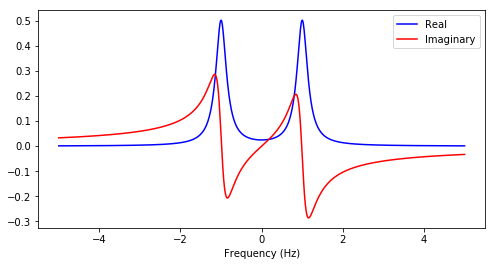

In [57]:
z0 = np.array( [
    -1
] )
zp = np.array( [
    -1 - (2j * np.pi),
    -1 + (2j * np.pi)
] )

def H(s):
    num = reduce( lambda x, y: x * y, [s - x for x in z0], 1. )
    den = reduce( lambda x, y: x * y, [s - x for x in zp], 1. )
    return num / den

def H_fourier( f ):
    return H( 2j * np.pi * f )

f_plot = np.linspace( -5, 5, 1000 )

fourier_complex = np.array( [H_fourier(f) for f in f_plot] )
fourier_real = np.real( fourier_complex )
fourier_imag = np.imag( fourier_complex )

plt.figure( figsize = (8, 4))
plt.plot( f_plot, fourier_real, 'b-', label = 'Real' )
plt.plot( f_plot, fourier_imag, 'r-', label = 'Imaginary' )
plt.legend()
plt.xlabel( 'Frequency (Hz)' )
plt.show()

Look at that! Just as we expected, the real and imaginary parts of the Fourier transform of our signal obey the symmetry laws we just elucidated.

The nifty thing about these symmetry properties is that they extend to our *polar* representation as well. For example, note that for real $x$, we can leverage the symmetry properties of $\mathrm{Re}(X)$ and $\mathrm{Im}(X)$ to find that

$$
\begin{eqnarray*}
    |X(-\mathrm{i}2\pi f)| & = & \sqrt{\left(\mathrm{Re}(X)(-\mathrm{i}2\pi f)\right)^2 + \left(\mathrm{Im}(X)(-\mathrm{i}2\pi f)\right)^2} \\
     & = & \sqrt{\left(\mathrm{Re}(X)(\mathrm{i}2\pi f)\right)^2 + \left(-\mathrm{Im}(X)(\mathrm{i}2\pi f)\right)^2} \\
     & = & \sqrt{\left(\mathrm{Re}(X)(\mathrm{i}2\pi f)\right)^2 + \left(\mathrm{Im}(X)(\mathrm{i}2\pi f)\right)^2} \\
     & = & |X(\mathrm{i}2\pi f)|
\end{eqnarray*}
$$

That is, the **magnitude response of a real signal is symmetric**! In a similar vein, we note that, when frequency is inverted—and hence the imaginary coordinate of our output is inverted around the real axis—, the resulting complex angle is precisely the *negative of the original angle*; that is,

$$ \angle X(-\mathrm{i}2\pi f) = -\angle X(\mathrm{i}2\pi f) $$

So we see that the **phase response of a real signal is antisymmetric**. Let's visualize these two using the same example above:

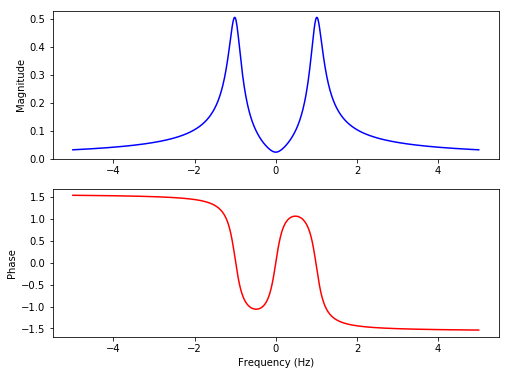

In [58]:
def H_fourier( f ):
    return H( 2j * np.pi * f )

f_plot = np.linspace( -5, 5, 1000 )

fourier_complex = np.array( [H_fourier(f) for f in f_plot] )
fourier_abs = np.abs( fourier_complex )
fourier_angle = np.angle( fourier_complex )

fig, axs = plt.subplots( 2, 1, figsize = (8, 6) )
axs[0].plot( f_plot, fourier_abs, 'b-', label = 'Real' )
axs[0].set_ylabel( 'Magnitude' )
axs[1].plot( f_plot, fourier_angle, 'r-', label = 'Imaginary' )
axs[1].set_ylabel( 'Phase' )
axs[1].set_xlabel( 'Frequency (Hz)' )
plt.show()

Beautiful—exactly as expected, the magnitude response is *symmetric*, while the phase response is *antisymmetric*!

<a id="parseval"></a>
***

### Parseval's identity

The units of the Fourier transform are not *arbitrary*; in fact, the Fourier transform is defined such that the total "energy" of an input signal $x$ is the same as the total "energy" of the Fourier transform! This general fact is known as **Parseval's identity**, which we will now show in a few particular cases.

**TODO: More exposition**

#### **Theorem** (Parseval's identity for the continuous Fourier transform)
> Let $x(t)$ be a continuous signal with Fourier transform $X(\mathrm{i}2\pi f)$. Then,
>
> $$ \int_{-\infty}^\infty |x(t)|^2\,\mathrm{d}t = \int_{-\infty}^\infty |X(\mathrm{i}2\pi f)|^2\,\mathrm{d}f $$

##### Proof

We begin by noting that

$$ |x(t)|^2 = x(t)x^\ast(t) $$

where $^\ast$ denotes complex conjugation; further, we can express $x$ and $x^\ast$ as *inverse Fourier transform* integrals as

$$
\begin{eqnarray*}
    x(t) & = & \int_{-\infty}^\infty X(\mathrm{i}2\pi f)\,\mathrm{e}^{\mathrm{i}2\pi ft}\,\mathrm{d}f \\
    x^\ast(t) & = & \left[\int_{-\infty}^\infty X(\mathrm{i}2\pi f)\,\mathrm{e}^{\mathrm{i}2\pi ft}\,\mathrm{d}f\right]^\ast \\
     & = & \int_{-\infty}^\infty X^\ast(\mathrm{i}2\pi f)\,\mathrm{e}^{-\mathrm{i}2\pi ft}\,\mathrm{d}f
\end{eqnarray*}
$$

where in the last step we took the conjugate of each factor of the integral. We can plug these in to our expression in the statement of the theorem to obtain the (ghastly) triple integral:

$$
\begin{eqnarray*}
    \int_{-\infty}^\infty |x(t)|^2\,\mathrm{d}t & = & \int_{-\infty}^\infty x(t)x^\ast(t)\,\mathrm{d}t \\
     & = & \int_{-\infty}^\infty \left[\int_{-\infty}^\infty X(\mathrm{i}2\pi f)\,\mathrm{e}^{\mathrm{i}2\pi ft}\,\mathrm{d}f\right]\,\left[\int_{-\infty}^\infty X^\ast(\mathrm{i}2\pi f')\,\mathrm{e}^{-\mathrm{i}2\pi f't}\,\mathrm{d}f'\right]\,\mathrm{d}t \\
     & = & \int_{-\infty}^\infty \int_{-\infty}^\infty \int_{-\infty}^\infty X(\mathrm{i}2\pi f)\,X^\ast(\mathrm{i}2\pi f')\,\mathrm{e}^{\mathrm{i}2\pi ft}\,\mathrm{e}^{-\mathrm{i}2\pi f't}\,\mathrm{d}f\,\mathrm{d}f'\,\mathrm{d}t \\
     & = & \int_{-\infty}^\infty \int_{-\infty}^\infty  X(\mathrm{i}2\pi f)\,X^\ast(\mathrm{i}2\pi f') \int_{-\infty}^\infty \mathrm{e}^{\mathrm{i}2\pi ft}\,\mathrm{e}^{-\mathrm{i}2\pi f't}\,\mathrm{d}t\,\mathrm{d}f\,\mathrm{d}f'
\end{eqnarray*}
$$

Aha, now there's something workable! The innermost integral is exactly a Fourier transform integral of the time domain signal $1 \cdot \mathrm{e}^{\mathrm{i}2\pi ft}$; in the frequency domain, this corresponds (because of the [frequency shift property](#example_frequency_shift)) to a transform of $\delta(f' - f)$ Hence, the integral becomes

$$
\begin{eqnarray*}
    \int_{-\infty}^\infty |x(t)|^2\,\mathrm{d}t & = & \int_{-\infty}^\infty \int_{-\infty}^\infty X(\mathrm{i}2\pi f)\,X^\ast(\mathrm{i}2\pi f')\,\delta(f' - f)\,\mathrm{d}f\,\mathrm{d}f'
\end{eqnarray*}
$$

Integrating against $\delta(f' - f)$ ensures that $f$ and $f'$ are identical; thus, we have

$$
\begin{eqnarray*}
    \int_{-\infty}^\infty |x(t)|^2\,\mathrm{d}t & = & \int_{-\infty}^\infty X(\mathrm{i}2\pi f')\,X^\ast(\mathrm{i}2\pi f')\,\mathrm{d}f' \\
     & = & \int_{-\infty}^\infty |X(\mathrm{i}2\pi f)|^2\,\mathrm{d}f'
\end{eqnarray*}
$$

completing the proof! $\blacksquare$

<a id="duality"></a>
***

### Duality

Take a look at the equations for the Fourier transform and the inverse Fourier transform together:

$$
\begin{eqnarray*}
    X(\mathrm{i}2\pi f) & = & \int_{-\infty}^\infty x(t)\,\mathrm{e}^{-\mathrm{i}2\pi ft}\,\mathrm{d}t \\
    x(t) & = & \int_{-\infty}^\infty X(\mathrm{i}2\pi f)\,\mathrm{e}^{\mathrm{i}2\pi ft}\,\mathrm{d}t
\end{eqnarray*}
$$

These two forms are *almost identical* to each other, except for the sign in the exponential! This leads to a very intriguing relationship that holds when the *frequency domain* representation $X$ of a signal $x$ is used instead to represent the *time domain*.

#### Theorem
> Let $x(t)$ be a continuous signal with Fourier transform $X(\mathrm{i}2\pi f)$. Then, treating $X$ as a time domain signal $\tilde{X}(t) = X(\mathrm{i}2\pi t)$,
>
> $$ \mathcal{F}(\tilde{X})(f) = x(-f) $$

Before we prove this, let's illustrate what this statement means. Recall one very important Fourier transform pair we looked at earlier, the [perfect lowpass filter](#example_perfect_lowpass). This system, we saw, corresponded to the Fourier transform pair

$$ 2f_0\,\mathrm{sinc}(2f_0 t) \quad \leftrightarrow^\mathcal{F} \quad \Pi_{f_0}(f) $$

where $\Pi_{f_0}$ is the zero-centered rectangular functioin extending to $\pm f_0$ on either side (that is, a *lowpass filter at $f_0$*). One may reasonably ask, then: What is the Fourier transform of the rectangular function *in time*? That is,

$$ \mathcal{F}(\Pi_{t_0}) = ? $$

From this theorem, we know it immediately! It is, in fact,

$$\mathcal{F}(\Pi_{t_0}) = 2 t_0\,\mathrm{sinc}(2 t_0 f) $$

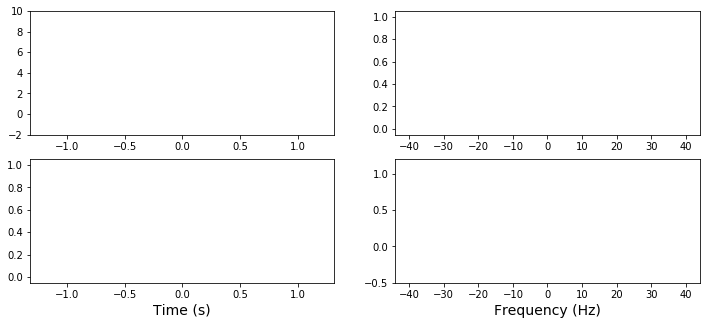

In [82]:
import numpy as np
import matplotlib.pyplot as plt

f0_all = np.arange( 1., 25., 0.25 )
f0_all = np.r_[f0_all, np.flip( f0_all )]
f0 = f0_all[0]
t0 = 1. / f0

def X(f, corner):
    ret = np.zeros( f.shape )
    ret[np.abs( f ) < corner] = 1.
    return ret

def x(t, corner):
    return np.divide( np.sin( 2. * np.pi * corner * t ), np.pi * t )

t_all = np.arange( -1.2, 1.2, 0.001 )
xt_all = x( t_all, f0 )
Xt_all = X( t_all, t0 )

f_all = np.linspace( -40, 40, 2000 )
Xf_all = X( f_all, f0 )
xf_all = x( f_all, t0 )

fig, axs = plt.subplots( 2, 2, figsize = (12, 5) )

line_t_1, = axs[0][0].plot( t_all, xt_all, 'k-' )
axs[0][0].set_ylim( -2., 10. )
line_t_2, = axs[1][0].plot( t_all, Xt_all, 'k-' )

line_f_1, = axs[0][1].plot( f_all, Xf_all, 'k-' )
line_f_2, = axs[1][1].plot( f_all, xf_all, 'k-' )
axs[1][1].set_ylim( -0.5, 1.2 )

axs[1][0].set_xlabel( 'Time (s)', fontsize = 14 )
axs[1][1].set_xlabel( 'Frequency (Hz)', fontsize = 14 )

def init():
    line_t_1.set_data( [], [] )
    line_t_2.set_data( [], [] )
    line_f_1.set_data( [], [] )
    line_f_2.set_data( [], [] )
    return line_t_1, line_t_2, line_f_1, line_f_2
    
n_frames = f0_all.shape[0]
    
def animate( i ):
    f0 = f0_all[i]
    t0 = 1. / f0
    xt_all = x( t_all, f0 )
    Xt_all = X( t_all, t0 )
    Xf_all = X( f_all, f0 )
    xf_all = x( f_all, t0 )
    
    line_t_1.set_data( t_all, xt_all )
    line_t_2.set_data( t_all, Xt_all )
    line_f_1.set_data( f_all, Xf_all )
    line_f_2.set_data( f_all, xf_all )
    return line_t_1, line_t_2, line_f_1, line_f_2
    
anim = FuncAnimation( fig, animate, init_func = init,
                      frames = n_frames,
                      interval = 40,
                      blit = True )

In [83]:
from IPython.display import HTML
HTML( anim.to_html5_video() )

Here we see both directions of this theorem diagrammed out—the one we covered previously in the top row, and the new relationship obtained through Fourier duality in the bottom row—with the cutoff frequency (for the rectangular function in the first pair) and the cutoff time (for the rectangular function in the second pair) related by

$$ f_0 = \frac{1}{t_0} $$

on the basis of dimensional analysis. (Interestingly—[as we'll investigate in more depth below](#uncertainty)—no matter what function you use in which place, time or frequency, there still appears to be an *inverse relationship* between the "spread of a signal in one domain, and the spread of its transform in the other domain.)

Now that we've gotten a flavor for what Fourier duality *means*, let's see it proved:

##### Proof

We are given a signal $x(t)$ and its Fourier transform $X(\mathrm{i}2\pi f)$. The essence of this proof lies in the symmetry of the Fourier transform equation and its inverse above: because the two are related by a negative sign, we can turn one into the other by negating one of our variables!

Let's denote, as in the statement of the theorem, $\tilde{X}(t) = X(\mathrm{i}2\pi t)$, the Fourier transform of $x$ but evaluated in the time domain. Then, we note that

$$
\begin{eqnarray*}
    \mathcal{F}(\tilde{X})(f) & = & \int_{-\infty}^\infty \tilde{X}(t)\,\mathrm{e}^{-\mathrm{i}2\pi f t}\,\mathrm{d}t
\end{eqnarray*}
$$

Making the substitution $\phi = -f$, we can write this as

$$
\begin{eqnarray*}
    \mathcal{F}(\tilde{X})(-\phi) & = & \int_{-\infty}^{\infty} \tilde{X}(t)\,\mathrm{e}^{\mathrm{i}2\pi \phi t}\,\mathrm{d}t \\
     & = & \int_{-\infty}^{\infty} X(\mathrm{i}2\pi t)\,\mathrm{e}^{\mathrm{i}2\pi \phi t}\,\mathrm{d}t
\end{eqnarray*}
$$

Don't be fooled by the strange roles of the variables! This integral is precisely the same as the *inverse Fourier transform* of $X$,

$$ x(t) = \int_{-\infty}^{\infty} X(\mathrm{i}2\pi f)\,\mathrm{e}^{\mathrm{i}2\pi f t}\,\mathrm{d}f $$

but with different variable names: in this case, frequency $f$ in the inverse Fourier transform equation corresponds to $t$ in the integral above, and time $t$ in the inverse Fourier transform equation corresponds to $\phi$ above. This means that the result of our integral is

$$ \mathcal{F}(\tilde{X})(-\phi) = x(\phi) $$

Substituting back for $f = -\phi$, this gives us

$$ \mathcal{F}(\tilde{X})(f) = x(-f) $$

exactly as required by the theorem. $\blacksquare$

<a id="uncertainty"></a>
***

### The uncertainty principle

Let's look at two particular examples of transform pairs that are particularly illuminating. First, let's consider the case where our input signal $x_1 = \delta$ is an impulse. Then, the corresponding Laplace transform is given by

$$
\begin{eqnarray*}
    \mathcal{L}(\delta) = X_1(s) & = & \int_{-\infty}^\infty \delta(t)\,\mathrm{e}^{-st}\,\mathrm{d}t \\
     & = & \mathrm{e}^{-s\cdot 0} \\
     & = & 1
\end{eqnarray*}
$$

where we note that the ROC for the integral is the entire complex plane, $s \in \mathbb{C}$. So we see in particular that

$$ \mathcal{F}(\delta) = X_1(\mathrm{i}2\pi f) = 1 $$

So we see that the Fourier transform of an impulse—arguably the most *concentrated* function we could come up with!—is *uniformly $1$*—the most *spread out* function available to us.

This is an extreme demonstration of a general principle that applies between signals and their Fourier transforms—namely, that "size" in one domain is in opposition to "size" in the other domain. This principle manifests itself in many different ways in signal analysis. We can first look at it in turms of **support**, or the region of a function's domain where the function has nonzero input; as it happens, there is quite an extreme tradeoff between a signal's support in the two domains:

#### **Theorem**
> A nonzero signal $x(t)$ and its Fourier transform $X(\mathrm{i}2\pi f)$ cannot both have finite support.

##### Proof
**TODO: This actually weirdly requires some heavy mathematics?** $\blacksquare$

This result helps to explain instances like our motivating example with $\delta$ and $1$ above: $\delta$ has **finite support**, we see that its Fourier transform must *not*—and indeed, the function $1$, which is nonzero everywhere, meets this criterion. However, as it happens, we can extend this result to say something more subtle about signals and their transforms, rather than a strictly binary decision about finiteness.

For a given continuous signal $x(t)$, we define the **first moment** of $x$ as

$$ \mu_1(x) = \int_{-\infty}^\infty t\,x(t)\,\mathrm{d}t $$

Thinking of $x$ as playing the role of a "probability distribution", the first moment gives us what would be the "mean input time"—the time about which most of the signal is concentrated. We can similarly define the **second moment** of a given signal $x$ as

$$ \mu_2(x) = \int_{-\infty}^\infty t^2\,x(t)\,\mathrm{d}t $$

This gives an indication of the *dispersion* of $x$ about $0$: if $x$ is large far away from the origin, then these values will have a large contribution to the value of $\mu_2(x)$. A variant of this is the **second central moment**, or **variance**, given by

$$ \sigma^2(x) = \int_{-\infty}^\infty (t - \mu_1(x))^2\,x(t)\,\mathrm{d}t $$

This is a more familiar measure of dispersion *around the first moment* $\mu_1(x)$ of $x$, rather than *around the origin*.

As we will show below, these quantities make sense for *functions of $x$* as well; for example, since $x$ may be positive or negative—and since its Fourier transform $X$ may be complex in general—we will choose to work with the quantities $\mu_2(|x|^2)$ and $\mu_2(|X|^2)$, for example, which show us the dispersion of the "energy content" in time and frequency, respectively.

Further, recall that the **norm** of a continuous signal $x$ is defined by

$$ \|x\|_2 = \sqrt{\int_{-\infty}^\infty |x(t)|^2\,\mathrm{d}t} $$

This formula is completely analogous to the notion of Euclidean distance, with integration replacing summation over the individual coordiinates. The square of this quantity, $\|x\|_2^2$, is proportional to the **total energy** contained in the signal. We note that, because of Parseval's identity, letting $\mathcal{F}(x) = X(\mathrm{i}2\pi f)$ as the Fourier transform of $x$, we have that

$$ \|x\|_2^2 = \|X\|_2^2 $$

#### **Theorem** (Heisenberg-Gabor limit)
> Let $x(t)$ be a continuous signal with Fourier transform $X(\mathrm{i}2\pi f)$. Then
>
> $$ \mu_2(|x|^2)\,\mu_2(|X|^2) \geq \frac{\|x\|_2^4}{16\pi^2} $$
>
> where $\mu_2(|x|^2)$ and $\mu_2(|X|^2)$ are the second moments of the **squared magnitude** of $x$ and $X$, respectively.

##### Proof
We'll start by expanding the expression for $\|x\|_2^2$ using [integration by parts](https://en.wikipedia.org/wiki/Integration_by_parts). Letting $u = |x(t)|^2$ and $v = t$, we note that

$$
\begin{eqnarray*}
    \|x\|_2^2 & = & \int_{-\infty}^\infty |x(t)|^2\,\mathrm{d}t \\
     & = & t\,|x(t)|^2 \Big\rvert_{-\infty}^\infty - 2\int_{-\infty}^\infty t\,x(t)\,x'(t)\,\mathrm{d}t
\end{eqnarray*}
$$

To proceed, we need to make a mild assumption on the way in which $x$ falls off toward infinity; in particular, we will assume that

$$ \lim_{|t| \to \infty} t\,|x(t)|^2 = 0 \quad \Leftrightarrow \quad \lim_{|t| \to \infty} \sqrt{|t|}\,|x(t)| = 0 $$

That is, we want $x$ to fall off *faster than $\frac{1}{\sqrt{t}}$*. This is a reasonable assumption for us to make for most signals: as we showed above, a sufficient condition for the Fourier transform to exist is the convergence of the Laplace transform on the imaginary axis, meaning (for causal $x$) that our signal in question falls off faster than a decaying exponential $\mathrm{e}^{-t}$, *much* faster than $\frac{1}{\sqrt{t}}$.

In this assumed case, the first term in the expression above for $\|x\|_2^2$ disappears, and we can use the (square root of the) [Cauchy-Schwarz inequality](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality#L2) to separate out the remaining integral:

$$ \|x\|_2^2 = \left|\|x\|_2^2\right| = \left|- 2\int_{-\infty}^\infty t\,x(t)\,x'(t)\,\mathrm{d}t\right| \leq 2 \sqrt{\int_{-\infty}^\infty t^2\,\left|x(t)\right|^2\,\mathrm{d}t}\,\sqrt{\int_{-\infty}^\infty \left|x'(t)\right|^2\,\mathrm{d}t} \quad (\ast) $$

To finish off the proof, we'll use a clever trick to transform the last integral in this expression into the Fourier domain. First of all, note that this last term is actually equal to the *norm of $x'$*:

$$ \sqrt{\int_{-\infty}^\infty \left|x'(t)\right|^2\,\mathrm{d}t} = \|x'\|_2 $$

But by Parseval's identity, this means that this quantity is *also* equal to the norm of the *Fourier transform* of $x'$ as well:

$$ \|x'\|_2 = \|\mathcal{F}(x')\|_2 $$

We note that the Laplace transform of $x'$ is $s\,X(s)$; hence, the Fourier transform of $x'$ is equal to $\mathrm{i}2\pi f X(\mathrm{i}2\pi f)$ (plugging in $s = \mathrm{i}2\pi f$); thus, we note that

$$ \|\mathcal{F}(x')\|_2 = \sqrt{\int_{-\infty}^\infty |\mathrm{i}2\pi f\,X(\mathrm{i}2\pi f)|^2\,\mathrm{d}f} = 2\pi\,\sqrt{\int_{-\infty}^\infty f^2\,|X(\mathrm{i}2\pi f)|^2\mathrm{d}f} $$

Plugging this into $(\ast)$ above, we see that

$$
\begin{eqnarray*}
    \|x\|_2^2 & \leq & 4\pi\,\sqrt{\int_{-\infty}^\infty t^2\,\left|x(t)\right|^2\,\mathrm{d}t}\,\sqrt{\int_{-\infty}^\infty f^2\,|X(\mathrm{i}2\pi f)|^2\mathrm{d}f} \\
    \frac{\|x\|_2^4}{16\pi^2} & \leq & \left(\int_{-\infty}^\infty t^2\,\left|x(t)\right|^2\,\mathrm{d}t\right)\,\left(\int_{-\infty}^\infty f^2\,|X(\mathrm{i}2\pi f)|^2\mathrm{d}f\right) \\
     & = & \mu_2(|x|^2)\,\mu_2(|X|^2)
\end{eqnarray*}    
$$

proving the theorem. $\blacksquare$

***

Although here we were dealing with moments *about zero*, a corollary of the above theorem shows that we also have a bound for the more useful *central moments*. In particular, we have the following in terms of the *standard deviation* measure, or the square root of the variance:

#### **Corollary**
> Let $x(t)$ be a continuous signal with Fourier transform $X(\mathrm{i}2\pi f)$. Let $\sigma_t = \sqrt{\sigma^2(|x|^2)}$ denote the standard deviation of $x$'s energy in *time*, and $\sigma_f = \sqrt{\sigma^2(|X|^2)}$ denote the standard deviation of $x$'s energy in *frequency*. Then
>
> $$ \sigma_t\,\sigma_f \geq \frac{\|x\|_2^2}{4\pi} $$

<a id="example_gaussians"></a>
***
#### **Example**: Gaussian pairs

Here's a question: When is the bound imposed by the uncertainty principle *actually attained*? That is, when do we have it that equality holds in the theorems above?

Fundamentally, the *inequalities* above stem from the imposition of the Cauchy-Schwarz inequality. And this inequality gives us a clue as to the [conditions where equality holds](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality#Statement_of_the_inequality): we have that

$$ \left| \int_{-\infty}^\infty u(t)\,v(t)\,\mathrm{d}t \right| = \sqrt{\int_{-\infty}^\infty |u(t)|\,\mathrm{d}t}\,\sqrt{\int_{-\infty}^\infty |v(t)|\,\mathrm{d}t} $$

precisely when $v(t) = \lambda\,u(t)$ for some scalar $\lambda$. In our case, we have $u(t) = t\,x(t)$ and $v(t) = x'(t)$; hence, the relation we must satisfy for equality is governed by the ordinary differential equation

$$ x'(t) = \lambda t\,x(t) $$

This ODE has [a general solution](https://www.wolframalpha.com/input/?i=solve+x%27%28t%29+%3D+l+t+x%28t%29) that is a family of Gaussians:

$$ x(t) = C\,\mathrm{e}^{\left(\lambda t^2\right)/2} $$

So it appears that Gaussians are "optimal" in the sense that they can be maximally localized in both time and frequency simultaneously.

This family of functions is also peculiar in that the [Fourier transform of a Gaussian is another Gaussian](http://www.cse.yorku.ca/~kosta/CompVis_Notes/fourier_transform_Gaussian.pdf); indeed, given a normalized Gaussian signal in standard form

$$ x(t) = \frac{1}{\sqrt{2\pi\sigma^2}}\,\mathrm{e}^{-x^2/2\sigma^2} $$

we note that its Fourier transform is given by

$$ X(\mathrm{i}2\pi f) = \mathrm{e}^{-2\pi^2f^2\sigma^2} $$

Notice that the dispersion parameeter $\sigma$ flips from the denominator in the time domain to the numerator in the frequency domain; this seems to suggest that the pair is related in scale by an inverse relationship. Let's plot them out to find out!

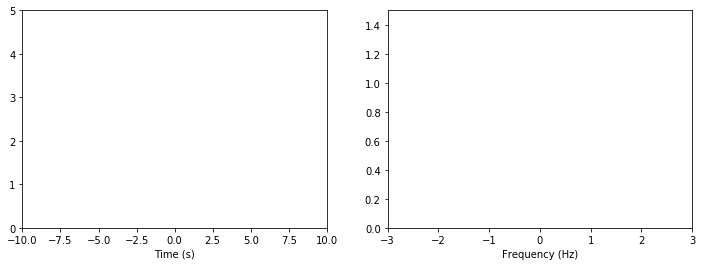

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, axs = plt.subplots( 1, 2, figsize = (12, 4) )

axs[0].set_xlabel( 'Time (s)' )
axs[0].set_xlim( -10, 10 )
axs[0].set_ylim( 0, 5 )
axs[1].set_xlabel( 'Frequency (Hz)' )
axs[1].set_xlim( -3, 3 )
axs[1].set_ylim( 0, 1.5 )

t_all = np.arange( -10, 10, 0.01 )
f_all = np.arange( -10, 10, 0.01 )

sigma_use = np.arange( 0.02, 3., 0.02 )
sigma_use = np.r_[sigma_use, np.flip(sigma_use)]

x_t = (1. / np.sqrt( 2. * np.pi * sigma_use[0] * sigma_use[0] )) * np.exp( -np.power( t_all, 2. ) * (1. / (2. * sigma_use[0] * sigma_use[0]) ) )
x_f = np.exp( -2. * np.pi * np.pi * np.power( f_all, 2. ) * sigma_use[0] * sigma_use[0] )

line_t, = axs[0].plot( t_all, x_t, 'k-', linewidth = 3 )
line_f, = axs[1].plot( f_all, x_f, 'b-', linewidth = 3 )

def init():
    line_t.set_data( [], [] )
    line_f.set_data( [], [] )
    return line_t, line_f
    
n_frames = sigma_use.shape[0]
    
def animate( i ):
    sigma_cur = sigma_use[i]
    x_t = (1. / np.sqrt( 2. * np.pi * sigma_cur * sigma_cur )) * np.exp( -np.power( t_all, 2. ) * (1. / (2. * sigma_cur * sigma_cur) ) )
    x_f = np.exp( -2. * np.pi * np.pi * np.power( f_all, 2. ) * sigma_cur * sigma_cur )
    line_t.set_data( t_all, x_t )
    line_f.set_data( f_all, x_f )
    return line_t, line_f
    
anim = FuncAnimation( fig, animate, init_func = init,
                      frames = n_frames,
                      interval = 40,
                      blit = True )

In [50]:
from IPython.display import HTML
HTML( anim.to_html5_video() )

Notice that as these two reach their extremes, they look more and more like the *absolute* extremes we discussed above—the pairing between the infinitely thin $\delta$, and the infinitely wide everywhere $1$ function!

<a id="projection"></a>
***

### Fourier transform projects signals onto complex exponentials

Earlier, when talking about the *linearity* of systems, we made use of a notion of signals being *vectors* in some kind of a vector space; that is, for two signals $x$ and $y$ and a scalar $\alpha \in \mathbb{R}$, we have two well-defined notions: *vector addition*, $x + y$, and *scalar multiplication*, $\alpha x$. These are usually computed *pointwise*; for example, for continuous signals $x(t)$ and $y(t)$, we might take the vector addition $x + y$ to be defined by

$$ (x + y)(t) = x(t) + y(t) $$

and the scalar multiplication $\alpha x$ similarly defined by

$$ (\alpha x)(t) = \alpha x(t) $$

With these notions in place, we begin to define a sort of *geometry* of signals: that is, each individual signal is itself seen as a *point* within a larger space—the *space of all signals*.

However, if we *really* want to get started in this vein, we need something that can tell us about *distances* and *angles*—the real essence of geometry. In linear algebra, the object that encodes these data is the **inner product**. Let's look at discrete signals as an example. The inner product used on discrete signals (including *complex-valued* discrete signals) is

$$ \langle x, y \rangle = \sum_{k=-\infty}^\infty x(k)\,y^\ast(k) $$

(This is a direct generalization of the *dot product* from finite-dimensional vector spaces.) What's neat about this inner product form is that it automatically gives us a wealth of information about vectors in the space. For example, note that

$$ \langle x, x \rangle = \sum_{k=-\infty}^\infty x(k)\,x^\ast(k) = \sum_{k=-\infty}^\infty |x(k)|^2 $$

This is precisely the square of the *$2$-norm* of $x$; in fact, we may *define* the $2$-norm of a vector by

$$ \|x\| = \sqrt{\langle x, x \rangle} $$

So the inner product gives us lengths! But that's not all: after all, in a vector space with a norm, the distance between two vectors is given by

$$ d(x, y) = \|x - y\| $$

Thus, we see that the inner product determines *distances* as well! In fact, we can go even further: further generalizing the [geometry of the dot product](https://en.wikipedia.org/wiki/Dot_product#Scalar_projection_and_first_properties) (**TODO: Need better reference**), we can analogously *define* the angle between two signals $x$ and $y$ to be

$$ \cos \theta_{xy} = \frac{\langle x, y \rangle}{\|x\| \|y\|} $$

Even angles are accessible to us in these very abstract spaces—once we are equipped with a suitable inner product!

***

How does this apply to the Fourier transform? To see this, let's bring in one more concept from linear algebra: **projection**. To understand the projection of one vector $x$ **onto another** $y$, imagine a light source oriented perpendicularly to $y$, casting rays onto $x$. You might imagine that this light causes $x$ to "cast a shadow" onto the axis defined by the vector $y$; it is precisely the length of this shadow (considered with direction: the quantity is *negative* if the shadow is in the opposite direction of $y$) that constitutes the **scalar projection** of $x$ onto $y$.

With [a little intuition from geometry](https://en.wikipedia.org/wiki/Scalar_projection) (**TODO: Find a better source**), one observes that the scalar projection $s_{x\to y}$ is defined by the equation

$$ s_{x\to y} = \|x\| \cos \theta_{xy} = \frac{\langle x, y\rangle}{\|y\|} $$

The meaning of this quantity is geometrically evident for vectors in *$3$-space*, for example; however, what is the meaning of this kind of projection when we're dealing with such abstract spaces as the space of signals? Let's see with an example!

Let's take $y$ in the above definition to be the shifted impulse $\delta_{n_0} = \delta(n - {n_0})$. For a given signal $x$, then, the projection of $x$ onto $\delta_{n_0}$ is given by

$$ s_{x\to \delta_{n_0}} = \frac{\langle x, \delta_{n_0}\rangle}{\|\delta_{n_0}\|} $$

First, we immediately note that

$$ \|\delta_{n_0}\| = \sum_{k=-\infty}^\infty |\delta(k - n_0)|^2 = 1 $$

Second, we can compute the inner product in the numerator to be

$$ \langle x, \delta_{n_0} \rangle = \sum_{k=-\infty}^\infty x(k)\,\delta^\ast(k-n_0) = x(n_0) $$

So it turns out that our expression for the projection simplifies down to

$$ s_{x\to\delta_{n_0}} = x(n_0) $$

Aha! So it appears that projecting a signal onto an impulse at sample $n_0$ "picks out" the value of the signal at $n_0$.

***

Recall from our earlier discussion of discrete signals that every discrete signal has a representation as a superposition of scaled and shifted impulses:

$$ x(n) = \sum_{k=-\infty}^\infty x(k) \delta(n-k) $$

What is it about the functions $\delta(n-k)$ that allows them to serve in this role? Can we take any set of functions $(f_k)$ and form a representation of $x$ as a scaled sum of these "building blocks"? Asked another way, under what conditions on $(f_k)$ must we have some coefficients $(a_k)$ such that

$$ x(n) = \sum_{k=-\infty}^\infty a_k f_k(n) $$

From linear algebra, the exact condition for this to be the cases is when [$(f_k)$ is a **basis**](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/subspace-basis/v/linear-algebra-basis-of-a-subspace) of signal space. The exact details of what constitutes a basis are less important in this context; what is important to recognize is that vectors that form a basis serve as *coordinate axes* for the space to which they belong. They are the "cardinal directions".

**TODO: Is this even worth it to go into?**